# [assign06]

## 1. Load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 실습 1. Accuracy, Precision, Recall and F1-score

In [41]:
# data (1 : positive, 2 : negative)

# class 1
pred1 = np.array([1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1])
label1 = np.array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2])

In [45]:
# Confusion matrix : 오차행렬
def confusion_mat(pred, label) :
    # (2,2) 행렬 생성
    cm = np.zeros((2,2), dtype=int)
    
    for i in range(len(pred1)):
        # TP > cm[0][0]
        if (pred1[i] == 1) and (label1[i] == 1):
            cm[0][0] += 1
        # FN > cm[0][1]
        elif (pred1[i] == 2) and (label1[i] == 1):
            cm[0][1] += 1
        # FP > cm[1][0]
        elif (pred1[i] == 1) and (label1[i] == 2):
            cm[1][0] += 1
        # TN > cm[1][1]
        elif (pred1[i] == 2) and (label1[i] == 2):
            cm[1][1] += 1
            
    return cm

confusion_mat(pred1, label1)

array([[6, 4],
       [7, 3]])

In [24]:
cm = confusion_mat(pred1, label1)
cm

array([[6, 4],
       [7, 3]])

In [25]:
# 정확도 = (TP + TN) / (TP + FN + FP + TN)
def accuarcy(pred, label) :
    cm = confusion_mat(pred1, label1)
    acc = (cm[0][0] + cm[1][1])/(cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
    
    return acc

accuarcy(pred1, label1)

0.45

In [26]:
# 정밀도 = (TP) / (TP + FP)
def precision(pred, label) :
    cm = confusion_mat(pred1, label1)
    pre = (cm[0][0]) / (cm[0][0] + cm[1][0])
    
    return pre

precision(pred1, label1)

0.46153846153846156

In [27]:
# 재현도 = (TP) / (TP + FN)
def recall(pred, label) :
    cm = confusion_mat(pred1, label1)
    rec = (cm[0][0]) / (cm[0][0] + cm[0][1])
    
    return rec

recall(pred1, label1)

0.6

In [28]:
# F1 score = (2*재현도*정밀도) / (재현도+정밀도)
def f1_score(pred, label) :
    pre = precision(pred1, label1)
    rec = recall(pred1, label1)
    
    f1 = (2*pre*rec) / (pre+rec)
    
    return f1

f1_score(pred1, label1)

0.5217391304347826

## 실습 2. Micro & Macro averaged precision

In [29]:
# data (1 : positive, 2 : negative)

# class 1
pred1 = np.array([1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1])
label1 = np.array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2])

# class 2
pred2 = np.array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1])
label2 = np.array([2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1])

In [30]:
# 클래스별 Precision, Recall, F1-score 계산 후 모든 클래스의 지표를 더한 후 클래스 수로 나눔
def micro_avg():
    cm1 = confusion_mat(pred1, label1)
    cm2 = confusion_mat(pred2, label2)
    
    cm = cm1+cm2
    # Macro-average Precision
    pre = (cm[0][0]) / (cm[0][0] + cm[1][0])
    print("Micro-average Precision : ", pre)
    
    # Macro-average recall
    rec = (cm[0][0]) / (cm[0][0] + cm[0][1])
    print("Micro-average Recall : ", rec)
    
    
    # Macro-average F1-score
    f1 = (2*pre*rec) / (pre+rec)
    print("Micro-average F1-score : ", f1)
    
micro_avg()

Micro-average Precision :  0.46153846153846156
Micro-average Recall :  0.6
Micro-average F1-score :  0.5217391304347826


In [31]:
# 각 클래스의 평균을 더해 평균을 내준다.
def macro_avg() :
    print("[ Macro-average ]")
    
    # Macro-average Precision
    class1_pre = precision(pred1, label1)
    class2_pre = precision(pred2, label2)
    macro_avg_pre = (class1_pre + class1_pre) / 2
    print("Macro-average Precision : ", macro_avg_pre)
    
    # Macro-average recall
    class1_rec = recall(pred1, label1)
    class2_rec = recall(pred2, label2)
    macro_avg_rec = (class1_rec + class1_rec) / 2
    print("Macro-average Recall : ", macro_avg_rec)
    
    # Macro-average F1-score
    class1_f1 = f1_score(pred1, label1)
    class2_f1 = f1_score(pred2, label2)
    macro_avg_f1 = (class1_f1 + class1_f1) / 2
    print("Macro-average F1-score : ", macro_avg_f1)
    
macro_avg() 

[ Macro-average ]
Macro-average Precision :  0.46153846153846156
Macro-average Recall :  0.6
Macro-average F1-score :  0.5217391304347826


## 실습 3. mean Average Precision

In [32]:
conf = np.array([0.85, 0.87, 0.82, 0.71, 0.45, 0.75, 0.73, 0.9, 0.93, 0.95, 0.94, 0.92, 0.91, 0.74, 0.76, 0.45, 0.72, 0.87, 0.84, 0.84])
label = np.array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])
threshold_list = np.array([0.95, 0.94, 0.93, 0.92, 0.91, 0.90, 0.87, 0.87, 0.85, 0.84, 0.84, 0.82, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.45, 0.45])

In [20]:
def cal_mAP(conf, label, threshold_list) :
    precision_list = []
    recall_list = []
    
    for threshold in threshold_list:
        pred = (conf >= threshold)
        tp = np.sum(np.logical_and(label == 1, pred == 1))
        fp = np.sum(np.logical_and(label == 0, pred == 1))
        fn = np.sum(np.logical_and(label == 1, pred == 0))
        
        # 정밀도, 재현율
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        
        # 결과 저장
        precision_list.append(precision)
        recall_list.append(recall)
        
    # precision-recall 곡선 그리기
    plt.plot(recall_list, precision_list)
    plt.scatter(recall_list, precision_list)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()
    
    # precision-recall 곡선에서 면적을 계산하여 mAP 반환
    precision_list = np.array(precision_list)
    recall_list = np.array(recall_list)
    mAP = np.sum((recall_list[1:] - recall_list[:-1]) * precision_list[1:])
    return mAP

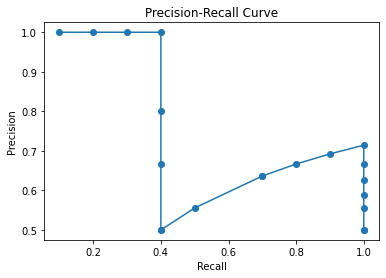

mAP:  0.6901542901542901


In [21]:
mAP = cal_mAP(conf, label, threshold_list)
print("mAP: ", mAP)

## Extra problem

- Assign 03에서 구현한 model

## 1. Load data

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
from dataset.mnist import load_mnist

(train_raw_img, train_label), (test_raw_img, test_label) = load_mnist(flatten=False, normalize=False)
print(train_raw_img.shape)
print(train_label.shape)

(60000, 1, 28, 28)
(60000,)


## 2. Preprocessing & Visualization

In [4]:
# train_dataset split according to the number
new_train_img = [[] for _ in range(10)]
new_train_label = [[] for _ in range(10)]

for i in range(len(train_label)) :
    new_train_img[train_label[i]].append(train_raw_img[i])
    new_train_label[train_label[i]].append(train_label[i])

print(len(new_train_img[0])) # 0에 해당하는 image 개수
print(new_train_img[0][0].shape) # 0에 해당하는 image중 첫번째 image의 shape

5923
(1, 28, 28)


## 3. multi class single label classification (using logistic regression)

In [5]:
# idx에 해당하는 숫자를 대상으로 샘플 데이터 생성
def make_sample(idx) :
    sample_img = []
    sample_label = []
    
    # data sampling 
    for i in range(10) :
        if i == idx :
            sample_img += new_train_img[i][:1000]
            sample_label += (new_train_label[i][:1000])
        else :
            sample_img += new_train_img[i][:111]
            sample_label += (new_train_label[i][:111])

    sample_img = np.array(sample_img)
    sample_label = np.array(sample_label)
    
    # normalization (set value 0 ~ 1)
    sample_img = sample_img.astype('float')/255
    
    # target number는 1, 아니면 0
    sample_label = np.where(sample_label==idx, 1 ,0)
    
    # reshape
    sample_img = sample_img.reshape(len(sample_img.squeeze()), -1)
    sample_label = sample_label.reshape(len(sample_label.squeeze()), -1)
    
    return sample_img, sample_label

In [6]:
# idx = target number
train_X, train_y = make_sample(idx = 0)
# bias 추가
train_X = np.insert(train_X, 0, 1, axis=1)

print(train_y.shape)

(1999, 1)


In [12]:
# cross entropy loss
def CrossEntropyLoss(preds, y) :  
    delta = 1e-7
    loss = np.sum(-y*np.log(preds+delta)-(1-y)*np.log(1-preds+delta))/len(preds)
        
    return loss

In [58]:
# train
def train(X, y) :
    w = np.random.randn(len(X[0]), 1) # 
    lr = 0.01 # learning rate(수정)
    step = 0
    acc = 0
    
    loss_history = []
    acc_history = []
    
    # train datawset에서 0.9까지 학습
    while (acc < 0.9) :
        step += 1
        correct = 0
        
        # predict
        preds = 1 / (1+np.exp(-X.dot(w)))
        loss = CrossEntropyLoss(preds, y)
        
        result = np.where(preds>0.5, 1, 0)
        acc = np.sum(np.where(result==y, True, False))/len(preds)
        
        print("total step : %d " % step)
        print("error : %f, accuarcy : %f" % (loss, acc))
        
        loss_history.append(loss)
        acc_history.append(acc)
        
        # gradient descent 수행
        gradient = np.dot(X.T, (preds - y)) / len(X)
        w -= lr * gradient
    
    # loss와 accuracy 시각화
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(loss_history)
    plt.title("Loss history")
    plt.xlabel("Steps")
    plt.ylabel("Loss")

    plt.subplot(1, 2, 2)
    plt.plot(acc_history)
    plt.title("Accuracy history")
    plt.xlabel("Steps")
    plt.ylabel("Accuracy")

    plt.show()
        
    return w

Training model for number 0
total step : 1 
error : 3.812757, accuarcy : 0.464732
total step : 2 
error : 3.760171, accuarcy : 0.465733
total step : 3 
error : 3.708819, accuarcy : 0.465233
total step : 4 
error : 3.658713, accuarcy : 0.462731
total step : 5 
error : 3.609864, accuarcy : 0.465733
total step : 6 
error : 3.562281, accuarcy : 0.466733
total step : 7 
error : 3.515971, accuarcy : 0.469235
total step : 8 
error : 3.470937, accuarcy : 0.470235
total step : 9 
error : 3.427179, accuarcy : 0.474737
total step : 10 
error : 3.384694, accuarcy : 0.474737
total step : 11 
error : 3.343474, accuarcy : 0.474737
total step : 12 
error : 3.303508, accuarcy : 0.476738
total step : 13 
error : 3.264781, accuarcy : 0.477239
total step : 14 
error : 3.227272, accuarcy : 0.478239
total step : 15 
error : 3.190959, accuarcy : 0.480740
total step : 16 
error : 3.155817, accuarcy : 0.483742
total step : 17 
error : 3.121816, accuarcy : 0.486743
total step : 18 
error : 3.088926, accuarcy : 

total step : 192 
error : 1.447507, accuarcy : 0.680840
total step : 193 
error : 1.443202, accuarcy : 0.680840
total step : 194 
error : 1.438918, accuarcy : 0.681841
total step : 195 
error : 1.434656, accuarcy : 0.682841
total step : 196 
error : 1.430415, accuarcy : 0.683342
total step : 197 
error : 1.426194, accuarcy : 0.684342
total step : 198 
error : 1.421995, accuarcy : 0.684842
total step : 199 
error : 1.417816, accuarcy : 0.684842
total step : 200 
error : 1.413657, accuarcy : 0.685843
total step : 201 
error : 1.409519, accuarcy : 0.686843
total step : 202 
error : 1.405401, accuarcy : 0.687344
total step : 203 
error : 1.401303, accuarcy : 0.687844
total step : 204 
error : 1.397226, accuarcy : 0.689345
total step : 205 
error : 1.393168, accuarcy : 0.689345
total step : 206 
error : 1.389129, accuarcy : 0.689845
total step : 207 
error : 1.385111, accuarcy : 0.690345
total step : 208 
error : 1.381111, accuarcy : 0.691346
total step : 209 
error : 1.377132, accuarcy : 0

total step : 422 
error : 0.829492, accuarcy : 0.782891
total step : 423 
error : 0.827876, accuarcy : 0.782891
total step : 424 
error : 0.826266, accuarcy : 0.783892
total step : 425 
error : 0.824662, accuarcy : 0.784892
total step : 426 
error : 0.823064, accuarcy : 0.785393
total step : 427 
error : 0.821472, accuarcy : 0.786393
total step : 428 
error : 0.819885, accuarcy : 0.786393
total step : 429 
error : 0.818305, accuarcy : 0.786893
total step : 430 
error : 0.816730, accuarcy : 0.786893
total step : 431 
error : 0.815161, accuarcy : 0.786893
total step : 432 
error : 0.813598, accuarcy : 0.786893
total step : 433 
error : 0.812041, accuarcy : 0.787394
total step : 434 
error : 0.810489, accuarcy : 0.787894
total step : 435 
error : 0.808943, accuarcy : 0.787894
total step : 436 
error : 0.807403, accuarcy : 0.787894
total step : 437 
error : 0.805868, accuarcy : 0.787894
total step : 438 
error : 0.804339, accuarcy : 0.787394
total step : 439 
error : 0.802815, accuarcy : 0

total step : 637 
error : 0.584262, accuarcy : 0.834417
total step : 638 
error : 0.583474, accuarcy : 0.834917
total step : 639 
error : 0.582687, accuarcy : 0.834917
total step : 640 
error : 0.581903, accuarcy : 0.834917
total step : 641 
error : 0.581122, accuarcy : 0.834917
total step : 642 
error : 0.580342, accuarcy : 0.834917
total step : 643 
error : 0.579565, accuarcy : 0.834917
total step : 644 
error : 0.578791, accuarcy : 0.834917
total step : 645 
error : 0.578018, accuarcy : 0.834917
total step : 646 
error : 0.577248, accuarcy : 0.834917
total step : 647 
error : 0.576480, accuarcy : 0.834917
total step : 648 
error : 0.575715, accuarcy : 0.834917
total step : 649 
error : 0.574951, accuarcy : 0.834917
total step : 650 
error : 0.574190, accuarcy : 0.834917
total step : 651 
error : 0.573432, accuarcy : 0.835418
total step : 652 
error : 0.572675, accuarcy : 0.835918
total step : 653 
error : 0.571921, accuarcy : 0.836418
total step : 654 
error : 0.571169, accuarcy : 0

total step : 864 
error : 0.451680, accuarcy : 0.869935
total step : 865 
error : 0.451253, accuarcy : 0.869935
total step : 866 
error : 0.450828, accuarcy : 0.869935
total step : 867 
error : 0.450403, accuarcy : 0.869935
total step : 868 
error : 0.449980, accuarcy : 0.869935
total step : 869 
error : 0.449558, accuarcy : 0.869935
total step : 870 
error : 0.449136, accuarcy : 0.869935
total step : 871 
error : 0.448716, accuarcy : 0.870435
total step : 872 
error : 0.448297, accuarcy : 0.870435
total step : 873 
error : 0.447879, accuarcy : 0.870435
total step : 874 
error : 0.447461, accuarcy : 0.870435
total step : 875 
error : 0.447045, accuarcy : 0.870435
total step : 876 
error : 0.446630, accuarcy : 0.870435
total step : 877 
error : 0.446216, accuarcy : 0.870435
total step : 878 
error : 0.445802, accuarcy : 0.870435
total step : 879 
error : 0.445390, accuarcy : 0.870435
total step : 880 
error : 0.444979, accuarcy : 0.870435
total step : 881 
error : 0.444569, accuarcy : 0

total step : 1082 
error : 0.378454, accuarcy : 0.893447
total step : 1083 
error : 0.378191, accuarcy : 0.893447
total step : 1084 
error : 0.377928, accuarcy : 0.893447
total step : 1085 
error : 0.377666, accuarcy : 0.893447
total step : 1086 
error : 0.377404, accuarcy : 0.893447
total step : 1087 
error : 0.377143, accuarcy : 0.893447
total step : 1088 
error : 0.376882, accuarcy : 0.893447
total step : 1089 
error : 0.376622, accuarcy : 0.893447
total step : 1090 
error : 0.376362, accuarcy : 0.893447
total step : 1091 
error : 0.376103, accuarcy : 0.893447
total step : 1092 
error : 0.375844, accuarcy : 0.893447
total step : 1093 
error : 0.375586, accuarcy : 0.893447
total step : 1094 
error : 0.375329, accuarcy : 0.893447
total step : 1095 
error : 0.375071, accuarcy : 0.893447
total step : 1096 
error : 0.374815, accuarcy : 0.893447
total step : 1097 
error : 0.374559, accuarcy : 0.893947
total step : 1098 
error : 0.374303, accuarcy : 0.894447
total step : 1099 
error : 0.37

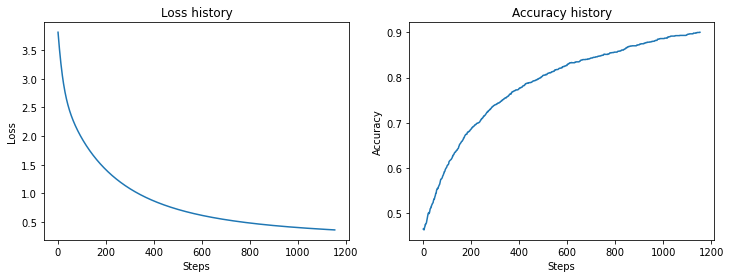

Training model for number 1
total step : 1 
error : 2.087454, accuarcy : 0.569785
total step : 2 
error : 2.043229, accuarcy : 0.574787
total step : 3 
error : 2.000140, accuarcy : 0.580290
total step : 4 
error : 1.958192, accuarcy : 0.582791
total step : 5 
error : 1.917383, accuarcy : 0.590795
total step : 6 
error : 1.877712, accuarcy : 0.594297
total step : 7 
error : 1.839173, accuarcy : 0.601301
total step : 8 
error : 1.801758, accuarcy : 0.606303
total step : 9 
error : 1.765456, accuarcy : 0.612306
total step : 10 
error : 1.730254, accuarcy : 0.617809
total step : 11 
error : 1.696136, accuarcy : 0.625813
total step : 12 
error : 1.663084, accuarcy : 0.630315
total step : 13 
error : 1.631078, accuarcy : 0.634817
total step : 14 
error : 1.600094, accuarcy : 0.640820
total step : 15 
error : 1.570111, accuarcy : 0.645823
total step : 16 
error : 1.541101, accuarcy : 0.651826
total step : 17 
error : 1.513040, accuarcy : 0.658329
total step : 18 
error : 1.485900, accuarcy : 

total step : 207 
error : 0.513783, accuarcy : 0.865933
total step : 208 
error : 0.512845, accuarcy : 0.865933
total step : 209 
error : 0.511913, accuarcy : 0.865933
total step : 210 
error : 0.510987, accuarcy : 0.865933
total step : 211 
error : 0.510066, accuarcy : 0.866433
total step : 212 
error : 0.509151, accuarcy : 0.866933
total step : 213 
error : 0.508241, accuarcy : 0.866933
total step : 214 
error : 0.507337, accuarcy : 0.866933
total step : 215 
error : 0.506438, accuarcy : 0.866933
total step : 216 
error : 0.505544, accuarcy : 0.866933
total step : 217 
error : 0.504655, accuarcy : 0.866933
total step : 218 
error : 0.503771, accuarcy : 0.866933
total step : 219 
error : 0.502893, accuarcy : 0.866933
total step : 220 
error : 0.502019, accuarcy : 0.866933
total step : 221 
error : 0.501150, accuarcy : 0.867434
total step : 222 
error : 0.500286, accuarcy : 0.867434
total step : 223 
error : 0.499427, accuarcy : 0.867434
total step : 224 
error : 0.498573, accuarcy : 0

total step : 448 
error : 0.374406, accuarcy : 0.895948
total step : 449 
error : 0.374032, accuarcy : 0.895448
total step : 450 
error : 0.373660, accuarcy : 0.895448
total step : 451 
error : 0.373288, accuarcy : 0.895448
total step : 452 
error : 0.372918, accuarcy : 0.895448
total step : 453 
error : 0.372548, accuarcy : 0.895448
total step : 454 
error : 0.372180, accuarcy : 0.895948
total step : 455 
error : 0.371812, accuarcy : 0.895948
total step : 456 
error : 0.371445, accuarcy : 0.895948
total step : 457 
error : 0.371080, accuarcy : 0.896448
total step : 458 
error : 0.370715, accuarcy : 0.896448
total step : 459 
error : 0.370352, accuarcy : 0.896448
total step : 460 
error : 0.369989, accuarcy : 0.896448
total step : 461 
error : 0.369627, accuarcy : 0.896448
total step : 462 
error : 0.369267, accuarcy : 0.896448
total step : 463 
error : 0.368907, accuarcy : 0.896448
total step : 464 
error : 0.368548, accuarcy : 0.896448
total step : 465 
error : 0.368190, accuarcy : 0

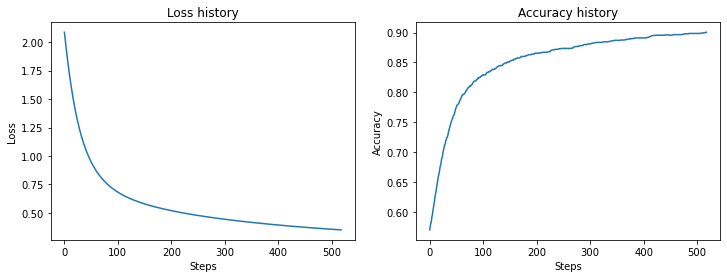

Training model for number 2
total step : 1 
error : 4.877095, accuarcy : 0.489745
total step : 2 
error : 4.814373, accuarcy : 0.489245
total step : 3 
error : 4.751881, accuarcy : 0.491246
total step : 4 
error : 4.689693, accuarcy : 0.490245
total step : 5 
error : 4.627884, accuarcy : 0.491246
total step : 6 
error : 4.566531, accuarcy : 0.493247
total step : 7 
error : 4.505707, accuarcy : 0.493747
total step : 8 
error : 4.445484, accuarcy : 0.495748
total step : 9 
error : 4.385929, accuarcy : 0.494247
total step : 10 
error : 4.327103, accuarcy : 0.495248
total step : 11 
error : 4.269060, accuarcy : 0.495248
total step : 12 
error : 4.211850, accuarcy : 0.495748
total step : 13 
error : 4.155511, accuarcy : 0.494747
total step : 14 
error : 4.100078, accuarcy : 0.492246
total step : 15 
error : 4.045577, accuarcy : 0.497249
total step : 16 
error : 3.992026, accuarcy : 0.498249
total step : 17 
error : 3.939440, accuarcy : 0.500250
total step : 18 
error : 3.887827, accuarcy : 

total step : 308 
error : 1.386498, accuarcy : 0.682341
total step : 309 
error : 1.384208, accuarcy : 0.682841
total step : 310 
error : 1.381925, accuarcy : 0.683342
total step : 311 
error : 1.379651, accuarcy : 0.682341
total step : 312 
error : 1.377386, accuarcy : 0.683342
total step : 313 
error : 1.375128, accuarcy : 0.684842
total step : 314 
error : 1.372879, accuarcy : 0.685343
total step : 315 
error : 1.370638, accuarcy : 0.685843
total step : 316 
error : 1.368405, accuarcy : 0.685843
total step : 317 
error : 1.366180, accuarcy : 0.685843
total step : 318 
error : 1.363963, accuarcy : 0.685843
total step : 319 
error : 1.361754, accuarcy : 0.686343
total step : 320 
error : 1.359553, accuarcy : 0.687344
total step : 321 
error : 1.357360, accuarcy : 0.687844
total step : 322 
error : 1.355175, accuarcy : 0.687844
total step : 323 
error : 1.352998, accuarcy : 0.688344
total step : 324 
error : 1.350829, accuarcy : 0.688844
total step : 325 
error : 1.348667, accuarcy : 0

total step : 515 
error : 1.045387, accuarcy : 0.740870
total step : 516 
error : 1.044218, accuarcy : 0.741871
total step : 517 
error : 1.043052, accuarcy : 0.741871
total step : 518 
error : 1.041889, accuarcy : 0.742371
total step : 519 
error : 1.040730, accuarcy : 0.742371
total step : 520 
error : 1.039574, accuarcy : 0.742371
total step : 521 
error : 1.038421, accuarcy : 0.742371
total step : 522 
error : 1.037272, accuarcy : 0.742371
total step : 523 
error : 1.036125, accuarcy : 0.742371
total step : 524 
error : 1.034983, accuarcy : 0.742371
total step : 525 
error : 1.033843, accuarcy : 0.742371
total step : 526 
error : 1.032707, accuarcy : 0.742371
total step : 527 
error : 1.031573, accuarcy : 0.742871
total step : 528 
error : 1.030443, accuarcy : 0.742871
total step : 529 
error : 1.029317, accuarcy : 0.743372
total step : 530 
error : 1.028193, accuarcy : 0.743372
total step : 531 
error : 1.027073, accuarcy : 0.743872
total step : 532 
error : 1.025956, accuarcy : 0

total step : 731 
error : 0.852976, accuarcy : 0.775888
total step : 732 
error : 0.852297, accuarcy : 0.775888
total step : 733 
error : 0.851620, accuarcy : 0.776388
total step : 734 
error : 0.850944, accuarcy : 0.776388
total step : 735 
error : 0.850269, accuarcy : 0.776888
total step : 736 
error : 0.849596, accuarcy : 0.776888
total step : 737 
error : 0.848924, accuarcy : 0.776888
total step : 738 
error : 0.848254, accuarcy : 0.776888
total step : 739 
error : 0.847585, accuarcy : 0.776888
total step : 740 
error : 0.846917, accuarcy : 0.776888
total step : 741 
error : 0.846251, accuarcy : 0.777389
total step : 742 
error : 0.845587, accuarcy : 0.777889
total step : 743 
error : 0.844923, accuarcy : 0.777889
total step : 744 
error : 0.844261, accuarcy : 0.777889
total step : 745 
error : 0.843601, accuarcy : 0.777889
total step : 746 
error : 0.842941, accuarcy : 0.777889
total step : 747 
error : 0.842283, accuarcy : 0.777889
total step : 748 
error : 0.841627, accuarcy : 0

total step : 958 
error : 0.727774, accuarcy : 0.794397
total step : 959 
error : 0.727325, accuarcy : 0.794397
total step : 960 
error : 0.726876, accuarcy : 0.794897
total step : 961 
error : 0.726428, accuarcy : 0.794897
total step : 962 
error : 0.725981, accuarcy : 0.794897
total step : 963 
error : 0.725535, accuarcy : 0.794897
total step : 964 
error : 0.725089, accuarcy : 0.794897
total step : 965 
error : 0.724645, accuarcy : 0.794897
total step : 966 
error : 0.724200, accuarcy : 0.794397
total step : 967 
error : 0.723757, accuarcy : 0.794397
total step : 968 
error : 0.723314, accuarcy : 0.794397
total step : 969 
error : 0.722872, accuarcy : 0.794397
total step : 970 
error : 0.722431, accuarcy : 0.794397
total step : 971 
error : 0.721990, accuarcy : 0.794897
total step : 972 
error : 0.721550, accuarcy : 0.794897
total step : 973 
error : 0.721111, accuarcy : 0.795398
total step : 974 
error : 0.720673, accuarcy : 0.795398
total step : 975 
error : 0.720235, accuarcy : 0

total step : 1177 
error : 0.644455, accuarcy : 0.811906
total step : 1178 
error : 0.644135, accuarcy : 0.811906
total step : 1179 
error : 0.643815, accuarcy : 0.811906
total step : 1180 
error : 0.643496, accuarcy : 0.811906
total step : 1181 
error : 0.643177, accuarcy : 0.811906
total step : 1182 
error : 0.642858, accuarcy : 0.811906
total step : 1183 
error : 0.642540, accuarcy : 0.811906
total step : 1184 
error : 0.642223, accuarcy : 0.811906
total step : 1185 
error : 0.641905, accuarcy : 0.811906
total step : 1186 
error : 0.641589, accuarcy : 0.811406
total step : 1187 
error : 0.641273, accuarcy : 0.811406
total step : 1188 
error : 0.640957, accuarcy : 0.811406
total step : 1189 
error : 0.640642, accuarcy : 0.811406
total step : 1190 
error : 0.640327, accuarcy : 0.811406
total step : 1191 
error : 0.640013, accuarcy : 0.811406
total step : 1192 
error : 0.639699, accuarcy : 0.811406
total step : 1193 
error : 0.639385, accuarcy : 0.811406
total step : 1194 
error : 0.63

total step : 1351 
error : 0.595071, accuarcy : 0.823912
total step : 1352 
error : 0.594820, accuarcy : 0.823912
total step : 1353 
error : 0.594570, accuarcy : 0.823912
total step : 1354 
error : 0.594320, accuarcy : 0.823912
total step : 1355 
error : 0.594070, accuarcy : 0.823912
total step : 1356 
error : 0.593820, accuarcy : 0.823912
total step : 1357 
error : 0.593571, accuarcy : 0.823912
total step : 1358 
error : 0.593322, accuarcy : 0.823912
total step : 1359 
error : 0.593074, accuarcy : 0.823912
total step : 1360 
error : 0.592826, accuarcy : 0.823912
total step : 1361 
error : 0.592578, accuarcy : 0.823912
total step : 1362 
error : 0.592330, accuarcy : 0.823912
total step : 1363 
error : 0.592083, accuarcy : 0.823912
total step : 1364 
error : 0.591836, accuarcy : 0.823912
total step : 1365 
error : 0.591590, accuarcy : 0.823912
total step : 1366 
error : 0.591344, accuarcy : 0.823912
total step : 1367 
error : 0.591098, accuarcy : 0.823912
total step : 1368 
error : 0.59

total step : 1556 
error : 0.549820, accuarcy : 0.832916
total step : 1557 
error : 0.549626, accuarcy : 0.832916
total step : 1558 
error : 0.549432, accuarcy : 0.832916
total step : 1559 
error : 0.549238, accuarcy : 0.832916
total step : 1560 
error : 0.549045, accuarcy : 0.832916
total step : 1561 
error : 0.548851, accuarcy : 0.832916
total step : 1562 
error : 0.548658, accuarcy : 0.832916
total step : 1563 
error : 0.548466, accuarcy : 0.832916
total step : 1564 
error : 0.548273, accuarcy : 0.832916
total step : 1565 
error : 0.548081, accuarcy : 0.832916
total step : 1566 
error : 0.547889, accuarcy : 0.832916
total step : 1567 
error : 0.547697, accuarcy : 0.832916
total step : 1568 
error : 0.547505, accuarcy : 0.832916
total step : 1569 
error : 0.547314, accuarcy : 0.832916
total step : 1570 
error : 0.547123, accuarcy : 0.832916
total step : 1571 
error : 0.546932, accuarcy : 0.832916
total step : 1572 
error : 0.546741, accuarcy : 0.832916
total step : 1573 
error : 0.54

total step : 1764 
error : 0.513778, accuarcy : 0.847924
total step : 1765 
error : 0.513624, accuarcy : 0.847924
total step : 1766 
error : 0.513469, accuarcy : 0.847924
total step : 1767 
error : 0.513315, accuarcy : 0.847924
total step : 1768 
error : 0.513161, accuarcy : 0.847924
total step : 1769 
error : 0.513007, accuarcy : 0.847924
total step : 1770 
error : 0.512854, accuarcy : 0.847924
total step : 1771 
error : 0.512700, accuarcy : 0.847924
total step : 1772 
error : 0.512547, accuarcy : 0.847924
total step : 1773 
error : 0.512393, accuarcy : 0.847924
total step : 1774 
error : 0.512240, accuarcy : 0.847924
total step : 1775 
error : 0.512087, accuarcy : 0.847924
total step : 1776 
error : 0.511934, accuarcy : 0.847924
total step : 1777 
error : 0.511782, accuarcy : 0.847924
total step : 1778 
error : 0.511629, accuarcy : 0.847924
total step : 1779 
error : 0.511477, accuarcy : 0.847924
total step : 1780 
error : 0.511325, accuarcy : 0.847924
total step : 1781 
error : 0.51

total step : 1985 
error : 0.483127, accuarcy : 0.853427
total step : 1986 
error : 0.483003, accuarcy : 0.853427
total step : 1987 
error : 0.482878, accuarcy : 0.853427
total step : 1988 
error : 0.482754, accuarcy : 0.853427
total step : 1989 
error : 0.482630, accuarcy : 0.853427
total step : 1990 
error : 0.482507, accuarcy : 0.853427
total step : 1991 
error : 0.482383, accuarcy : 0.853427
total step : 1992 
error : 0.482259, accuarcy : 0.853427
total step : 1993 
error : 0.482136, accuarcy : 0.853427
total step : 1994 
error : 0.482013, accuarcy : 0.853427
total step : 1995 
error : 0.481889, accuarcy : 0.853427
total step : 1996 
error : 0.481766, accuarcy : 0.853427
total step : 1997 
error : 0.481643, accuarcy : 0.853427
total step : 1998 
error : 0.481520, accuarcy : 0.853427
total step : 1999 
error : 0.481398, accuarcy : 0.853427
total step : 2000 
error : 0.481275, accuarcy : 0.853927
total step : 2001 
error : 0.481152, accuarcy : 0.853927
total step : 2002 
error : 0.48

total step : 2206 
error : 0.458255, accuarcy : 0.860930
total step : 2207 
error : 0.458153, accuarcy : 0.860930
total step : 2208 
error : 0.458052, accuarcy : 0.860930
total step : 2209 
error : 0.457950, accuarcy : 0.860930
total step : 2210 
error : 0.457849, accuarcy : 0.860930
total step : 2211 
error : 0.457747, accuarcy : 0.860930
total step : 2212 
error : 0.457646, accuarcy : 0.861431
total step : 2213 
error : 0.457545, accuarcy : 0.861431
total step : 2214 
error : 0.457444, accuarcy : 0.861431
total step : 2215 
error : 0.457343, accuarcy : 0.861431
total step : 2216 
error : 0.457242, accuarcy : 0.861431
total step : 2217 
error : 0.457141, accuarcy : 0.861431
total step : 2218 
error : 0.457040, accuarcy : 0.861431
total step : 2219 
error : 0.456939, accuarcy : 0.861431
total step : 2220 
error : 0.456839, accuarcy : 0.861931
total step : 2221 
error : 0.456738, accuarcy : 0.861931
total step : 2222 
error : 0.456638, accuarcy : 0.861931
total step : 2223 
error : 0.45

total step : 2454 
error : 0.435472, accuarcy : 0.868934
total step : 2455 
error : 0.435389, accuarcy : 0.868934
total step : 2456 
error : 0.435306, accuarcy : 0.868934
total step : 2457 
error : 0.435224, accuarcy : 0.868934
total step : 2458 
error : 0.435141, accuarcy : 0.868934
total step : 2459 
error : 0.435058, accuarcy : 0.868934
total step : 2460 
error : 0.434976, accuarcy : 0.868934
total step : 2461 
error : 0.434893, accuarcy : 0.868934
total step : 2462 
error : 0.434811, accuarcy : 0.868934
total step : 2463 
error : 0.434729, accuarcy : 0.869435
total step : 2464 
error : 0.434646, accuarcy : 0.869435
total step : 2465 
error : 0.434564, accuarcy : 0.869435
total step : 2466 
error : 0.434482, accuarcy : 0.869435
total step : 2467 
error : 0.434400, accuarcy : 0.869435
total step : 2468 
error : 0.434318, accuarcy : 0.869435
total step : 2469 
error : 0.434236, accuarcy : 0.869435
total step : 2470 
error : 0.434154, accuarcy : 0.869435
total step : 2471 
error : 0.43

total step : 2673 
error : 0.418771, accuarcy : 0.873937
total step : 2674 
error : 0.418701, accuarcy : 0.873937
total step : 2675 
error : 0.418631, accuarcy : 0.873937
total step : 2676 
error : 0.418561, accuarcy : 0.873937
total step : 2677 
error : 0.418491, accuarcy : 0.873937
total step : 2678 
error : 0.418421, accuarcy : 0.873937
total step : 2679 
error : 0.418351, accuarcy : 0.873937
total step : 2680 
error : 0.418281, accuarcy : 0.873937
total step : 2681 
error : 0.418211, accuarcy : 0.873937
total step : 2682 
error : 0.418142, accuarcy : 0.874437
total step : 2683 
error : 0.418072, accuarcy : 0.874437
total step : 2684 
error : 0.418002, accuarcy : 0.874437
total step : 2685 
error : 0.417933, accuarcy : 0.874437
total step : 2686 
error : 0.417863, accuarcy : 0.874437
total step : 2687 
error : 0.417794, accuarcy : 0.874937
total step : 2688 
error : 0.417724, accuarcy : 0.874937
total step : 2689 
error : 0.417655, accuarcy : 0.874937
total step : 2690 
error : 0.41

total step : 2911 
error : 0.403398, accuarcy : 0.878439
total step : 2912 
error : 0.403339, accuarcy : 0.878439
total step : 2913 
error : 0.403279, accuarcy : 0.878439
total step : 2914 
error : 0.403220, accuarcy : 0.878439
total step : 2915 
error : 0.403160, accuarcy : 0.878939
total step : 2916 
error : 0.403101, accuarcy : 0.878939
total step : 2917 
error : 0.403042, accuarcy : 0.878939
total step : 2918 
error : 0.402983, accuarcy : 0.879440
total step : 2919 
error : 0.402924, accuarcy : 0.878939
total step : 2920 
error : 0.402864, accuarcy : 0.878939
total step : 2921 
error : 0.402805, accuarcy : 0.879440
total step : 2922 
error : 0.402746, accuarcy : 0.879440
total step : 2923 
error : 0.402687, accuarcy : 0.879440
total step : 2924 
error : 0.402628, accuarcy : 0.879440
total step : 2925 
error : 0.402569, accuarcy : 0.879440
total step : 2926 
error : 0.402510, accuarcy : 0.879440
total step : 2927 
error : 0.402451, accuarcy : 0.879440
total step : 2928 
error : 0.40

total step : 3158 
error : 0.389810, accuarcy : 0.884942
total step : 3159 
error : 0.389760, accuarcy : 0.884942
total step : 3160 
error : 0.389709, accuarcy : 0.884942
total step : 3161 
error : 0.389658, accuarcy : 0.884942
total step : 3162 
error : 0.389607, accuarcy : 0.884942
total step : 3163 
error : 0.389556, accuarcy : 0.884942
total step : 3164 
error : 0.389506, accuarcy : 0.884942
total step : 3165 
error : 0.389455, accuarcy : 0.884942
total step : 3166 
error : 0.389404, accuarcy : 0.884942
total step : 3167 
error : 0.389354, accuarcy : 0.884942
total step : 3168 
error : 0.389303, accuarcy : 0.884942
total step : 3169 
error : 0.389252, accuarcy : 0.884942
total step : 3170 
error : 0.389202, accuarcy : 0.884942
total step : 3171 
error : 0.389151, accuarcy : 0.884942
total step : 3172 
error : 0.389101, accuarcy : 0.884942
total step : 3173 
error : 0.389050, accuarcy : 0.884942
total step : 3174 
error : 0.389000, accuarcy : 0.884942
total step : 3175 
error : 0.38

total step : 3401 
error : 0.378270, accuarcy : 0.886443
total step : 3402 
error : 0.378226, accuarcy : 0.886443
total step : 3403 
error : 0.378181, accuarcy : 0.886443
total step : 3404 
error : 0.378137, accuarcy : 0.886443
total step : 3405 
error : 0.378093, accuarcy : 0.886443
total step : 3406 
error : 0.378049, accuarcy : 0.886443
total step : 3407 
error : 0.378004, accuarcy : 0.886443
total step : 3408 
error : 0.377960, accuarcy : 0.886443
total step : 3409 
error : 0.377916, accuarcy : 0.886443
total step : 3410 
error : 0.377872, accuarcy : 0.886443
total step : 3411 
error : 0.377828, accuarcy : 0.886443
total step : 3412 
error : 0.377784, accuarcy : 0.886443
total step : 3413 
error : 0.377740, accuarcy : 0.886443
total step : 3414 
error : 0.377696, accuarcy : 0.886443
total step : 3415 
error : 0.377652, accuarcy : 0.886443
total step : 3416 
error : 0.377608, accuarcy : 0.886443
total step : 3417 
error : 0.377564, accuarcy : 0.886443
total step : 3418 
error : 0.37

total step : 3639 
error : 0.368352, accuarcy : 0.890945
total step : 3640 
error : 0.368313, accuarcy : 0.891446
total step : 3641 
error : 0.368273, accuarcy : 0.891446
total step : 3642 
error : 0.368234, accuarcy : 0.891446
total step : 3643 
error : 0.368195, accuarcy : 0.891446
total step : 3644 
error : 0.368156, accuarcy : 0.891446
total step : 3645 
error : 0.368117, accuarcy : 0.891446
total step : 3646 
error : 0.368078, accuarcy : 0.891446
total step : 3647 
error : 0.368039, accuarcy : 0.891446
total step : 3648 
error : 0.368000, accuarcy : 0.891446
total step : 3649 
error : 0.367961, accuarcy : 0.891446
total step : 3650 
error : 0.367922, accuarcy : 0.891446
total step : 3651 
error : 0.367883, accuarcy : 0.891446
total step : 3652 
error : 0.367844, accuarcy : 0.891446
total step : 3653 
error : 0.367805, accuarcy : 0.891446
total step : 3654 
error : 0.367766, accuarcy : 0.891446
total step : 3655 
error : 0.367727, accuarcy : 0.891446
total step : 3656 
error : 0.36

total step : 3865 
error : 0.359957, accuarcy : 0.892946
total step : 3866 
error : 0.359922, accuarcy : 0.892946
total step : 3867 
error : 0.359887, accuarcy : 0.892946
total step : 3868 
error : 0.359851, accuarcy : 0.892946
total step : 3869 
error : 0.359816, accuarcy : 0.892946
total step : 3870 
error : 0.359781, accuarcy : 0.892946
total step : 3871 
error : 0.359746, accuarcy : 0.892946
total step : 3872 
error : 0.359711, accuarcy : 0.892946
total step : 3873 
error : 0.359676, accuarcy : 0.892946
total step : 3874 
error : 0.359641, accuarcy : 0.892946
total step : 3875 
error : 0.359606, accuarcy : 0.892946
total step : 3876 
error : 0.359571, accuarcy : 0.892946
total step : 3877 
error : 0.359536, accuarcy : 0.892946
total step : 3878 
error : 0.359501, accuarcy : 0.892946
total step : 3879 
error : 0.359466, accuarcy : 0.892946
total step : 3880 
error : 0.359431, accuarcy : 0.892946
total step : 3881 
error : 0.359396, accuarcy : 0.892946
total step : 3882 
error : 0.35

total step : 4098 
error : 0.352160, accuarcy : 0.894447
total step : 4099 
error : 0.352128, accuarcy : 0.894447
total step : 4100 
error : 0.352097, accuarcy : 0.894447
total step : 4101 
error : 0.352065, accuarcy : 0.894447
total step : 4102 
error : 0.352033, accuarcy : 0.894447
total step : 4103 
error : 0.352001, accuarcy : 0.894447
total step : 4104 
error : 0.351970, accuarcy : 0.894447
total step : 4105 
error : 0.351938, accuarcy : 0.894447
total step : 4106 
error : 0.351906, accuarcy : 0.894447
total step : 4107 
error : 0.351874, accuarcy : 0.894447
total step : 4108 
error : 0.351843, accuarcy : 0.894447
total step : 4109 
error : 0.351811, accuarcy : 0.894447
total step : 4110 
error : 0.351779, accuarcy : 0.894447
total step : 4111 
error : 0.351748, accuarcy : 0.894447
total step : 4112 
error : 0.351716, accuarcy : 0.894447
total step : 4113 
error : 0.351685, accuarcy : 0.894447
total step : 4114 
error : 0.351653, accuarcy : 0.894447
total step : 4115 
error : 0.35

total step : 4306 
error : 0.345818, accuarcy : 0.896448
total step : 4307 
error : 0.345789, accuarcy : 0.896448
total step : 4308 
error : 0.345760, accuarcy : 0.896448
total step : 4309 
error : 0.345731, accuarcy : 0.896448
total step : 4310 
error : 0.345701, accuarcy : 0.896448
total step : 4311 
error : 0.345672, accuarcy : 0.896448
total step : 4312 
error : 0.345643, accuarcy : 0.896448
total step : 4313 
error : 0.345614, accuarcy : 0.896448
total step : 4314 
error : 0.345585, accuarcy : 0.896448
total step : 4315 
error : 0.345556, accuarcy : 0.896448
total step : 4316 
error : 0.345527, accuarcy : 0.896448
total step : 4317 
error : 0.345497, accuarcy : 0.896448
total step : 4318 
error : 0.345468, accuarcy : 0.896448
total step : 4319 
error : 0.345439, accuarcy : 0.896448
total step : 4320 
error : 0.345410, accuarcy : 0.896448
total step : 4321 
error : 0.345381, accuarcy : 0.896448
total step : 4322 
error : 0.345352, accuarcy : 0.896448
total step : 4323 
error : 0.34

total step : 4513 
error : 0.340001, accuarcy : 0.896948
total step : 4514 
error : 0.339974, accuarcy : 0.896948
total step : 4515 
error : 0.339947, accuarcy : 0.896948
total step : 4516 
error : 0.339920, accuarcy : 0.896948
total step : 4517 
error : 0.339893, accuarcy : 0.896948
total step : 4518 
error : 0.339866, accuarcy : 0.896948
total step : 4519 
error : 0.339839, accuarcy : 0.896948
total step : 4520 
error : 0.339812, accuarcy : 0.896948
total step : 4521 
error : 0.339786, accuarcy : 0.896948
total step : 4522 
error : 0.339759, accuarcy : 0.896948
total step : 4523 
error : 0.339732, accuarcy : 0.896948
total step : 4524 
error : 0.339705, accuarcy : 0.896948
total step : 4525 
error : 0.339678, accuarcy : 0.896948
total step : 4526 
error : 0.339651, accuarcy : 0.896948
total step : 4527 
error : 0.339624, accuarcy : 0.896948
total step : 4528 
error : 0.339597, accuarcy : 0.896948
total step : 4529 
error : 0.339570, accuarcy : 0.896948
total step : 4530 
error : 0.33

total step : 4744 
error : 0.334013, accuarcy : 0.898949
total step : 4745 
error : 0.333988, accuarcy : 0.898949
total step : 4746 
error : 0.333963, accuarcy : 0.898949
total step : 4747 
error : 0.333938, accuarcy : 0.898949
total step : 4748 
error : 0.333913, accuarcy : 0.898949
total step : 4749 
error : 0.333888, accuarcy : 0.898949
total step : 4750 
error : 0.333864, accuarcy : 0.898949
total step : 4751 
error : 0.333839, accuarcy : 0.898949
total step : 4752 
error : 0.333814, accuarcy : 0.898949
total step : 4753 
error : 0.333789, accuarcy : 0.898949
total step : 4754 
error : 0.333764, accuarcy : 0.898949
total step : 4755 
error : 0.333739, accuarcy : 0.898949
total step : 4756 
error : 0.333715, accuarcy : 0.898949
total step : 4757 
error : 0.333690, accuarcy : 0.898949
total step : 4758 
error : 0.333665, accuarcy : 0.898949
total step : 4759 
error : 0.333640, accuarcy : 0.898949
total step : 4760 
error : 0.333616, accuarcy : 0.898949
total step : 4761 
error : 0.33

total step : 4958 
error : 0.328876, accuarcy : 0.899450
total step : 4959 
error : 0.328853, accuarcy : 0.899450
total step : 4960 
error : 0.328830, accuarcy : 0.899450
total step : 4961 
error : 0.328806, accuarcy : 0.899450
total step : 4962 
error : 0.328783, accuarcy : 0.899450
total step : 4963 
error : 0.328760, accuarcy : 0.899450
total step : 4964 
error : 0.328737, accuarcy : 0.899450
total step : 4965 
error : 0.328714, accuarcy : 0.899450
total step : 4966 
error : 0.328691, accuarcy : 0.899450
total step : 4967 
error : 0.328668, accuarcy : 0.899450
total step : 4968 
error : 0.328645, accuarcy : 0.899450
total step : 4969 
error : 0.328622, accuarcy : 0.899450
total step : 4970 
error : 0.328598, accuarcy : 0.899450
total step : 4971 
error : 0.328575, accuarcy : 0.899450
total step : 4972 
error : 0.328552, accuarcy : 0.899450
total step : 4973 
error : 0.328529, accuarcy : 0.899450
total step : 4974 
error : 0.328506, accuarcy : 0.899450
total step : 4975 
error : 0.32

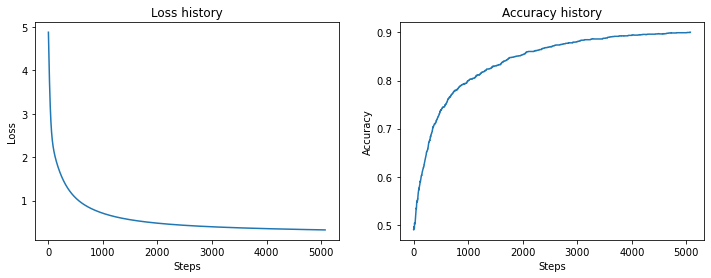

Training model for number 3
total step : 1 
error : 5.508943, accuarcy : 0.477739
total step : 2 
error : 5.450909, accuarcy : 0.477239
total step : 3 
error : 5.392740, accuarcy : 0.478239
total step : 4 
error : 5.334472, accuarcy : 0.476738
total step : 5 
error : 5.276147, accuarcy : 0.476738
total step : 6 
error : 5.217805, accuarcy : 0.477239
total step : 7 
error : 5.159490, accuarcy : 0.478239
total step : 8 
error : 5.101248, accuarcy : 0.479240
total step : 9 
error : 5.043123, accuarcy : 0.480740
total step : 10 
error : 4.985164, accuarcy : 0.479240
total step : 11 
error : 4.927418, accuarcy : 0.480740
total step : 12 
error : 4.869930, accuarcy : 0.481741
total step : 13 
error : 4.812746, accuarcy : 0.482241
total step : 14 
error : 4.755914, accuarcy : 0.482241
total step : 15 
error : 4.699476, accuarcy : 0.481741
total step : 16 
error : 4.643477, accuarcy : 0.482241
total step : 17 
error : 4.587962, accuarcy : 0.483242
total step : 18 
error : 4.532972, accuarcy : 

total step : 184 
error : 1.843675, accuarcy : 0.618309
total step : 185 
error : 1.839228, accuarcy : 0.619310
total step : 186 
error : 1.834806, accuarcy : 0.620310
total step : 187 
error : 1.830408, accuarcy : 0.621311
total step : 188 
error : 1.826035, accuarcy : 0.620810
total step : 189 
error : 1.821687, accuarcy : 0.620810
total step : 190 
error : 1.817362, accuarcy : 0.620810
total step : 191 
error : 1.813062, accuarcy : 0.620810
total step : 192 
error : 1.808785, accuarcy : 0.621311
total step : 193 
error : 1.804531, accuarcy : 0.621811
total step : 194 
error : 1.800301, accuarcy : 0.622311
total step : 195 
error : 1.796094, accuarcy : 0.623312
total step : 196 
error : 1.791909, accuarcy : 0.623812
total step : 197 
error : 1.787748, accuarcy : 0.624812
total step : 198 
error : 1.783608, accuarcy : 0.625813
total step : 199 
error : 1.779492, accuarcy : 0.626313
total step : 200 
error : 1.775397, accuarcy : 0.626313
total step : 201 
error : 1.771324, accuarcy : 0

total step : 435 
error : 1.202158, accuarcy : 0.718859
total step : 436 
error : 1.200762, accuarcy : 0.718859
total step : 437 
error : 1.199372, accuarcy : 0.718859
total step : 438 
error : 1.197987, accuarcy : 0.719360
total step : 439 
error : 1.196607, accuarcy : 0.719360
total step : 440 
error : 1.195233, accuarcy : 0.719860
total step : 441 
error : 1.193863, accuarcy : 0.719860
total step : 442 
error : 1.192499, accuarcy : 0.720360
total step : 443 
error : 1.191139, accuarcy : 0.721861
total step : 444 
error : 1.189785, accuarcy : 0.721861
total step : 445 
error : 1.188436, accuarcy : 0.721861
total step : 446 
error : 1.187091, accuarcy : 0.721861
total step : 447 
error : 1.185752, accuarcy : 0.722361
total step : 448 
error : 1.184418, accuarcy : 0.721861
total step : 449 
error : 1.183088, accuarcy : 0.721861
total step : 450 
error : 1.181763, accuarcy : 0.721861
total step : 451 
error : 1.180443, accuarcy : 0.722861
total step : 452 
error : 1.179128, accuarcy : 0

total step : 671 
error : 0.971598, accuarcy : 0.764882
total step : 672 
error : 0.970908, accuarcy : 0.765383
total step : 673 
error : 0.970220, accuarcy : 0.765883
total step : 674 
error : 0.969534, accuarcy : 0.765883
total step : 675 
error : 0.968849, accuarcy : 0.765883
total step : 676 
error : 0.968166, accuarcy : 0.765883
total step : 677 
error : 0.967484, accuarcy : 0.765883
total step : 678 
error : 0.966804, accuarcy : 0.766383
total step : 679 
error : 0.966126, accuarcy : 0.766883
total step : 680 
error : 0.965449, accuarcy : 0.767384
total step : 681 
error : 0.964774, accuarcy : 0.767384
total step : 682 
error : 0.964100, accuarcy : 0.767384
total step : 683 
error : 0.963428, accuarcy : 0.767884
total step : 684 
error : 0.962758, accuarcy : 0.767884
total step : 685 
error : 0.962089, accuarcy : 0.767884
total step : 686 
error : 0.961422, accuarcy : 0.767884
total step : 687 
error : 0.960756, accuarcy : 0.767884
total step : 688 
error : 0.960092, accuarcy : 0

total step : 889 
error : 0.851848, accuarcy : 0.784392
total step : 890 
error : 0.851410, accuarcy : 0.784392
total step : 891 
error : 0.850973, accuarcy : 0.784392
total step : 892 
error : 0.850536, accuarcy : 0.784392
total step : 893 
error : 0.850101, accuarcy : 0.784392
total step : 894 
error : 0.849666, accuarcy : 0.784392
total step : 895 
error : 0.849232, accuarcy : 0.784392
total step : 896 
error : 0.848799, accuarcy : 0.784392
total step : 897 
error : 0.848366, accuarcy : 0.784392
total step : 898 
error : 0.847935, accuarcy : 0.784392
total step : 899 
error : 0.847504, accuarcy : 0.784892
total step : 900 
error : 0.847074, accuarcy : 0.784892
total step : 901 
error : 0.846645, accuarcy : 0.784892
total step : 902 
error : 0.846216, accuarcy : 0.785893
total step : 903 
error : 0.845788, accuarcy : 0.785893
total step : 904 
error : 0.845361, accuarcy : 0.785893
total step : 905 
error : 0.844935, accuarcy : 0.785893
total step : 906 
error : 0.844510, accuarcy : 0

total step : 1090 
error : 0.777433, accuarcy : 0.797899
total step : 1091 
error : 0.777120, accuarcy : 0.797899
total step : 1092 
error : 0.776808, accuarcy : 0.797899
total step : 1093 
error : 0.776496, accuarcy : 0.797899
total step : 1094 
error : 0.776184, accuarcy : 0.797899
total step : 1095 
error : 0.775874, accuarcy : 0.797899
total step : 1096 
error : 0.775563, accuarcy : 0.798399
total step : 1097 
error : 0.775253, accuarcy : 0.798399
total step : 1098 
error : 0.774944, accuarcy : 0.798399
total step : 1099 
error : 0.774635, accuarcy : 0.798399
total step : 1100 
error : 0.774327, accuarcy : 0.798399
total step : 1101 
error : 0.774019, accuarcy : 0.799400
total step : 1102 
error : 0.773711, accuarcy : 0.799400
total step : 1103 
error : 0.773404, accuarcy : 0.799400
total step : 1104 
error : 0.773097, accuarcy : 0.799400
total step : 1105 
error : 0.772791, accuarcy : 0.799400
total step : 1106 
error : 0.772485, accuarcy : 0.799400
total step : 1107 
error : 0.77

total step : 1321 
error : 0.715706, accuarcy : 0.814407
total step : 1322 
error : 0.715477, accuarcy : 0.814407
total step : 1323 
error : 0.715248, accuarcy : 0.814407
total step : 1324 
error : 0.715019, accuarcy : 0.814407
total step : 1325 
error : 0.714790, accuarcy : 0.814407
total step : 1326 
error : 0.714562, accuarcy : 0.814407
total step : 1327 
error : 0.714334, accuarcy : 0.814407
total step : 1328 
error : 0.714107, accuarcy : 0.814407
total step : 1329 
error : 0.713879, accuarcy : 0.814407
total step : 1330 
error : 0.713652, accuarcy : 0.814407
total step : 1331 
error : 0.713425, accuarcy : 0.814407
total step : 1332 
error : 0.713199, accuarcy : 0.814407
total step : 1333 
error : 0.712972, accuarcy : 0.814407
total step : 1334 
error : 0.712746, accuarcy : 0.814407
total step : 1335 
error : 0.712520, accuarcy : 0.814407
total step : 1336 
error : 0.712295, accuarcy : 0.814407
total step : 1337 
error : 0.712070, accuarcy : 0.814407
total step : 1338 
error : 0.71

total step : 1557 
error : 0.667915, accuarcy : 0.825913
total step : 1558 
error : 0.667736, accuarcy : 0.825913
total step : 1559 
error : 0.667556, accuarcy : 0.825913
total step : 1560 
error : 0.667377, accuarcy : 0.825913
total step : 1561 
error : 0.667198, accuarcy : 0.825913
total step : 1562 
error : 0.667019, accuarcy : 0.825913
total step : 1563 
error : 0.666840, accuarcy : 0.825913
total step : 1564 
error : 0.666662, accuarcy : 0.826413
total step : 1565 
error : 0.666483, accuarcy : 0.826413
total step : 1566 
error : 0.666305, accuarcy : 0.826913
total step : 1567 
error : 0.666127, accuarcy : 0.826913
total step : 1568 
error : 0.665949, accuarcy : 0.826913
total step : 1569 
error : 0.665771, accuarcy : 0.826913
total step : 1570 
error : 0.665593, accuarcy : 0.826913
total step : 1571 
error : 0.665416, accuarcy : 0.826913
total step : 1572 
error : 0.665238, accuarcy : 0.826913
total step : 1573 
error : 0.665061, accuarcy : 0.826913
total step : 1574 
error : 0.66

total step : 1792 
error : 0.629660, accuarcy : 0.834417
total step : 1793 
error : 0.629512, accuarcy : 0.834417
total step : 1794 
error : 0.629365, accuarcy : 0.834417
total step : 1795 
error : 0.629217, accuarcy : 0.834417
total step : 1796 
error : 0.629069, accuarcy : 0.834417
total step : 1797 
error : 0.628922, accuarcy : 0.834417
total step : 1798 
error : 0.628775, accuarcy : 0.834417
total step : 1799 
error : 0.628628, accuarcy : 0.834417
total step : 1800 
error : 0.628481, accuarcy : 0.834417
total step : 1801 
error : 0.628334, accuarcy : 0.834417
total step : 1802 
error : 0.628187, accuarcy : 0.834417
total step : 1803 
error : 0.628040, accuarcy : 0.834417
total step : 1804 
error : 0.627893, accuarcy : 0.834417
total step : 1805 
error : 0.627747, accuarcy : 0.834417
total step : 1806 
error : 0.627600, accuarcy : 0.834417
total step : 1807 
error : 0.627454, accuarcy : 0.834417
total step : 1808 
error : 0.627308, accuarcy : 0.834417
total step : 1809 
error : 0.62

total step : 2042 
error : 0.595819, accuarcy : 0.839420
total step : 2043 
error : 0.595695, accuarcy : 0.839420
total step : 2044 
error : 0.595571, accuarcy : 0.839920
total step : 2045 
error : 0.595447, accuarcy : 0.839920
total step : 2046 
error : 0.595323, accuarcy : 0.839920
total step : 2047 
error : 0.595199, accuarcy : 0.839920
total step : 2048 
error : 0.595076, accuarcy : 0.839920
total step : 2049 
error : 0.594952, accuarcy : 0.839920
total step : 2050 
error : 0.594829, accuarcy : 0.839920
total step : 2051 
error : 0.594705, accuarcy : 0.839920
total step : 2052 
error : 0.594582, accuarcy : 0.839920
total step : 2053 
error : 0.594459, accuarcy : 0.839920
total step : 2054 
error : 0.594335, accuarcy : 0.839420
total step : 2055 
error : 0.594212, accuarcy : 0.839420
total step : 2056 
error : 0.594089, accuarcy : 0.839920
total step : 2057 
error : 0.593966, accuarcy : 0.839920
total step : 2058 
error : 0.593844, accuarcy : 0.839920
total step : 2059 
error : 0.59

total step : 2292 
error : 0.567114, accuarcy : 0.848424
total step : 2293 
error : 0.567008, accuarcy : 0.848924
total step : 2294 
error : 0.566902, accuarcy : 0.848924
total step : 2295 
error : 0.566796, accuarcy : 0.848924
total step : 2296 
error : 0.566690, accuarcy : 0.848924
total step : 2297 
error : 0.566584, accuarcy : 0.848924
total step : 2298 
error : 0.566478, accuarcy : 0.848924
total step : 2299 
error : 0.566372, accuarcy : 0.848924
total step : 2300 
error : 0.566266, accuarcy : 0.848924
total step : 2301 
error : 0.566160, accuarcy : 0.848924
total step : 2302 
error : 0.566054, accuarcy : 0.848924
total step : 2303 
error : 0.565949, accuarcy : 0.848924
total step : 2304 
error : 0.565843, accuarcy : 0.848924
total step : 2305 
error : 0.565738, accuarcy : 0.848924
total step : 2306 
error : 0.565632, accuarcy : 0.848924
total step : 2307 
error : 0.565527, accuarcy : 0.848924
total step : 2308 
error : 0.565421, accuarcy : 0.848924
total step : 2309 
error : 0.56

total step : 2541 
error : 0.542432, accuarcy : 0.852426
total step : 2542 
error : 0.542340, accuarcy : 0.852426
total step : 2543 
error : 0.542248, accuarcy : 0.852426
total step : 2544 
error : 0.542155, accuarcy : 0.852426
total step : 2545 
error : 0.542063, accuarcy : 0.852426
total step : 2546 
error : 0.541971, accuarcy : 0.852426
total step : 2547 
error : 0.541879, accuarcy : 0.852926
total step : 2548 
error : 0.541786, accuarcy : 0.852926
total step : 2549 
error : 0.541694, accuarcy : 0.852926
total step : 2550 
error : 0.541602, accuarcy : 0.852926
total step : 2551 
error : 0.541510, accuarcy : 0.852926
total step : 2552 
error : 0.541418, accuarcy : 0.852926
total step : 2553 
error : 0.541327, accuarcy : 0.852926
total step : 2554 
error : 0.541235, accuarcy : 0.852926
total step : 2555 
error : 0.541143, accuarcy : 0.852926
total step : 2556 
error : 0.541051, accuarcy : 0.852926
total step : 2557 
error : 0.540960, accuarcy : 0.852926
total step : 2558 
error : 0.54

error : 0.521505, accuarcy : 0.856428
total step : 2783 
error : 0.521423, accuarcy : 0.856428
total step : 2784 
error : 0.521341, accuarcy : 0.856428
total step : 2785 
error : 0.521260, accuarcy : 0.856428
total step : 2786 
error : 0.521179, accuarcy : 0.856428
total step : 2787 
error : 0.521097, accuarcy : 0.856428
total step : 2788 
error : 0.521016, accuarcy : 0.856428
total step : 2789 
error : 0.520935, accuarcy : 0.855928
total step : 2790 
error : 0.520853, accuarcy : 0.855928
total step : 2791 
error : 0.520772, accuarcy : 0.855928
total step : 2792 
error : 0.520691, accuarcy : 0.855928
total step : 2793 
error : 0.520610, accuarcy : 0.855928
total step : 2794 
error : 0.520529, accuarcy : 0.855928
total step : 2795 
error : 0.520448, accuarcy : 0.855928
total step : 2796 
error : 0.520366, accuarcy : 0.855928
total step : 2797 
error : 0.520286, accuarcy : 0.855928
total step : 2798 
error : 0.520205, accuarcy : 0.855928
total step : 2799 
error : 0.520124, accuarcy : 0.

total step : 3005 
error : 0.504276, accuarcy : 0.858929
total step : 3006 
error : 0.504203, accuarcy : 0.858929
total step : 3007 
error : 0.504130, accuarcy : 0.858929
total step : 3008 
error : 0.504056, accuarcy : 0.858929
total step : 3009 
error : 0.503983, accuarcy : 0.858929
total step : 3010 
error : 0.503910, accuarcy : 0.858929
total step : 3011 
error : 0.503837, accuarcy : 0.858929
total step : 3012 
error : 0.503764, accuarcy : 0.858929
total step : 3013 
error : 0.503692, accuarcy : 0.858929
total step : 3014 
error : 0.503619, accuarcy : 0.858929
total step : 3015 
error : 0.503546, accuarcy : 0.858929
total step : 3016 
error : 0.503473, accuarcy : 0.858929
total step : 3017 
error : 0.503400, accuarcy : 0.858929
total step : 3018 
error : 0.503327, accuarcy : 0.858929
total step : 3019 
error : 0.503255, accuarcy : 0.858929
total step : 3020 
error : 0.503182, accuarcy : 0.858929
total step : 3021 
error : 0.503109, accuarcy : 0.858929
total step : 3022 
error : 0.50

total step : 3203 
error : 0.490435, accuarcy : 0.862931
total step : 3204 
error : 0.490368, accuarcy : 0.862931
total step : 3205 
error : 0.490302, accuarcy : 0.862931
total step : 3206 
error : 0.490235, accuarcy : 0.862931
total step : 3207 
error : 0.490168, accuarcy : 0.862931
total step : 3208 
error : 0.490102, accuarcy : 0.862931
total step : 3209 
error : 0.490035, accuarcy : 0.862931
total step : 3210 
error : 0.489968, accuarcy : 0.862931
total step : 3211 
error : 0.489902, accuarcy : 0.862931
total step : 3212 
error : 0.489835, accuarcy : 0.862931
total step : 3213 
error : 0.489769, accuarcy : 0.862931
total step : 3214 
error : 0.489702, accuarcy : 0.862931
total step : 3215 
error : 0.489636, accuarcy : 0.862931
total step : 3216 
error : 0.489569, accuarcy : 0.862931
total step : 3217 
error : 0.489503, accuarcy : 0.862931
total step : 3218 
error : 0.489437, accuarcy : 0.862931
total step : 3219 
error : 0.489370, accuarcy : 0.862931
total step : 3220 
error : 0.48

total step : 3429 
error : 0.476073, accuarcy : 0.865433
total step : 3430 
error : 0.476012, accuarcy : 0.865433
total step : 3431 
error : 0.475952, accuarcy : 0.865433
total step : 3432 
error : 0.475891, accuarcy : 0.865433
total step : 3433 
error : 0.475831, accuarcy : 0.865433
total step : 3434 
error : 0.475771, accuarcy : 0.865433
total step : 3435 
error : 0.475710, accuarcy : 0.865433
total step : 3436 
error : 0.475650, accuarcy : 0.865433
total step : 3437 
error : 0.475590, accuarcy : 0.865433
total step : 3438 
error : 0.475530, accuarcy : 0.865433
total step : 3439 
error : 0.475469, accuarcy : 0.865433
total step : 3440 
error : 0.475409, accuarcy : 0.865433
total step : 3441 
error : 0.475349, accuarcy : 0.865433
total step : 3442 
error : 0.475289, accuarcy : 0.865433
total step : 3443 
error : 0.475229, accuarcy : 0.865433
total step : 3444 
error : 0.475168, accuarcy : 0.865433
total step : 3445 
error : 0.475108, accuarcy : 0.865433
total step : 3446 
error : 0.47

total step : 3662 
error : 0.462647, accuarcy : 0.866433
total step : 3663 
error : 0.462592, accuarcy : 0.866433
total step : 3664 
error : 0.462537, accuarcy : 0.866433
total step : 3665 
error : 0.462482, accuarcy : 0.866433
total step : 3666 
error : 0.462427, accuarcy : 0.866433
total step : 3667 
error : 0.462372, accuarcy : 0.866433
total step : 3668 
error : 0.462318, accuarcy : 0.866433
total step : 3669 
error : 0.462263, accuarcy : 0.866433
total step : 3670 
error : 0.462208, accuarcy : 0.866433
total step : 3671 
error : 0.462153, accuarcy : 0.866433
total step : 3672 
error : 0.462099, accuarcy : 0.866433
total step : 3673 
error : 0.462044, accuarcy : 0.866933
total step : 3674 
error : 0.461989, accuarcy : 0.866933
total step : 3675 
error : 0.461935, accuarcy : 0.866933
total step : 3676 
error : 0.461880, accuarcy : 0.866933
total step : 3677 
error : 0.461826, accuarcy : 0.866933
total step : 3678 
error : 0.461771, accuarcy : 0.866933
total step : 3679 
error : 0.46

total step : 3901 
error : 0.450127, accuarcy : 0.869435
total step : 3902 
error : 0.450077, accuarcy : 0.869435
total step : 3903 
error : 0.450027, accuarcy : 0.869435
total step : 3904 
error : 0.449977, accuarcy : 0.869435
total step : 3905 
error : 0.449927, accuarcy : 0.869435
total step : 3906 
error : 0.449877, accuarcy : 0.869435
total step : 3907 
error : 0.449827, accuarcy : 0.869435
total step : 3908 
error : 0.449777, accuarcy : 0.869435
total step : 3909 
error : 0.449727, accuarcy : 0.869435
total step : 3910 
error : 0.449677, accuarcy : 0.869435
total step : 3911 
error : 0.449628, accuarcy : 0.869435
total step : 3912 
error : 0.449578, accuarcy : 0.869435
total step : 3913 
error : 0.449528, accuarcy : 0.869435
total step : 3914 
error : 0.449478, accuarcy : 0.869435
total step : 3915 
error : 0.449429, accuarcy : 0.869435
total step : 3916 
error : 0.449379, accuarcy : 0.869435
total step : 3917 
error : 0.449329, accuarcy : 0.869435
total step : 3918 
error : 0.44

total step : 4134 
error : 0.438975, accuarcy : 0.874937
total step : 4135 
error : 0.438929, accuarcy : 0.874937
total step : 4136 
error : 0.438883, accuarcy : 0.874937
total step : 4137 
error : 0.438837, accuarcy : 0.874937
total step : 4138 
error : 0.438792, accuarcy : 0.874937
total step : 4139 
error : 0.438746, accuarcy : 0.874937
total step : 4140 
error : 0.438700, accuarcy : 0.874937
total step : 4141 
error : 0.438654, accuarcy : 0.874937
total step : 4142 
error : 0.438609, accuarcy : 0.874937
total step : 4143 
error : 0.438563, accuarcy : 0.874937
total step : 4144 
error : 0.438517, accuarcy : 0.874937
total step : 4145 
error : 0.438472, accuarcy : 0.874937
total step : 4146 
error : 0.438426, accuarcy : 0.874937
total step : 4147 
error : 0.438380, accuarcy : 0.874937
total step : 4148 
error : 0.438335, accuarcy : 0.874937
total step : 4149 
error : 0.438289, accuarcy : 0.874937
total step : 4150 
error : 0.438244, accuarcy : 0.874937
total step : 4151 
error : 0.43

total step : 4371 
error : 0.428558, accuarcy : 0.875438
total step : 4372 
error : 0.428516, accuarcy : 0.875438
total step : 4373 
error : 0.428474, accuarcy : 0.875438
total step : 4374 
error : 0.428432, accuarcy : 0.875438
total step : 4375 
error : 0.428390, accuarcy : 0.875938
total step : 4376 
error : 0.428348, accuarcy : 0.875938
total step : 4377 
error : 0.428306, accuarcy : 0.875938
total step : 4378 
error : 0.428264, accuarcy : 0.875938
total step : 4379 
error : 0.428222, accuarcy : 0.875938
total step : 4380 
error : 0.428180, accuarcy : 0.875938
total step : 4381 
error : 0.428138, accuarcy : 0.875938
total step : 4382 
error : 0.428096, accuarcy : 0.875938
total step : 4383 
error : 0.428054, accuarcy : 0.875938
total step : 4384 
error : 0.428012, accuarcy : 0.875938
total step : 4385 
error : 0.427970, accuarcy : 0.875938
total step : 4386 
error : 0.427928, accuarcy : 0.875938
total step : 4387 
error : 0.427886, accuarcy : 0.875938
total step : 4388 
error : 0.42

total step : 4616 
error : 0.418648, accuarcy : 0.879940
total step : 4617 
error : 0.418609, accuarcy : 0.879940
total step : 4618 
error : 0.418570, accuarcy : 0.879940
total step : 4619 
error : 0.418531, accuarcy : 0.879940
total step : 4620 
error : 0.418493, accuarcy : 0.879940
total step : 4621 
error : 0.418454, accuarcy : 0.879940
total step : 4622 
error : 0.418415, accuarcy : 0.879940
total step : 4623 
error : 0.418376, accuarcy : 0.879940
total step : 4624 
error : 0.418338, accuarcy : 0.879940
total step : 4625 
error : 0.418299, accuarcy : 0.879940
total step : 4626 
error : 0.418260, accuarcy : 0.879940
total step : 4627 
error : 0.418221, accuarcy : 0.879940
total step : 4628 
error : 0.418183, accuarcy : 0.879940
total step : 4629 
error : 0.418144, accuarcy : 0.879940
total step : 4630 
error : 0.418105, accuarcy : 0.879940
total step : 4631 
error : 0.418067, accuarcy : 0.879940
total step : 4632 
error : 0.418028, accuarcy : 0.879940
total step : 4633 
error : 0.41

total step : 4864 
error : 0.409392, accuarcy : 0.880940
total step : 4865 
error : 0.409356, accuarcy : 0.880940
total step : 4866 
error : 0.409320, accuarcy : 0.880940
total step : 4867 
error : 0.409284, accuarcy : 0.880940
total step : 4868 
error : 0.409248, accuarcy : 0.880940
total step : 4869 
error : 0.409213, accuarcy : 0.880940
total step : 4870 
error : 0.409177, accuarcy : 0.880940
total step : 4871 
error : 0.409141, accuarcy : 0.880940
total step : 4872 
error : 0.409105, accuarcy : 0.880940
total step : 4873 
error : 0.409069, accuarcy : 0.880940
total step : 4874 
error : 0.409034, accuarcy : 0.880940
total step : 4875 
error : 0.408998, accuarcy : 0.880940
total step : 4876 
error : 0.408962, accuarcy : 0.880940
total step : 4877 
error : 0.408926, accuarcy : 0.880940
total step : 4878 
error : 0.408891, accuarcy : 0.880940
total step : 4879 
error : 0.408855, accuarcy : 0.880940
total step : 4880 
error : 0.408819, accuarcy : 0.880940
total step : 4881 
error : 0.40

total step : 5106 
error : 0.401021, accuarcy : 0.879940
total step : 5107 
error : 0.400988, accuarcy : 0.879940
total step : 5108 
error : 0.400955, accuarcy : 0.879940
total step : 5109 
error : 0.400921, accuarcy : 0.879940
total step : 5110 
error : 0.400888, accuarcy : 0.879940
total step : 5111 
error : 0.400855, accuarcy : 0.879940
total step : 5112 
error : 0.400821, accuarcy : 0.879940
total step : 5113 
error : 0.400788, accuarcy : 0.879940
total step : 5114 
error : 0.400755, accuarcy : 0.879940
total step : 5115 
error : 0.400721, accuarcy : 0.879940
total step : 5116 
error : 0.400688, accuarcy : 0.879940
total step : 5117 
error : 0.400655, accuarcy : 0.879940
total step : 5118 
error : 0.400622, accuarcy : 0.879940
total step : 5119 
error : 0.400589, accuarcy : 0.879940
total step : 5120 
error : 0.400555, accuarcy : 0.879940
total step : 5121 
error : 0.400522, accuarcy : 0.879940
total step : 5122 
error : 0.400489, accuarcy : 0.879940
total step : 5123 
error : 0.40

total step : 5354 
error : 0.393041, accuarcy : 0.880440
total step : 5355 
error : 0.393010, accuarcy : 0.880440
total step : 5356 
error : 0.392979, accuarcy : 0.880440
total step : 5357 
error : 0.392948, accuarcy : 0.880440
total step : 5358 
error : 0.392917, accuarcy : 0.880440
total step : 5359 
error : 0.392886, accuarcy : 0.880440
total step : 5360 
error : 0.392855, accuarcy : 0.880440
total step : 5361 
error : 0.392824, accuarcy : 0.880440
total step : 5362 
error : 0.392793, accuarcy : 0.880440
total step : 5363 
error : 0.392762, accuarcy : 0.880440
total step : 5364 
error : 0.392731, accuarcy : 0.880440
total step : 5365 
error : 0.392700, accuarcy : 0.880440
total step : 5366 
error : 0.392669, accuarcy : 0.880440
total step : 5367 
error : 0.392638, accuarcy : 0.880440
total step : 5368 
error : 0.392607, accuarcy : 0.880440
total step : 5369 
error : 0.392576, accuarcy : 0.880440
total step : 5370 
error : 0.392545, accuarcy : 0.880440
total step : 5371 
error : 0.39

total step : 5592 
error : 0.385888, accuarcy : 0.882441
total step : 5593 
error : 0.385859, accuarcy : 0.882441
total step : 5594 
error : 0.385830, accuarcy : 0.882441
total step : 5595 
error : 0.385801, accuarcy : 0.882441
total step : 5596 
error : 0.385772, accuarcy : 0.882441
total step : 5597 
error : 0.385742, accuarcy : 0.882441
total step : 5598 
error : 0.385713, accuarcy : 0.882941
total step : 5599 
error : 0.385684, accuarcy : 0.882941
total step : 5600 
error : 0.385655, accuarcy : 0.882941
total step : 5601 
error : 0.385626, accuarcy : 0.882941
total step : 5602 
error : 0.385597, accuarcy : 0.882941
total step : 5603 
error : 0.385568, accuarcy : 0.882941
total step : 5604 
error : 0.385539, accuarcy : 0.882941
total step : 5605 
error : 0.385510, accuarcy : 0.882941
total step : 5606 
error : 0.385481, accuarcy : 0.882941
total step : 5607 
error : 0.385452, accuarcy : 0.882941
total step : 5608 
error : 0.385423, accuarcy : 0.882941
total step : 5609 
error : 0.38

total step : 5794 
error : 0.380165, accuarcy : 0.885943
total step : 5795 
error : 0.380138, accuarcy : 0.885943
total step : 5796 
error : 0.380110, accuarcy : 0.885943
total step : 5797 
error : 0.380082, accuarcy : 0.885943
total step : 5798 
error : 0.380055, accuarcy : 0.885943
total step : 5799 
error : 0.380027, accuarcy : 0.885943
total step : 5800 
error : 0.380000, accuarcy : 0.885943
total step : 5801 
error : 0.379972, accuarcy : 0.885943
total step : 5802 
error : 0.379945, accuarcy : 0.885943
total step : 5803 
error : 0.379917, accuarcy : 0.885943
total step : 5804 
error : 0.379890, accuarcy : 0.885943
total step : 5805 
error : 0.379862, accuarcy : 0.885943
total step : 5806 
error : 0.379835, accuarcy : 0.885943
total step : 5807 
error : 0.379807, accuarcy : 0.885943
total step : 5808 
error : 0.379780, accuarcy : 0.885943
total step : 5809 
error : 0.379752, accuarcy : 0.885943
total step : 5810 
error : 0.379725, accuarcy : 0.885943
total step : 5811 
error : 0.37

total step : 6019 
error : 0.374132, accuarcy : 0.886943
total step : 6020 
error : 0.374106, accuarcy : 0.886943
total step : 6021 
error : 0.374080, accuarcy : 0.886943
total step : 6022 
error : 0.374054, accuarcy : 0.886943
total step : 6023 
error : 0.374028, accuarcy : 0.886943
total step : 6024 
error : 0.374002, accuarcy : 0.886943
total step : 6025 
error : 0.373975, accuarcy : 0.886943
total step : 6026 
error : 0.373949, accuarcy : 0.886943
total step : 6027 
error : 0.373923, accuarcy : 0.886943
total step : 6028 
error : 0.373897, accuarcy : 0.886943
total step : 6029 
error : 0.373871, accuarcy : 0.886943
total step : 6030 
error : 0.373845, accuarcy : 0.886943
total step : 6031 
error : 0.373819, accuarcy : 0.886943
total step : 6032 
error : 0.373793, accuarcy : 0.886943
total step : 6033 
error : 0.373767, accuarcy : 0.887444
total step : 6034 
error : 0.373741, accuarcy : 0.887444
total step : 6035 
error : 0.373716, accuarcy : 0.887444
total step : 6036 
error : 0.37

total step : 6246 
error : 0.368375, accuarcy : 0.888944
total step : 6247 
error : 0.368351, accuarcy : 0.888944
total step : 6248 
error : 0.368326, accuarcy : 0.888944
total step : 6249 
error : 0.368301, accuarcy : 0.888944
total step : 6250 
error : 0.368277, accuarcy : 0.888944
total step : 6251 
error : 0.368252, accuarcy : 0.888944
total step : 6252 
error : 0.368228, accuarcy : 0.888944
total step : 6253 
error : 0.368203, accuarcy : 0.888944
total step : 6254 
error : 0.368178, accuarcy : 0.888944
total step : 6255 
error : 0.368154, accuarcy : 0.888944
total step : 6256 
error : 0.368129, accuarcy : 0.888944
total step : 6257 
error : 0.368104, accuarcy : 0.888944
total step : 6258 
error : 0.368080, accuarcy : 0.888944
total step : 6259 
error : 0.368055, accuarcy : 0.888944
total step : 6260 
error : 0.368031, accuarcy : 0.888944
total step : 6261 
error : 0.368006, accuarcy : 0.888944
total step : 6262 
error : 0.367981, accuarcy : 0.889445
total step : 6263 
error : 0.36

total step : 6478 
error : 0.362804, accuarcy : 0.889945
total step : 6479 
error : 0.362781, accuarcy : 0.889945
total step : 6480 
error : 0.362758, accuarcy : 0.889945
total step : 6481 
error : 0.362734, accuarcy : 0.889945
total step : 6482 
error : 0.362711, accuarcy : 0.889945
total step : 6483 
error : 0.362688, accuarcy : 0.889945
total step : 6484 
error : 0.362664, accuarcy : 0.889945
total step : 6485 
error : 0.362641, accuarcy : 0.889945
total step : 6486 
error : 0.362618, accuarcy : 0.889945
total step : 6487 
error : 0.362594, accuarcy : 0.889945
total step : 6488 
error : 0.362571, accuarcy : 0.889945
total step : 6489 
error : 0.362548, accuarcy : 0.889945
total step : 6490 
error : 0.362524, accuarcy : 0.889945
total step : 6491 
error : 0.362501, accuarcy : 0.889945
total step : 6492 
error : 0.362478, accuarcy : 0.889945
total step : 6493 
error : 0.362454, accuarcy : 0.889945
total step : 6494 
error : 0.362431, accuarcy : 0.889945
total step : 6495 
error : 0.36

total step : 6711 
error : 0.357498, accuarcy : 0.890945
total step : 6712 
error : 0.357476, accuarcy : 0.890945
total step : 6713 
error : 0.357454, accuarcy : 0.890945
total step : 6714 
error : 0.357432, accuarcy : 0.890945
total step : 6715 
error : 0.357409, accuarcy : 0.890945
total step : 6716 
error : 0.357387, accuarcy : 0.890945
total step : 6717 
error : 0.357365, accuarcy : 0.890945
total step : 6718 
error : 0.357343, accuarcy : 0.890945
total step : 6719 
error : 0.357321, accuarcy : 0.890945
total step : 6720 
error : 0.357299, accuarcy : 0.890945
total step : 6721 
error : 0.357277, accuarcy : 0.890945
total step : 6722 
error : 0.357254, accuarcy : 0.890945
total step : 6723 
error : 0.357232, accuarcy : 0.890945
total step : 6724 
error : 0.357210, accuarcy : 0.890945
total step : 6725 
error : 0.357188, accuarcy : 0.890945
total step : 6726 
error : 0.357166, accuarcy : 0.890945
total step : 6727 
error : 0.357144, accuarcy : 0.890945
total step : 6728 
error : 0.35

error : 0.352246, accuarcy : 0.890945
total step : 6955 
error : 0.352225, accuarcy : 0.890945
total step : 6956 
error : 0.352204, accuarcy : 0.890945
total step : 6957 
error : 0.352182, accuarcy : 0.890945
total step : 6958 
error : 0.352161, accuarcy : 0.890945
total step : 6959 
error : 0.352140, accuarcy : 0.890945
total step : 6960 
error : 0.352119, accuarcy : 0.890945
total step : 6961 
error : 0.352098, accuarcy : 0.890945
total step : 6962 
error : 0.352077, accuarcy : 0.890945
total step : 6963 
error : 0.352056, accuarcy : 0.890945
total step : 6964 
error : 0.352035, accuarcy : 0.890945
total step : 6965 
error : 0.352014, accuarcy : 0.890945
total step : 6966 
error : 0.351993, accuarcy : 0.890945
total step : 6967 
error : 0.351972, accuarcy : 0.890945
total step : 6968 
error : 0.351951, accuarcy : 0.890945
total step : 6969 
error : 0.351930, accuarcy : 0.890945
total step : 6970 
error : 0.351909, accuarcy : 0.890945
total step : 6971 
error : 0.351888, accuarcy : 0.

total step : 7159 
error : 0.348019, accuarcy : 0.892446
total step : 7160 
error : 0.347999, accuarcy : 0.892446
total step : 7161 
error : 0.347979, accuarcy : 0.892446
total step : 7162 
error : 0.347959, accuarcy : 0.892446
total step : 7163 
error : 0.347939, accuarcy : 0.892446
total step : 7164 
error : 0.347919, accuarcy : 0.892446
total step : 7165 
error : 0.347898, accuarcy : 0.892446
total step : 7166 
error : 0.347878, accuarcy : 0.892446
total step : 7167 
error : 0.347858, accuarcy : 0.892446
total step : 7168 
error : 0.347838, accuarcy : 0.892446
total step : 7169 
error : 0.347818, accuarcy : 0.892446
total step : 7170 
error : 0.347798, accuarcy : 0.892446
total step : 7171 
error : 0.347778, accuarcy : 0.892446
total step : 7172 
error : 0.347757, accuarcy : 0.892446
total step : 7173 
error : 0.347737, accuarcy : 0.892446
total step : 7174 
error : 0.347717, accuarcy : 0.892446
total step : 7175 
error : 0.347697, accuarcy : 0.892446
total step : 7176 
error : 0.34

total step : 7380 
error : 0.343657, accuarcy : 0.892446
total step : 7381 
error : 0.343638, accuarcy : 0.892446
total step : 7382 
error : 0.343618, accuarcy : 0.892446
total step : 7383 
error : 0.343599, accuarcy : 0.892446
total step : 7384 
error : 0.343580, accuarcy : 0.892446
total step : 7385 
error : 0.343560, accuarcy : 0.892446
total step : 7386 
error : 0.343541, accuarcy : 0.892446
total step : 7387 
error : 0.343522, accuarcy : 0.892446
total step : 7388 
error : 0.343503, accuarcy : 0.892446
total step : 7389 
error : 0.343483, accuarcy : 0.892446
total step : 7390 
error : 0.343464, accuarcy : 0.892446
total step : 7391 
error : 0.343445, accuarcy : 0.892446
total step : 7392 
error : 0.343426, accuarcy : 0.892446
total step : 7393 
error : 0.343406, accuarcy : 0.892446
total step : 7394 
error : 0.343387, accuarcy : 0.892446
total step : 7395 
error : 0.343368, accuarcy : 0.892446
total step : 7396 
error : 0.343349, accuarcy : 0.892446
total step : 7397 
error : 0.34

total step : 7613 
error : 0.339259, accuarcy : 0.892946
total step : 7614 
error : 0.339240, accuarcy : 0.892946
total step : 7615 
error : 0.339222, accuarcy : 0.892946
total step : 7616 
error : 0.339203, accuarcy : 0.892946
total step : 7617 
error : 0.339185, accuarcy : 0.892946
total step : 7618 
error : 0.339166, accuarcy : 0.892946
total step : 7619 
error : 0.339148, accuarcy : 0.892946
total step : 7620 
error : 0.339130, accuarcy : 0.892946
total step : 7621 
error : 0.339111, accuarcy : 0.892946
total step : 7622 
error : 0.339093, accuarcy : 0.892946
total step : 7623 
error : 0.339074, accuarcy : 0.892946
total step : 7624 
error : 0.339056, accuarcy : 0.892946
total step : 7625 
error : 0.339038, accuarcy : 0.892946
total step : 7626 
error : 0.339019, accuarcy : 0.892946
total step : 7627 
error : 0.339001, accuarcy : 0.892946
total step : 7628 
error : 0.338982, accuarcy : 0.892946
total step : 7629 
error : 0.338964, accuarcy : 0.893447
total step : 7630 
error : 0.33

total step : 7861 
error : 0.334787, accuarcy : 0.892946
total step : 7862 
error : 0.334769, accuarcy : 0.892946
total step : 7863 
error : 0.334751, accuarcy : 0.892946
total step : 7864 
error : 0.334734, accuarcy : 0.892946
total step : 7865 
error : 0.334716, accuarcy : 0.892946
total step : 7866 
error : 0.334698, accuarcy : 0.892946
total step : 7867 
error : 0.334681, accuarcy : 0.892946
total step : 7868 
error : 0.334663, accuarcy : 0.892946
total step : 7869 
error : 0.334646, accuarcy : 0.892946
total step : 7870 
error : 0.334628, accuarcy : 0.892946
total step : 7871 
error : 0.334610, accuarcy : 0.892946
total step : 7872 
error : 0.334593, accuarcy : 0.892946
total step : 7873 
error : 0.334575, accuarcy : 0.892946
total step : 7874 
error : 0.334558, accuarcy : 0.892946
total step : 7875 
error : 0.334540, accuarcy : 0.892946
total step : 7876 
error : 0.334523, accuarcy : 0.892946
total step : 7877 
error : 0.334505, accuarcy : 0.892946
total step : 7878 
error : 0.33

total step : 8099 
error : 0.330682, accuarcy : 0.893447
total step : 8100 
error : 0.330665, accuarcy : 0.893447
total step : 8101 
error : 0.330648, accuarcy : 0.893447
total step : 8102 
error : 0.330631, accuarcy : 0.893447
total step : 8103 
error : 0.330614, accuarcy : 0.893447
total step : 8104 
error : 0.330597, accuarcy : 0.893447
total step : 8105 
error : 0.330580, accuarcy : 0.893447
total step : 8106 
error : 0.330564, accuarcy : 0.893447
total step : 8107 
error : 0.330547, accuarcy : 0.893447
total step : 8108 
error : 0.330530, accuarcy : 0.893447
total step : 8109 
error : 0.330513, accuarcy : 0.893447
total step : 8110 
error : 0.330496, accuarcy : 0.893947
total step : 8111 
error : 0.330479, accuarcy : 0.893947
total step : 8112 
error : 0.330463, accuarcy : 0.893947
total step : 8113 
error : 0.330446, accuarcy : 0.893947
total step : 8114 
error : 0.330429, accuarcy : 0.893947
total step : 8115 
error : 0.330412, accuarcy : 0.893947
total step : 8116 
error : 0.33

error : 0.327185, accuarcy : 0.895448
total step : 8311 
error : 0.327168, accuarcy : 0.895448
total step : 8312 
error : 0.327152, accuarcy : 0.895448
total step : 8313 
error : 0.327136, accuarcy : 0.895448
total step : 8314 
error : 0.327120, accuarcy : 0.895448
total step : 8315 
error : 0.327103, accuarcy : 0.895448
total step : 8316 
error : 0.327087, accuarcy : 0.895448
total step : 8317 
error : 0.327071, accuarcy : 0.895448
total step : 8318 
error : 0.327055, accuarcy : 0.895448
total step : 8319 
error : 0.327038, accuarcy : 0.895448
total step : 8320 
error : 0.327022, accuarcy : 0.895448
total step : 8321 
error : 0.327006, accuarcy : 0.895448
total step : 8322 
error : 0.326990, accuarcy : 0.895448
total step : 8323 
error : 0.326973, accuarcy : 0.895448
total step : 8324 
error : 0.326957, accuarcy : 0.895448
total step : 8325 
error : 0.326941, accuarcy : 0.895448
total step : 8326 
error : 0.326925, accuarcy : 0.895448
total step : 8327 
error : 0.326908, accuarcy : 0.

total step : 8532 
error : 0.323639, accuarcy : 0.897449
total step : 8533 
error : 0.323624, accuarcy : 0.897449
total step : 8534 
error : 0.323608, accuarcy : 0.897449
total step : 8535 
error : 0.323592, accuarcy : 0.897449
total step : 8536 
error : 0.323577, accuarcy : 0.897449
total step : 8537 
error : 0.323561, accuarcy : 0.897449
total step : 8538 
error : 0.323545, accuarcy : 0.897449
total step : 8539 
error : 0.323530, accuarcy : 0.897449
total step : 8540 
error : 0.323514, accuarcy : 0.897449
total step : 8541 
error : 0.323498, accuarcy : 0.897449
total step : 8542 
error : 0.323483, accuarcy : 0.897449
total step : 8543 
error : 0.323467, accuarcy : 0.896948
total step : 8544 
error : 0.323451, accuarcy : 0.896948
total step : 8545 
error : 0.323436, accuarcy : 0.896948
total step : 8546 
error : 0.323420, accuarcy : 0.896948
total step : 8547 
error : 0.323404, accuarcy : 0.896948
total step : 8548 
error : 0.323389, accuarcy : 0.896948
total step : 8549 
error : 0.32

total step : 8727 
error : 0.320631, accuarcy : 0.898949
total step : 8728 
error : 0.320616, accuarcy : 0.898949
total step : 8729 
error : 0.320601, accuarcy : 0.898949
total step : 8730 
error : 0.320586, accuarcy : 0.898949
total step : 8731 
error : 0.320571, accuarcy : 0.898949
total step : 8732 
error : 0.320556, accuarcy : 0.898949
total step : 8733 
error : 0.320540, accuarcy : 0.898949
total step : 8734 
error : 0.320525, accuarcy : 0.898949
total step : 8735 
error : 0.320510, accuarcy : 0.898949
total step : 8736 
error : 0.320495, accuarcy : 0.898949
total step : 8737 
error : 0.320480, accuarcy : 0.898949
total step : 8738 
error : 0.320465, accuarcy : 0.898949
total step : 8739 
error : 0.320449, accuarcy : 0.898949
total step : 8740 
error : 0.320434, accuarcy : 0.898949
total step : 8741 
error : 0.320419, accuarcy : 0.898949
total step : 8742 
error : 0.320404, accuarcy : 0.898949
total step : 8743 
error : 0.320389, accuarcy : 0.898949
total step : 8744 
error : 0.32

total step : 8947 
error : 0.317350, accuarcy : 0.898949
total step : 8948 
error : 0.317335, accuarcy : 0.898949
total step : 8949 
error : 0.317321, accuarcy : 0.898949
total step : 8950 
error : 0.317306, accuarcy : 0.898949
total step : 8951 
error : 0.317291, accuarcy : 0.898949
total step : 8952 
error : 0.317277, accuarcy : 0.898949
total step : 8953 
error : 0.317262, accuarcy : 0.898949
total step : 8954 
error : 0.317247, accuarcy : 0.898949
total step : 8955 
error : 0.317233, accuarcy : 0.898949
total step : 8956 
error : 0.317218, accuarcy : 0.898949
total step : 8957 
error : 0.317204, accuarcy : 0.898949
total step : 8958 
error : 0.317189, accuarcy : 0.898949
total step : 8959 
error : 0.317174, accuarcy : 0.898949
total step : 8960 
error : 0.317160, accuarcy : 0.898949
total step : 8961 
error : 0.317145, accuarcy : 0.898949
total step : 8962 
error : 0.317130, accuarcy : 0.898949
total step : 8963 
error : 0.317116, accuarcy : 0.898949
total step : 8964 
error : 0.31

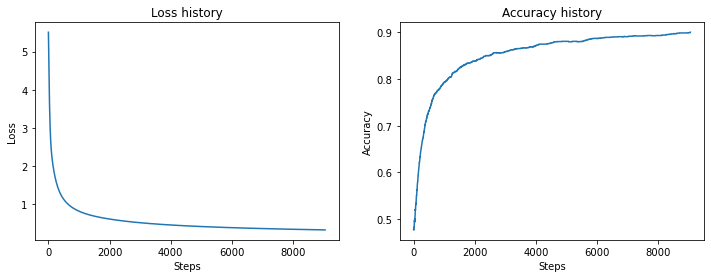

Training model for number 4
total step : 1 
error : 3.451412, accuarcy : 0.379190
total step : 2 
error : 3.431548, accuarcy : 0.381691
total step : 3 
error : 3.412057, accuarcy : 0.383192
total step : 4 
error : 3.392927, accuarcy : 0.383692
total step : 5 
error : 3.374145, accuarcy : 0.384692
total step : 6 
error : 3.355701, accuarcy : 0.387194
total step : 7 
error : 3.337582, accuarcy : 0.387694
total step : 8 
error : 3.319779, accuarcy : 0.390695
total step : 9 
error : 3.302281, accuarcy : 0.391696
total step : 10 
error : 3.285077, accuarcy : 0.392696
total step : 11 
error : 3.268158, accuarcy : 0.391196
total step : 12 
error : 3.251514, accuarcy : 0.393697
total step : 13 
error : 3.235136, accuarcy : 0.396198
total step : 14 
error : 3.219015, accuarcy : 0.397199
total step : 15 
error : 3.203142, accuarcy : 0.399700
total step : 16 
error : 3.187511, accuarcy : 0.400700
total step : 17 
error : 3.172111, accuarcy : 0.402701
total step : 18 
error : 3.156936, accuarcy : 

total step : 165 
error : 1.882075, accuarcy : 0.552776
total step : 166 
error : 1.876602, accuarcy : 0.553277
total step : 167 
error : 1.871156, accuarcy : 0.554277
total step : 168 
error : 1.865738, accuarcy : 0.556278
total step : 169 
error : 1.860346, accuarcy : 0.559280
total step : 170 
error : 1.854981, accuarcy : 0.560280
total step : 171 
error : 1.849642, accuarcy : 0.560780
total step : 172 
error : 1.844330, accuarcy : 0.561281
total step : 173 
error : 1.839044, accuarcy : 0.561781
total step : 174 
error : 1.833784, accuarcy : 0.561781
total step : 175 
error : 1.828550, accuarcy : 0.562781
total step : 176 
error : 1.823341, accuarcy : 0.562781
total step : 177 
error : 1.818159, accuarcy : 0.563282
total step : 178 
error : 1.813001, accuarcy : 0.564782
total step : 179 
error : 1.807869, accuarcy : 0.565783
total step : 180 
error : 1.802762, accuarcy : 0.566783
total step : 181 
error : 1.797679, accuarcy : 0.567284
total step : 182 
error : 1.792622, accuarcy : 0

total step : 352 
error : 1.192580, accuarcy : 0.668334
total step : 353 
error : 1.190173, accuarcy : 0.669335
total step : 354 
error : 1.187776, accuarcy : 0.668834
total step : 355 
error : 1.185389, accuarcy : 0.669335
total step : 356 
error : 1.183011, accuarcy : 0.669835
total step : 357 
error : 1.180643, accuarcy : 0.670835
total step : 358 
error : 1.178284, accuarcy : 0.671336
total step : 359 
error : 1.175935, accuarcy : 0.671836
total step : 360 
error : 1.173595, accuarcy : 0.672336
total step : 361 
error : 1.171265, accuarcy : 0.671836
total step : 362 
error : 1.168945, accuarcy : 0.672336
total step : 363 
error : 1.166633, accuarcy : 0.673337
total step : 364 
error : 1.164331, accuarcy : 0.674337
total step : 365 
error : 1.162039, accuarcy : 0.674337
total step : 366 
error : 1.159755, accuarcy : 0.674837
total step : 367 
error : 1.157481, accuarcy : 0.675338
total step : 368 
error : 1.155216, accuarcy : 0.675338
total step : 369 
error : 1.152960, accuarcy : 0

total step : 520 
error : 0.894782, accuarcy : 0.742371
total step : 521 
error : 0.893500, accuarcy : 0.742871
total step : 522 
error : 0.892222, accuarcy : 0.743872
total step : 523 
error : 0.890949, accuarcy : 0.743872
total step : 524 
error : 0.889680, accuarcy : 0.743872
total step : 525 
error : 0.888415, accuarcy : 0.743872
total step : 526 
error : 0.887155, accuarcy : 0.743372
total step : 527 
error : 0.885899, accuarcy : 0.744372
total step : 528 
error : 0.884647, accuarcy : 0.744372
total step : 529 
error : 0.883399, accuarcy : 0.744872
total step : 530 
error : 0.882156, accuarcy : 0.744872
total step : 531 
error : 0.880917, accuarcy : 0.745873
total step : 532 
error : 0.879682, accuarcy : 0.746373
total step : 533 
error : 0.878451, accuarcy : 0.746873
total step : 534 
error : 0.877224, accuarcy : 0.747374
total step : 535 
error : 0.876001, accuarcy : 0.747874
total step : 536 
error : 0.874782, accuarcy : 0.748374
total step : 537 
error : 0.873568, accuarcy : 0

total step : 685 
error : 0.729731, accuarcy : 0.782391
total step : 686 
error : 0.728953, accuarcy : 0.782891
total step : 687 
error : 0.728177, accuarcy : 0.783392
total step : 688 
error : 0.727404, accuarcy : 0.783392
total step : 689 
error : 0.726632, accuarcy : 0.783392
total step : 690 
error : 0.725863, accuarcy : 0.783392
total step : 691 
error : 0.725096, accuarcy : 0.783392
total step : 692 
error : 0.724330, accuarcy : 0.783892
total step : 693 
error : 0.723567, accuarcy : 0.783892
total step : 694 
error : 0.722806, accuarcy : 0.783892
total step : 695 
error : 0.722047, accuarcy : 0.783892
total step : 696 
error : 0.721289, accuarcy : 0.784392
total step : 697 
error : 0.720534, accuarcy : 0.784392
total step : 698 
error : 0.719781, accuarcy : 0.784392
total step : 699 
error : 0.719030, accuarcy : 0.784392
total step : 700 
error : 0.718281, accuarcy : 0.784392
total step : 701 
error : 0.717533, accuarcy : 0.784392
total step : 702 
error : 0.716788, accuarcy : 0

total step : 864 
error : 0.617578, accuarcy : 0.812906
total step : 865 
error : 0.617076, accuarcy : 0.812906
total step : 866 
error : 0.616575, accuarcy : 0.813407
total step : 867 
error : 0.616075, accuarcy : 0.814407
total step : 868 
error : 0.615576, accuarcy : 0.813907
total step : 869 
error : 0.615078, accuarcy : 0.813907
total step : 870 
error : 0.614581, accuarcy : 0.813907
total step : 871 
error : 0.614085, accuarcy : 0.813907
total step : 872 
error : 0.613591, accuarcy : 0.814407
total step : 873 
error : 0.613097, accuarcy : 0.814407
total step : 874 
error : 0.612605, accuarcy : 0.814407
total step : 875 
error : 0.612114, accuarcy : 0.814907
total step : 876 
error : 0.611623, accuarcy : 0.814907
total step : 877 
error : 0.611134, accuarcy : 0.814907
total step : 878 
error : 0.610646, accuarcy : 0.814907
total step : 879 
error : 0.610159, accuarcy : 0.814907
total step : 880 
error : 0.609673, accuarcy : 0.814907
total step : 881 
error : 0.609188, accuarcy : 0

total step : 1028 
error : 0.547940, accuarcy : 0.833417
total step : 1029 
error : 0.547582, accuarcy : 0.833917
total step : 1030 
error : 0.547225, accuarcy : 0.833917
total step : 1031 
error : 0.546869, accuarcy : 0.834417
total step : 1032 
error : 0.546513, accuarcy : 0.834417
total step : 1033 
error : 0.546158, accuarcy : 0.834417
total step : 1034 
error : 0.545804, accuarcy : 0.834917
total step : 1035 
error : 0.545450, accuarcy : 0.834917
total step : 1036 
error : 0.545097, accuarcy : 0.834917
total step : 1037 
error : 0.544745, accuarcy : 0.834917
total step : 1038 
error : 0.544393, accuarcy : 0.834917
total step : 1039 
error : 0.544042, accuarcy : 0.834917
total step : 1040 
error : 0.543692, accuarcy : 0.834917
total step : 1041 
error : 0.543342, accuarcy : 0.834917
total step : 1042 
error : 0.542993, accuarcy : 0.834917
total step : 1043 
error : 0.542645, accuarcy : 0.834917
total step : 1044 
error : 0.542297, accuarcy : 0.834917
total step : 1045 
error : 0.54

total step : 1193 
error : 0.496947, accuarcy : 0.843922
total step : 1194 
error : 0.496681, accuarcy : 0.843922
total step : 1195 
error : 0.496415, accuarcy : 0.843922
total step : 1196 
error : 0.496149, accuarcy : 0.843922
total step : 1197 
error : 0.495884, accuarcy : 0.843922
total step : 1198 
error : 0.495620, accuarcy : 0.843922
total step : 1199 
error : 0.495355, accuarcy : 0.843922
total step : 1200 
error : 0.495092, accuarcy : 0.843922
total step : 1201 
error : 0.494828, accuarcy : 0.843922
total step : 1202 
error : 0.494565, accuarcy : 0.844422
total step : 1203 
error : 0.494303, accuarcy : 0.844422
total step : 1204 
error : 0.494041, accuarcy : 0.844422
total step : 1205 
error : 0.493780, accuarcy : 0.844422
total step : 1206 
error : 0.493518, accuarcy : 0.844422
total step : 1207 
error : 0.493258, accuarcy : 0.844422
total step : 1208 
error : 0.492997, accuarcy : 0.844922
total step : 1209 
error : 0.492738, accuarcy : 0.844922
total step : 1210 
error : 0.49

total step : 1375 
error : 0.454826, accuarcy : 0.857429
total step : 1376 
error : 0.454625, accuarcy : 0.857429
total step : 1377 
error : 0.454424, accuarcy : 0.857429
total step : 1378 
error : 0.454224, accuarcy : 0.857429
total step : 1379 
error : 0.454024, accuarcy : 0.857429
total step : 1380 
error : 0.453824, accuarcy : 0.857429
total step : 1381 
error : 0.453625, accuarcy : 0.857429
total step : 1382 
error : 0.453426, accuarcy : 0.857429
total step : 1383 
error : 0.453227, accuarcy : 0.857429
total step : 1384 
error : 0.453029, accuarcy : 0.857429
total step : 1385 
error : 0.452830, accuarcy : 0.857429
total step : 1386 
error : 0.452632, accuarcy : 0.857429
total step : 1387 
error : 0.452435, accuarcy : 0.857429
total step : 1388 
error : 0.452237, accuarcy : 0.857429
total step : 1389 
error : 0.452040, accuarcy : 0.857429
total step : 1390 
error : 0.451843, accuarcy : 0.857429
total step : 1391 
error : 0.451647, accuarcy : 0.857429
total step : 1392 
error : 0.45

total step : 1575 
error : 0.419638, accuarcy : 0.868934
total step : 1576 
error : 0.419484, accuarcy : 0.868934
total step : 1577 
error : 0.419330, accuarcy : 0.868934
total step : 1578 
error : 0.419176, accuarcy : 0.868934
total step : 1579 
error : 0.419022, accuarcy : 0.868934
total step : 1580 
error : 0.418869, accuarcy : 0.868934
total step : 1581 
error : 0.418715, accuarcy : 0.868934
total step : 1582 
error : 0.418562, accuarcy : 0.868934
total step : 1583 
error : 0.418409, accuarcy : 0.868934
total step : 1584 
error : 0.418256, accuarcy : 0.868934
total step : 1585 
error : 0.418104, accuarcy : 0.868934
total step : 1586 
error : 0.417951, accuarcy : 0.868934
total step : 1587 
error : 0.417799, accuarcy : 0.868934
total step : 1588 
error : 0.417647, accuarcy : 0.868934
total step : 1589 
error : 0.417495, accuarcy : 0.869935
total step : 1590 
error : 0.417344, accuarcy : 0.869935
total step : 1591 
error : 0.417192, accuarcy : 0.870435
total step : 1592 
error : 0.41

total step : 1788 
error : 0.390461, accuarcy : 0.879940
total step : 1789 
error : 0.390339, accuarcy : 0.879940
total step : 1790 
error : 0.390218, accuarcy : 0.879940
total step : 1791 
error : 0.390096, accuarcy : 0.880440
total step : 1792 
error : 0.389975, accuarcy : 0.880440
total step : 1793 
error : 0.389853, accuarcy : 0.880940
total step : 1794 
error : 0.389732, accuarcy : 0.880940
total step : 1795 
error : 0.389611, accuarcy : 0.880940
total step : 1796 
error : 0.389490, accuarcy : 0.880940
total step : 1797 
error : 0.389370, accuarcy : 0.880940
total step : 1798 
error : 0.389249, accuarcy : 0.880940
total step : 1799 
error : 0.389128, accuarcy : 0.880940
total step : 1800 
error : 0.389008, accuarcy : 0.880940
total step : 1801 
error : 0.388888, accuarcy : 0.880940
total step : 1802 
error : 0.388767, accuarcy : 0.880940
total step : 1803 
error : 0.388647, accuarcy : 0.880940
total step : 1804 
error : 0.388528, accuarcy : 0.880940
total step : 1805 
error : 0.38

total step : 1997 
error : 0.367432, accuarcy : 0.885943
total step : 1998 
error : 0.367332, accuarcy : 0.885943
total step : 1999 
error : 0.367232, accuarcy : 0.885943
total step : 2000 
error : 0.367133, accuarcy : 0.885943
total step : 2001 
error : 0.367033, accuarcy : 0.885943
total step : 2002 
error : 0.366934, accuarcy : 0.885943
total step : 2003 
error : 0.366835, accuarcy : 0.885943
total step : 2004 
error : 0.366736, accuarcy : 0.885943
total step : 2005 
error : 0.366636, accuarcy : 0.885943
total step : 2006 
error : 0.366537, accuarcy : 0.885943
total step : 2007 
error : 0.366438, accuarcy : 0.885943
total step : 2008 
error : 0.366340, accuarcy : 0.885943
total step : 2009 
error : 0.366241, accuarcy : 0.885943
total step : 2010 
error : 0.366142, accuarcy : 0.885943
total step : 2011 
error : 0.366044, accuarcy : 0.885943
total step : 2012 
error : 0.365945, accuarcy : 0.885943
total step : 2013 
error : 0.365847, accuarcy : 0.885943
total step : 2014 
error : 0.36

total step : 2211 
error : 0.347938, accuarcy : 0.892946
total step : 2212 
error : 0.347855, accuarcy : 0.892946
total step : 2213 
error : 0.347772, accuarcy : 0.892946
total step : 2214 
error : 0.347689, accuarcy : 0.892946
total step : 2215 
error : 0.347606, accuarcy : 0.892946
total step : 2216 
error : 0.347523, accuarcy : 0.892946
total step : 2217 
error : 0.347440, accuarcy : 0.892946
total step : 2218 
error : 0.347357, accuarcy : 0.892946
total step : 2219 
error : 0.347274, accuarcy : 0.892946
total step : 2220 
error : 0.347192, accuarcy : 0.892946
total step : 2221 
error : 0.347109, accuarcy : 0.892946
total step : 2222 
error : 0.347027, accuarcy : 0.892946
total step : 2223 
error : 0.346944, accuarcy : 0.892946
total step : 2224 
error : 0.346862, accuarcy : 0.892946
total step : 2225 
error : 0.346779, accuarcy : 0.892946
total step : 2226 
error : 0.346697, accuarcy : 0.892946
total step : 2227 
error : 0.346615, accuarcy : 0.892946
total step : 2228 
error : 0.34

total step : 2436 
error : 0.330761, accuarcy : 0.896948
total step : 2437 
error : 0.330691, accuarcy : 0.896948
total step : 2438 
error : 0.330621, accuarcy : 0.896948
total step : 2439 
error : 0.330551, accuarcy : 0.896948
total step : 2440 
error : 0.330481, accuarcy : 0.896948
total step : 2441 
error : 0.330411, accuarcy : 0.896948
total step : 2442 
error : 0.330341, accuarcy : 0.896948
total step : 2443 
error : 0.330272, accuarcy : 0.896948
total step : 2444 
error : 0.330202, accuarcy : 0.896948
total step : 2445 
error : 0.330132, accuarcy : 0.896948
total step : 2446 
error : 0.330063, accuarcy : 0.896948
total step : 2447 
error : 0.329993, accuarcy : 0.896948
total step : 2448 
error : 0.329924, accuarcy : 0.897449
total step : 2449 
error : 0.329854, accuarcy : 0.897449
total step : 2450 
error : 0.329785, accuarcy : 0.897449
total step : 2451 
error : 0.329716, accuarcy : 0.897449
total step : 2452 
error : 0.329646, accuarcy : 0.897449
total step : 2453 
error : 0.32

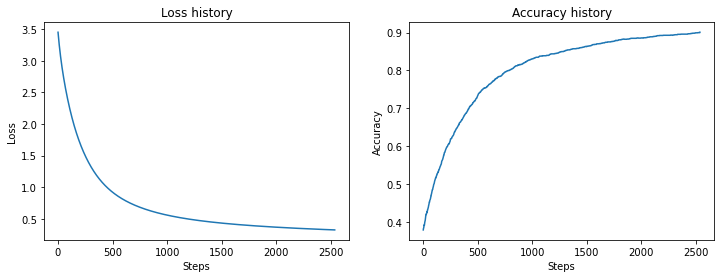

Training model for number 5
total step : 1 
error : 2.473858, accuarcy : 0.543772
total step : 2 
error : 2.468369, accuarcy : 0.543772
total step : 3 
error : 2.462923, accuarcy : 0.544772
total step : 4 
error : 2.457518, accuarcy : 0.544772
total step : 5 
error : 2.452155, accuarcy : 0.546273
total step : 6 
error : 2.446831, accuarcy : 0.546773
total step : 7 
error : 2.441546, accuarcy : 0.546273
total step : 8 
error : 2.436298, accuarcy : 0.546773
total step : 9 
error : 2.431088, accuarcy : 0.546773
total step : 10 
error : 2.425913, accuarcy : 0.546773
total step : 11 
error : 2.420774, accuarcy : 0.548274
total step : 12 
error : 2.415668, accuarcy : 0.547774
total step : 13 
error : 2.410597, accuarcy : 0.547274
total step : 14 
error : 2.405558, accuarcy : 0.548274
total step : 15 
error : 2.400551, accuarcy : 0.549275
total step : 16 
error : 2.395575, accuarcy : 0.549775
total step : 17 
error : 2.390629, accuarcy : 0.550275
total step : 18 
error : 2.385714, accuarcy : 

total step : 159 
error : 1.851604, accuarcy : 0.603302
total step : 160 
error : 1.848558, accuarcy : 0.603802
total step : 161 
error : 1.845520, accuarcy : 0.603802
total step : 162 
error : 1.842491, accuarcy : 0.604302
total step : 163 
error : 1.839470, accuarcy : 0.604802
total step : 164 
error : 1.836458, accuarcy : 0.604802
total step : 165 
error : 1.833454, accuarcy : 0.605803
total step : 166 
error : 1.830458, accuarcy : 0.606803
total step : 167 
error : 1.827470, accuarcy : 0.606803
total step : 168 
error : 1.824491, accuarcy : 0.606803
total step : 169 
error : 1.821520, accuarcy : 0.607804
total step : 170 
error : 1.818557, accuarcy : 0.607804
total step : 171 
error : 1.815603, accuarcy : 0.609305
total step : 172 
error : 1.812657, accuarcy : 0.609805
total step : 173 
error : 1.809719, accuarcy : 0.610305
total step : 174 
error : 1.806789, accuarcy : 0.610305
total step : 175 
error : 1.803867, accuarcy : 0.610305
total step : 176 
error : 1.800954, accuarcy : 0

total step : 340 
error : 1.421917, accuarcy : 0.659830
total step : 341 
error : 1.420132, accuarcy : 0.659830
total step : 342 
error : 1.418351, accuarcy : 0.659830
total step : 343 
error : 1.416576, accuarcy : 0.660330
total step : 344 
error : 1.414807, accuarcy : 0.659830
total step : 345 
error : 1.413043, accuarcy : 0.660330
total step : 346 
error : 1.411284, accuarcy : 0.660330
total step : 347 
error : 1.409530, accuarcy : 0.660330
total step : 348 
error : 1.407781, accuarcy : 0.660330
total step : 349 
error : 1.406038, accuarcy : 0.660330
total step : 350 
error : 1.404300, accuarcy : 0.660830
total step : 351 
error : 1.402568, accuarcy : 0.660830
total step : 352 
error : 1.400840, accuarcy : 0.661331
total step : 353 
error : 1.399118, accuarcy : 0.661831
total step : 354 
error : 1.397400, accuarcy : 0.661831
total step : 355 
error : 1.395688, accuarcy : 0.661831
total step : 356 
error : 1.393981, accuarcy : 0.661831
total step : 357 
error : 1.392279, accuarcy : 0

total step : 518 
error : 1.173242, accuarcy : 0.700350
total step : 519 
error : 1.172160, accuarcy : 0.700850
total step : 520 
error : 1.171082, accuarcy : 0.700850
total step : 521 
error : 1.170006, accuarcy : 0.701351
total step : 522 
error : 1.168932, accuarcy : 0.701351
total step : 523 
error : 1.167862, accuarcy : 0.701351
total step : 524 
error : 1.166794, accuarcy : 0.701851
total step : 525 
error : 1.165729, accuarcy : 0.702351
total step : 526 
error : 1.164667, accuarcy : 0.702351
total step : 527 
error : 1.163608, accuarcy : 0.702351
total step : 528 
error : 1.162551, accuarcy : 0.702851
total step : 529 
error : 1.161497, accuarcy : 0.702351
total step : 530 
error : 1.160446, accuarcy : 0.701851
total step : 531 
error : 1.159397, accuarcy : 0.701851
total step : 532 
error : 1.158351, accuarcy : 0.701851
total step : 533 
error : 1.157307, accuarcy : 0.701851
total step : 534 
error : 1.156267, accuarcy : 0.702351
total step : 535 
error : 1.155229, accuarcy : 0

total step : 710 
error : 1.006975, accuarcy : 0.737869
total step : 711 
error : 1.006283, accuarcy : 0.737869
total step : 712 
error : 1.005594, accuarcy : 0.737869
total step : 713 
error : 1.004905, accuarcy : 0.737869
total step : 714 
error : 1.004219, accuarcy : 0.738369
total step : 715 
error : 1.003533, accuarcy : 0.738369
total step : 716 
error : 1.002849, accuarcy : 0.738369
total step : 717 
error : 1.002166, accuarcy : 0.738869
total step : 718 
error : 1.001485, accuarcy : 0.738869
total step : 719 
error : 1.000805, accuarcy : 0.738869
total step : 720 
error : 1.000127, accuarcy : 0.739370
total step : 721 
error : 0.999450, accuarcy : 0.739870
total step : 722 
error : 0.998774, accuarcy : 0.739870
total step : 723 
error : 0.998100, accuarcy : 0.739870
total step : 724 
error : 0.997427, accuarcy : 0.740370
total step : 725 
error : 0.996756, accuarcy : 0.740870
total step : 726 
error : 0.996086, accuarcy : 0.740870
total step : 727 
error : 0.995417, accuarcy : 0

total step : 901 
error : 0.896682, accuarcy : 0.761381
total step : 902 
error : 0.896200, accuarcy : 0.761381
total step : 903 
error : 0.895718, accuarcy : 0.761381
total step : 904 
error : 0.895238, accuarcy : 0.761881
total step : 905 
error : 0.894758, accuarcy : 0.762881
total step : 906 
error : 0.894279, accuarcy : 0.762881
total step : 907 
error : 0.893801, accuarcy : 0.762881
total step : 908 
error : 0.893324, accuarcy : 0.762881
total step : 909 
error : 0.892847, accuarcy : 0.762881
total step : 910 
error : 0.892372, accuarcy : 0.762881
total step : 911 
error : 0.891897, accuarcy : 0.763382
total step : 912 
error : 0.891423, accuarcy : 0.763382
total step : 913 
error : 0.890950, accuarcy : 0.763382
total step : 914 
error : 0.890477, accuarcy : 0.763382
total step : 915 
error : 0.890005, accuarcy : 0.762881
total step : 916 
error : 0.889535, accuarcy : 0.762881
total step : 917 
error : 0.889064, accuarcy : 0.762881
total step : 918 
error : 0.888595, accuarcy : 0

total step : 1091 
error : 0.817654, accuarcy : 0.779390
total step : 1092 
error : 0.817295, accuarcy : 0.779390
total step : 1093 
error : 0.816936, accuarcy : 0.779390
total step : 1094 
error : 0.816578, accuarcy : 0.779390
total step : 1095 
error : 0.816221, accuarcy : 0.779390
total step : 1096 
error : 0.815864, accuarcy : 0.779390
total step : 1097 
error : 0.815508, accuarcy : 0.778889
total step : 1098 
error : 0.815152, accuarcy : 0.778889
total step : 1099 
error : 0.814797, accuarcy : 0.778889
total step : 1100 
error : 0.814442, accuarcy : 0.778889
total step : 1101 
error : 0.814087, accuarcy : 0.778889
total step : 1102 
error : 0.813733, accuarcy : 0.778889
total step : 1103 
error : 0.813380, accuarcy : 0.778889
total step : 1104 
error : 0.813027, accuarcy : 0.779390
total step : 1105 
error : 0.812675, accuarcy : 0.779390
total step : 1106 
error : 0.812323, accuarcy : 0.779890
total step : 1107 
error : 0.811971, accuarcy : 0.779890
total step : 1108 
error : 0.81

total step : 1292 
error : 0.754346, accuarcy : 0.790395
total step : 1293 
error : 0.754069, accuarcy : 0.790395
total step : 1294 
error : 0.753793, accuarcy : 0.790395
total step : 1295 
error : 0.753517, accuarcy : 0.790895
total step : 1296 
error : 0.753241, accuarcy : 0.790895
total step : 1297 
error : 0.752966, accuarcy : 0.790895
total step : 1298 
error : 0.752691, accuarcy : 0.791396
total step : 1299 
error : 0.752416, accuarcy : 0.791396
total step : 1300 
error : 0.752142, accuarcy : 0.791396
total step : 1301 
error : 0.751868, accuarcy : 0.791396
total step : 1302 
error : 0.751594, accuarcy : 0.791396
total step : 1303 
error : 0.751321, accuarcy : 0.791396
total step : 1304 
error : 0.751047, accuarcy : 0.791396
total step : 1305 
error : 0.750775, accuarcy : 0.791396
total step : 1306 
error : 0.750502, accuarcy : 0.791396
total step : 1307 
error : 0.750230, accuarcy : 0.791396
total step : 1308 
error : 0.749958, accuarcy : 0.791896
total step : 1309 
error : 0.74

total step : 1502 
error : 0.702544, accuarcy : 0.802401
total step : 1503 
error : 0.702323, accuarcy : 0.802401
total step : 1504 
error : 0.702103, accuarcy : 0.802401
total step : 1505 
error : 0.701884, accuarcy : 0.802401
total step : 1506 
error : 0.701664, accuarcy : 0.802401
total step : 1507 
error : 0.701445, accuarcy : 0.802401
total step : 1508 
error : 0.701226, accuarcy : 0.802401
total step : 1509 
error : 0.701007, accuarcy : 0.802401
total step : 1510 
error : 0.700788, accuarcy : 0.802401
total step : 1511 
error : 0.700570, accuarcy : 0.802401
total step : 1512 
error : 0.700351, accuarcy : 0.802401
total step : 1513 
error : 0.700133, accuarcy : 0.802401
total step : 1514 
error : 0.699915, accuarcy : 0.802401
total step : 1515 
error : 0.699698, accuarcy : 0.802401
total step : 1516 
error : 0.699480, accuarcy : 0.802401
total step : 1517 
error : 0.699263, accuarcy : 0.802401
total step : 1518 
error : 0.699046, accuarcy : 0.802401
total step : 1519 
error : 0.69

error : 0.661307, accuarcy : 0.809905
total step : 1709 
error : 0.661125, accuarcy : 0.809905
total step : 1710 
error : 0.660943, accuarcy : 0.809905
total step : 1711 
error : 0.660761, accuarcy : 0.809905
total step : 1712 
error : 0.660580, accuarcy : 0.809905
total step : 1713 
error : 0.660398, accuarcy : 0.809905
total step : 1714 
error : 0.660217, accuarcy : 0.809905
total step : 1715 
error : 0.660036, accuarcy : 0.809905
total step : 1716 
error : 0.659855, accuarcy : 0.809905
total step : 1717 
error : 0.659674, accuarcy : 0.809905
total step : 1718 
error : 0.659493, accuarcy : 0.809905
total step : 1719 
error : 0.659312, accuarcy : 0.810405
total step : 1720 
error : 0.659132, accuarcy : 0.809905
total step : 1721 
error : 0.658951, accuarcy : 0.809905
total step : 1722 
error : 0.658771, accuarcy : 0.809905
total step : 1723 
error : 0.658591, accuarcy : 0.809905
total step : 1724 
error : 0.658411, accuarcy : 0.809905
total step : 1725 
error : 0.658232, accuarcy : 0.

total step : 1926 
error : 0.624897, accuarcy : 0.814907
total step : 1927 
error : 0.624744, accuarcy : 0.814907
total step : 1928 
error : 0.624591, accuarcy : 0.814907
total step : 1929 
error : 0.624438, accuarcy : 0.814907
total step : 1930 
error : 0.624285, accuarcy : 0.814907
total step : 1931 
error : 0.624132, accuarcy : 0.814907
total step : 1932 
error : 0.623979, accuarcy : 0.814907
total step : 1933 
error : 0.623827, accuarcy : 0.814907
total step : 1934 
error : 0.623674, accuarcy : 0.814907
total step : 1935 
error : 0.623522, accuarcy : 0.814907
total step : 1936 
error : 0.623369, accuarcy : 0.814907
total step : 1937 
error : 0.623217, accuarcy : 0.814907
total step : 1938 
error : 0.623065, accuarcy : 0.814907
total step : 1939 
error : 0.622913, accuarcy : 0.814907
total step : 1940 
error : 0.622761, accuarcy : 0.814407
total step : 1941 
error : 0.622610, accuarcy : 0.814907
total step : 1942 
error : 0.622458, accuarcy : 0.814907
total step : 1943 
error : 0.62

total step : 2136 
error : 0.594979, accuarcy : 0.824912
total step : 2137 
error : 0.594847, accuarcy : 0.825413
total step : 2138 
error : 0.594714, accuarcy : 0.825413
total step : 2139 
error : 0.594582, accuarcy : 0.825413
total step : 2140 
error : 0.594450, accuarcy : 0.825413
total step : 2141 
error : 0.594318, accuarcy : 0.825413
total step : 2142 
error : 0.594186, accuarcy : 0.825413
total step : 2143 
error : 0.594054, accuarcy : 0.825413
total step : 2144 
error : 0.593922, accuarcy : 0.825413
total step : 2145 
error : 0.593790, accuarcy : 0.825413
total step : 2146 
error : 0.593658, accuarcy : 0.825913
total step : 2147 
error : 0.593527, accuarcy : 0.825913
total step : 2148 
error : 0.593395, accuarcy : 0.825913
total step : 2149 
error : 0.593264, accuarcy : 0.825913
total step : 2150 
error : 0.593132, accuarcy : 0.825913
total step : 2151 
error : 0.593001, accuarcy : 0.825913
total step : 2152 
error : 0.592870, accuarcy : 0.825913
total step : 2153 
error : 0.59

total step : 2332 
error : 0.570563, accuarcy : 0.830915
total step : 2333 
error : 0.570446, accuarcy : 0.830915
total step : 2334 
error : 0.570329, accuarcy : 0.830915
total step : 2335 
error : 0.570212, accuarcy : 0.830915
total step : 2336 
error : 0.570095, accuarcy : 0.830915
total step : 2337 
error : 0.569978, accuarcy : 0.830915
total step : 2338 
error : 0.569861, accuarcy : 0.831416
total step : 2339 
error : 0.569744, accuarcy : 0.831416
total step : 2340 
error : 0.569628, accuarcy : 0.831416
total step : 2341 
error : 0.569511, accuarcy : 0.831416
total step : 2342 
error : 0.569394, accuarcy : 0.831416
total step : 2343 
error : 0.569278, accuarcy : 0.831416
total step : 2344 
error : 0.569162, accuarcy : 0.831416
total step : 2345 
error : 0.569045, accuarcy : 0.831416
total step : 2346 
error : 0.568929, accuarcy : 0.831416
total step : 2347 
error : 0.568813, accuarcy : 0.831416
total step : 2348 
error : 0.568697, accuarcy : 0.831416
total step : 2349 
error : 0.56

total step : 2542 
error : 0.547397, accuarcy : 0.833917
total step : 2543 
error : 0.547293, accuarcy : 0.833917
total step : 2544 
error : 0.547189, accuarcy : 0.833917
total step : 2545 
error : 0.547085, accuarcy : 0.833917
total step : 2546 
error : 0.546982, accuarcy : 0.833917
total step : 2547 
error : 0.546878, accuarcy : 0.833917
total step : 2548 
error : 0.546774, accuarcy : 0.833917
total step : 2549 
error : 0.546671, accuarcy : 0.833917
total step : 2550 
error : 0.546567, accuarcy : 0.833917
total step : 2551 
error : 0.546464, accuarcy : 0.833917
total step : 2552 
error : 0.546361, accuarcy : 0.833917
total step : 2553 
error : 0.546257, accuarcy : 0.833917
total step : 2554 
error : 0.546154, accuarcy : 0.833917
total step : 2555 
error : 0.546051, accuarcy : 0.834417
total step : 2556 
error : 0.545948, accuarcy : 0.834417
total step : 2557 
error : 0.545845, accuarcy : 0.834417
total step : 2558 
error : 0.545742, accuarcy : 0.834417
total step : 2559 
error : 0.54

total step : 2742 
error : 0.527693, accuarcy : 0.837919
total step : 2743 
error : 0.527599, accuarcy : 0.837919
total step : 2744 
error : 0.527506, accuarcy : 0.837919
total step : 2745 
error : 0.527413, accuarcy : 0.837919
total step : 2746 
error : 0.527319, accuarcy : 0.837919
total step : 2747 
error : 0.527226, accuarcy : 0.837919
total step : 2748 
error : 0.527133, accuarcy : 0.837919
total step : 2749 
error : 0.527040, accuarcy : 0.837919
total step : 2750 
error : 0.526947, accuarcy : 0.837919
total step : 2751 
error : 0.526854, accuarcy : 0.837919
total step : 2752 
error : 0.526761, accuarcy : 0.837919
total step : 2753 
error : 0.526668, accuarcy : 0.837919
total step : 2754 
error : 0.526575, accuarcy : 0.837919
total step : 2755 
error : 0.526482, accuarcy : 0.837919
total step : 2756 
error : 0.526389, accuarcy : 0.837919
total step : 2757 
error : 0.526296, accuarcy : 0.837919
total step : 2758 
error : 0.526204, accuarcy : 0.837919
total step : 2759 
error : 0.52

total step : 2954 
error : 0.508896, accuarcy : 0.844422
total step : 2955 
error : 0.508811, accuarcy : 0.844422
total step : 2956 
error : 0.508727, accuarcy : 0.844422
total step : 2957 
error : 0.508643, accuarcy : 0.844422
total step : 2958 
error : 0.508559, accuarcy : 0.844422
total step : 2959 
error : 0.508475, accuarcy : 0.844422
total step : 2960 
error : 0.508391, accuarcy : 0.844422
total step : 2961 
error : 0.508308, accuarcy : 0.844422
total step : 2962 
error : 0.508224, accuarcy : 0.844422
total step : 2963 
error : 0.508140, accuarcy : 0.844422
total step : 2964 
error : 0.508056, accuarcy : 0.844422
total step : 2965 
error : 0.507972, accuarcy : 0.844422
total step : 2966 
error : 0.507889, accuarcy : 0.844422
total step : 2967 
error : 0.507805, accuarcy : 0.844422
total step : 2968 
error : 0.507722, accuarcy : 0.844422
total step : 2969 
error : 0.507638, accuarcy : 0.844422
total step : 2970 
error : 0.507554, accuarcy : 0.844422
total step : 2971 
error : 0.50

total step : 3144 
error : 0.493604, accuarcy : 0.848924
total step : 3145 
error : 0.493527, accuarcy : 0.848924
total step : 3146 
error : 0.493451, accuarcy : 0.848924
total step : 3147 
error : 0.493374, accuarcy : 0.848924
total step : 3148 
error : 0.493297, accuarcy : 0.848924
total step : 3149 
error : 0.493220, accuarcy : 0.848924
total step : 3150 
error : 0.493143, accuarcy : 0.848924
total step : 3151 
error : 0.493066, accuarcy : 0.848924
total step : 3152 
error : 0.492990, accuarcy : 0.848924
total step : 3153 
error : 0.492913, accuarcy : 0.848924
total step : 3154 
error : 0.492836, accuarcy : 0.848924
total step : 3155 
error : 0.492760, accuarcy : 0.848924
total step : 3156 
error : 0.492683, accuarcy : 0.848924
total step : 3157 
error : 0.492607, accuarcy : 0.848924
total step : 3158 
error : 0.492530, accuarcy : 0.848924
total step : 3159 
error : 0.492454, accuarcy : 0.848924
total step : 3160 
error : 0.492377, accuarcy : 0.848924
total step : 3161 
error : 0.49

total step : 3354 
error : 0.478178, accuarcy : 0.851926
total step : 3355 
error : 0.478108, accuarcy : 0.851926
total step : 3356 
error : 0.478038, accuarcy : 0.851926
total step : 3357 
error : 0.477968, accuarcy : 0.852426
total step : 3358 
error : 0.477898, accuarcy : 0.852426
total step : 3359 
error : 0.477828, accuarcy : 0.852426
total step : 3360 
error : 0.477758, accuarcy : 0.852426
total step : 3361 
error : 0.477688, accuarcy : 0.852426
total step : 3362 
error : 0.477618, accuarcy : 0.852426
total step : 3363 
error : 0.477549, accuarcy : 0.852426
total step : 3364 
error : 0.477479, accuarcy : 0.852426
total step : 3365 
error : 0.477409, accuarcy : 0.852426
total step : 3366 
error : 0.477339, accuarcy : 0.852426
total step : 3367 
error : 0.477270, accuarcy : 0.852426
total step : 3368 
error : 0.477200, accuarcy : 0.852426
total step : 3369 
error : 0.477130, accuarcy : 0.852426
total step : 3370 
error : 0.477061, accuarcy : 0.852426
total step : 3371 
error : 0.47

total step : 3580 
error : 0.463083, accuarcy : 0.854927
total step : 3581 
error : 0.463020, accuarcy : 0.855428
total step : 3582 
error : 0.462956, accuarcy : 0.855428
total step : 3583 
error : 0.462892, accuarcy : 0.855428
total step : 3584 
error : 0.462829, accuarcy : 0.855428
total step : 3585 
error : 0.462765, accuarcy : 0.855428
total step : 3586 
error : 0.462702, accuarcy : 0.855428
total step : 3587 
error : 0.462638, accuarcy : 0.855428
total step : 3588 
error : 0.462575, accuarcy : 0.855428
total step : 3589 
error : 0.462512, accuarcy : 0.855428
total step : 3590 
error : 0.462448, accuarcy : 0.855428
total step : 3591 
error : 0.462385, accuarcy : 0.855428
total step : 3592 
error : 0.462322, accuarcy : 0.855428
total step : 3593 
error : 0.462258, accuarcy : 0.855428
total step : 3594 
error : 0.462195, accuarcy : 0.855428
total step : 3595 
error : 0.462132, accuarcy : 0.855428
total step : 3596 
error : 0.462068, accuarcy : 0.855428
total step : 3597 
error : 0.46

total step : 3807 
error : 0.449295, accuarcy : 0.856928
total step : 3808 
error : 0.449237, accuarcy : 0.856928
total step : 3809 
error : 0.449179, accuarcy : 0.856928
total step : 3810 
error : 0.449121, accuarcy : 0.856928
total step : 3811 
error : 0.449063, accuarcy : 0.856928
total step : 3812 
error : 0.449006, accuarcy : 0.856928
total step : 3813 
error : 0.448948, accuarcy : 0.856928
total step : 3814 
error : 0.448890, accuarcy : 0.856928
total step : 3815 
error : 0.448832, accuarcy : 0.856928
total step : 3816 
error : 0.448774, accuarcy : 0.856928
total step : 3817 
error : 0.448717, accuarcy : 0.856928
total step : 3818 
error : 0.448659, accuarcy : 0.856928
total step : 3819 
error : 0.448601, accuarcy : 0.856928
total step : 3820 
error : 0.448544, accuarcy : 0.856928
total step : 3821 
error : 0.448486, accuarcy : 0.856928
total step : 3822 
error : 0.448428, accuarcy : 0.856928
total step : 3823 
error : 0.448371, accuarcy : 0.856928
total step : 3824 
error : 0.44

total step : 4033 
error : 0.436769, accuarcy : 0.858929
total step : 4034 
error : 0.436716, accuarcy : 0.858929
total step : 4035 
error : 0.436663, accuarcy : 0.858929
total step : 4036 
error : 0.436610, accuarcy : 0.858929
total step : 4037 
error : 0.436557, accuarcy : 0.858929
total step : 4038 
error : 0.436504, accuarcy : 0.858929
total step : 4039 
error : 0.436452, accuarcy : 0.858929
total step : 4040 
error : 0.436399, accuarcy : 0.858929
total step : 4041 
error : 0.436346, accuarcy : 0.858929
total step : 4042 
error : 0.436293, accuarcy : 0.858929
total step : 4043 
error : 0.436240, accuarcy : 0.858929
total step : 4044 
error : 0.436188, accuarcy : 0.858929
total step : 4045 
error : 0.436135, accuarcy : 0.858929
total step : 4046 
error : 0.436082, accuarcy : 0.858929
total step : 4047 
error : 0.436029, accuarcy : 0.858929
total step : 4048 
error : 0.435977, accuarcy : 0.858929
total step : 4049 
error : 0.435924, accuarcy : 0.858929
total step : 4050 
error : 0.43

total step : 4259 
error : 0.425304, accuarcy : 0.862431
total step : 4260 
error : 0.425255, accuarcy : 0.862431
total step : 4261 
error : 0.425207, accuarcy : 0.862431
total step : 4262 
error : 0.425158, accuarcy : 0.862431
total step : 4263 
error : 0.425110, accuarcy : 0.862931
total step : 4264 
error : 0.425061, accuarcy : 0.862931
total step : 4265 
error : 0.425013, accuarcy : 0.862931
total step : 4266 
error : 0.424964, accuarcy : 0.862931
total step : 4267 
error : 0.424916, accuarcy : 0.862931
total step : 4268 
error : 0.424867, accuarcy : 0.862931
total step : 4269 
error : 0.424819, accuarcy : 0.862931
total step : 4270 
error : 0.424771, accuarcy : 0.862931
total step : 4271 
error : 0.424722, accuarcy : 0.862931
total step : 4272 
error : 0.424674, accuarcy : 0.862931
total step : 4273 
error : 0.424626, accuarcy : 0.862931
total step : 4274 
error : 0.424577, accuarcy : 0.862931
total step : 4275 
error : 0.424529, accuarcy : 0.862931
total step : 4276 
error : 0.42

total step : 4483 
error : 0.414870, accuarcy : 0.863932
total step : 4484 
error : 0.414826, accuarcy : 0.863932
total step : 4485 
error : 0.414781, accuarcy : 0.863932
total step : 4486 
error : 0.414736, accuarcy : 0.863932
total step : 4487 
error : 0.414692, accuarcy : 0.863932
total step : 4488 
error : 0.414647, accuarcy : 0.863932
total step : 4489 
error : 0.414603, accuarcy : 0.863932
total step : 4490 
error : 0.414558, accuarcy : 0.863932
total step : 4491 
error : 0.414514, accuarcy : 0.863932
total step : 4492 
error : 0.414469, accuarcy : 0.863932
total step : 4493 
error : 0.414425, accuarcy : 0.863932
total step : 4494 
error : 0.414380, accuarcy : 0.863932
total step : 4495 
error : 0.414336, accuarcy : 0.864432
total step : 4496 
error : 0.414291, accuarcy : 0.864432
total step : 4497 
error : 0.414247, accuarcy : 0.864432
total step : 4498 
error : 0.414202, accuarcy : 0.864432
total step : 4499 
error : 0.414158, accuarcy : 0.864432
total step : 4500 
error : 0.41

total step : 4689 
error : 0.406007, accuarcy : 0.864932
total step : 4690 
error : 0.405966, accuarcy : 0.864932
total step : 4691 
error : 0.405924, accuarcy : 0.864932
total step : 4692 
error : 0.405883, accuarcy : 0.864932
total step : 4693 
error : 0.405842, accuarcy : 0.864932
total step : 4694 
error : 0.405800, accuarcy : 0.864932
total step : 4695 
error : 0.405759, accuarcy : 0.864932
total step : 4696 
error : 0.405718, accuarcy : 0.864932
total step : 4697 
error : 0.405676, accuarcy : 0.864932
total step : 4698 
error : 0.405635, accuarcy : 0.864932
total step : 4699 
error : 0.405594, accuarcy : 0.864932
total step : 4700 
error : 0.405552, accuarcy : 0.864932
total step : 4701 
error : 0.405511, accuarcy : 0.864932
total step : 4702 
error : 0.405470, accuarcy : 0.864432
total step : 4703 
error : 0.405429, accuarcy : 0.864432
total step : 4704 
error : 0.405387, accuarcy : 0.864432
total step : 4705 
error : 0.405346, accuarcy : 0.864432
total step : 4706 
error : 0.40

total step : 4886 
error : 0.398122, accuarcy : 0.865433
total step : 4887 
error : 0.398084, accuarcy : 0.865433
total step : 4888 
error : 0.398045, accuarcy : 0.865433
total step : 4889 
error : 0.398007, accuarcy : 0.865433
total step : 4890 
error : 0.397968, accuarcy : 0.865433
total step : 4891 
error : 0.397929, accuarcy : 0.865433
total step : 4892 
error : 0.397891, accuarcy : 0.865433
total step : 4893 
error : 0.397852, accuarcy : 0.865433
total step : 4894 
error : 0.397814, accuarcy : 0.865433
total step : 4895 
error : 0.397775, accuarcy : 0.865433
total step : 4896 
error : 0.397737, accuarcy : 0.865433
total step : 4897 
error : 0.397698, accuarcy : 0.865433
total step : 4898 
error : 0.397660, accuarcy : 0.865433
total step : 4899 
error : 0.397621, accuarcy : 0.865433
total step : 4900 
error : 0.397583, accuarcy : 0.865433
total step : 4901 
error : 0.397544, accuarcy : 0.865933
total step : 4902 
error : 0.397506, accuarcy : 0.865933
total step : 4903 
error : 0.39

total step : 5085 
error : 0.390689, accuarcy : 0.868434
total step : 5086 
error : 0.390653, accuarcy : 0.868434
total step : 5087 
error : 0.390617, accuarcy : 0.868434
total step : 5088 
error : 0.390581, accuarcy : 0.868434
total step : 5089 
error : 0.390545, accuarcy : 0.868434
total step : 5090 
error : 0.390509, accuarcy : 0.868434
total step : 5091 
error : 0.390473, accuarcy : 0.868434
total step : 5092 
error : 0.390437, accuarcy : 0.868434
total step : 5093 
error : 0.390401, accuarcy : 0.868434
total step : 5094 
error : 0.390365, accuarcy : 0.868434
total step : 5095 
error : 0.390329, accuarcy : 0.868434
total step : 5096 
error : 0.390293, accuarcy : 0.868434
total step : 5097 
error : 0.390257, accuarcy : 0.868434
total step : 5098 
error : 0.390221, accuarcy : 0.868434
total step : 5099 
error : 0.390185, accuarcy : 0.868434
total step : 5100 
error : 0.390149, accuarcy : 0.868434
total step : 5101 
error : 0.390113, accuarcy : 0.868434
total step : 5102 
error : 0.39

total step : 5303 
error : 0.383100, accuarcy : 0.871436
total step : 5304 
error : 0.383067, accuarcy : 0.871436
total step : 5305 
error : 0.383033, accuarcy : 0.871436
total step : 5306 
error : 0.383000, accuarcy : 0.871436
total step : 5307 
error : 0.382966, accuarcy : 0.871436
total step : 5308 
error : 0.382933, accuarcy : 0.871436
total step : 5309 
error : 0.382899, accuarcy : 0.871436
total step : 5310 
error : 0.382866, accuarcy : 0.871436
total step : 5311 
error : 0.382832, accuarcy : 0.871436
total step : 5312 
error : 0.382799, accuarcy : 0.871436
total step : 5313 
error : 0.382765, accuarcy : 0.871936
total step : 5314 
error : 0.382732, accuarcy : 0.871936
total step : 5315 
error : 0.382698, accuarcy : 0.871936
total step : 5316 
error : 0.382665, accuarcy : 0.871936
total step : 5317 
error : 0.382632, accuarcy : 0.871936
total step : 5318 
error : 0.382598, accuarcy : 0.871936
total step : 5319 
error : 0.382565, accuarcy : 0.871936
total step : 5320 
error : 0.38

total step : 5512 
error : 0.376317, accuarcy : 0.873937
total step : 5513 
error : 0.376286, accuarcy : 0.873937
total step : 5514 
error : 0.376255, accuarcy : 0.873937
total step : 5515 
error : 0.376223, accuarcy : 0.873937
total step : 5516 
error : 0.376192, accuarcy : 0.873937
total step : 5517 
error : 0.376161, accuarcy : 0.874437
total step : 5518 
error : 0.376129, accuarcy : 0.874437
total step : 5519 
error : 0.376098, accuarcy : 0.874437
total step : 5520 
error : 0.376067, accuarcy : 0.874437
total step : 5521 
error : 0.376035, accuarcy : 0.874437
total step : 5522 
error : 0.376004, accuarcy : 0.874437
total step : 5523 
error : 0.375973, accuarcy : 0.874437
total step : 5524 
error : 0.375942, accuarcy : 0.874937
total step : 5525 
error : 0.375910, accuarcy : 0.874937
total step : 5526 
error : 0.375879, accuarcy : 0.874937
total step : 5527 
error : 0.375848, accuarcy : 0.874937
total step : 5528 
error : 0.375817, accuarcy : 0.874937
total step : 5529 
error : 0.37

total step : 5718 
error : 0.370058, accuarcy : 0.876438
total step : 5719 
error : 0.370028, accuarcy : 0.876438
total step : 5720 
error : 0.369999, accuarcy : 0.876438
total step : 5721 
error : 0.369970, accuarcy : 0.876438
total step : 5722 
error : 0.369940, accuarcy : 0.876438
total step : 5723 
error : 0.369911, accuarcy : 0.876438
total step : 5724 
error : 0.369881, accuarcy : 0.876438
total step : 5725 
error : 0.369852, accuarcy : 0.876438
total step : 5726 
error : 0.369823, accuarcy : 0.876438
total step : 5727 
error : 0.369793, accuarcy : 0.876438
total step : 5728 
error : 0.369764, accuarcy : 0.876438
total step : 5729 
error : 0.369735, accuarcy : 0.876438
total step : 5730 
error : 0.369705, accuarcy : 0.876438
total step : 5731 
error : 0.369676, accuarcy : 0.876438
total step : 5732 
error : 0.369647, accuarcy : 0.876438
total step : 5733 
error : 0.369617, accuarcy : 0.876438
total step : 5734 
error : 0.369588, accuarcy : 0.876438
total step : 5735 
error : 0.36

total step : 5915 
error : 0.364431, accuarcy : 0.878439
total step : 5916 
error : 0.364403, accuarcy : 0.878439
total step : 5917 
error : 0.364376, accuarcy : 0.878439
total step : 5918 
error : 0.364348, accuarcy : 0.878439
total step : 5919 
error : 0.364320, accuarcy : 0.878439
total step : 5920 
error : 0.364292, accuarcy : 0.878439
total step : 5921 
error : 0.364265, accuarcy : 0.878439
total step : 5922 
error : 0.364237, accuarcy : 0.878939
total step : 5923 
error : 0.364209, accuarcy : 0.878939
total step : 5924 
error : 0.364182, accuarcy : 0.878939
total step : 5925 
error : 0.364154, accuarcy : 0.878939
total step : 5926 
error : 0.364127, accuarcy : 0.878939
total step : 5927 
error : 0.364099, accuarcy : 0.878939
total step : 5928 
error : 0.364071, accuarcy : 0.878939
total step : 5929 
error : 0.364044, accuarcy : 0.878939
total step : 5930 
error : 0.364016, accuarcy : 0.878939
total step : 5931 
error : 0.363988, accuarcy : 0.878939
total step : 5932 
error : 0.36

total step : 6126 
error : 0.358758, accuarcy : 0.880440
total step : 6127 
error : 0.358732, accuarcy : 0.880440
total step : 6128 
error : 0.358706, accuarcy : 0.880440
total step : 6129 
error : 0.358680, accuarcy : 0.880440
total step : 6130 
error : 0.358654, accuarcy : 0.880440
total step : 6131 
error : 0.358628, accuarcy : 0.880440
total step : 6132 
error : 0.358602, accuarcy : 0.880440
total step : 6133 
error : 0.358576, accuarcy : 0.880440
total step : 6134 
error : 0.358550, accuarcy : 0.880440
total step : 6135 
error : 0.358524, accuarcy : 0.880440
total step : 6136 
error : 0.358498, accuarcy : 0.880440
total step : 6137 
error : 0.358472, accuarcy : 0.880440
total step : 6138 
error : 0.358446, accuarcy : 0.880440
total step : 6139 
error : 0.358420, accuarcy : 0.880440
total step : 6140 
error : 0.358394, accuarcy : 0.880440
total step : 6141 
error : 0.358368, accuarcy : 0.880440
total step : 6142 
error : 0.358342, accuarcy : 0.880440
total step : 6143 
error : 0.35

total step : 6362 
error : 0.352807, accuarcy : 0.883942
total step : 6363 
error : 0.352783, accuarcy : 0.883942
total step : 6364 
error : 0.352758, accuarcy : 0.883942
total step : 6365 
error : 0.352734, accuarcy : 0.883942
total step : 6366 
error : 0.352710, accuarcy : 0.883942
total step : 6367 
error : 0.352685, accuarcy : 0.883942
total step : 6368 
error : 0.352661, accuarcy : 0.883942
total step : 6369 
error : 0.352636, accuarcy : 0.883942
total step : 6370 
error : 0.352612, accuarcy : 0.883942
total step : 6371 
error : 0.352588, accuarcy : 0.883942
total step : 6372 
error : 0.352563, accuarcy : 0.883942
total step : 6373 
error : 0.352539, accuarcy : 0.883942
total step : 6374 
error : 0.352515, accuarcy : 0.883942
total step : 6375 
error : 0.352491, accuarcy : 0.883942
total step : 6376 
error : 0.352466, accuarcy : 0.883942
total step : 6377 
error : 0.352442, accuarcy : 0.883942
total step : 6378 
error : 0.352418, accuarcy : 0.883942
total step : 6379 
error : 0.35

total step : 6593 
error : 0.347345, accuarcy : 0.884442
total step : 6594 
error : 0.347322, accuarcy : 0.884442
total step : 6595 
error : 0.347299, accuarcy : 0.884442
total step : 6596 
error : 0.347276, accuarcy : 0.884442
total step : 6597 
error : 0.347254, accuarcy : 0.884442
total step : 6598 
error : 0.347231, accuarcy : 0.884442
total step : 6599 
error : 0.347208, accuarcy : 0.884442
total step : 6600 
error : 0.347185, accuarcy : 0.884442
total step : 6601 
error : 0.347162, accuarcy : 0.884442
total step : 6602 
error : 0.347139, accuarcy : 0.884442
total step : 6603 
error : 0.347116, accuarcy : 0.884442
total step : 6604 
error : 0.347093, accuarcy : 0.884442
total step : 6605 
error : 0.347071, accuarcy : 0.884442
total step : 6606 
error : 0.347048, accuarcy : 0.884442
total step : 6607 
error : 0.347025, accuarcy : 0.884442
total step : 6608 
error : 0.347002, accuarcy : 0.884442
total step : 6609 
error : 0.346979, accuarcy : 0.884442
total step : 6610 
error : 0.34

total step : 6831 
error : 0.342057, accuarcy : 0.886443
total step : 6832 
error : 0.342035, accuarcy : 0.886443
total step : 6833 
error : 0.342014, accuarcy : 0.886443
total step : 6834 
error : 0.341992, accuarcy : 0.886443
total step : 6835 
error : 0.341971, accuarcy : 0.886443
total step : 6836 
error : 0.341949, accuarcy : 0.886443
total step : 6837 
error : 0.341928, accuarcy : 0.886443
total step : 6838 
error : 0.341906, accuarcy : 0.886443
total step : 6839 
error : 0.341885, accuarcy : 0.886443
total step : 6840 
error : 0.341863, accuarcy : 0.886443
total step : 6841 
error : 0.341842, accuarcy : 0.886443
total step : 6842 
error : 0.341820, accuarcy : 0.886443
total step : 6843 
error : 0.341799, accuarcy : 0.886443
total step : 6844 
error : 0.341777, accuarcy : 0.886443
total step : 6845 
error : 0.341756, accuarcy : 0.886443
total step : 6846 
error : 0.341734, accuarcy : 0.886443
total step : 6847 
error : 0.341713, accuarcy : 0.886443
total step : 6848 
error : 0.34

total step : 7056 
error : 0.337344, accuarcy : 0.887444
total step : 7057 
error : 0.337324, accuarcy : 0.887444
total step : 7058 
error : 0.337303, accuarcy : 0.887444
total step : 7059 
error : 0.337283, accuarcy : 0.887444
total step : 7060 
error : 0.337263, accuarcy : 0.887444
total step : 7061 
error : 0.337242, accuarcy : 0.887444
total step : 7062 
error : 0.337222, accuarcy : 0.887444
total step : 7063 
error : 0.337202, accuarcy : 0.887444
total step : 7064 
error : 0.337181, accuarcy : 0.887444
total step : 7065 
error : 0.337161, accuarcy : 0.887444
total step : 7066 
error : 0.337141, accuarcy : 0.887444
total step : 7067 
error : 0.337120, accuarcy : 0.887444
total step : 7068 
error : 0.337100, accuarcy : 0.887444
total step : 7069 
error : 0.337080, accuarcy : 0.887444
total step : 7070 
error : 0.337060, accuarcy : 0.887444
total step : 7071 
error : 0.337039, accuarcy : 0.887444
total step : 7072 
error : 0.337019, accuarcy : 0.887444
total step : 7073 
error : 0.33

total step : 7280 
error : 0.332904, accuarcy : 0.887444
total step : 7281 
error : 0.332885, accuarcy : 0.887444
total step : 7282 
error : 0.332865, accuarcy : 0.887444
total step : 7283 
error : 0.332846, accuarcy : 0.887444
total step : 7284 
error : 0.332827, accuarcy : 0.887444
total step : 7285 
error : 0.332808, accuarcy : 0.887444
total step : 7286 
error : 0.332788, accuarcy : 0.887444
total step : 7287 
error : 0.332769, accuarcy : 0.887444
total step : 7288 
error : 0.332750, accuarcy : 0.887444
total step : 7289 
error : 0.332730, accuarcy : 0.887444
total step : 7290 
error : 0.332711, accuarcy : 0.887444
total step : 7291 
error : 0.332692, accuarcy : 0.887444
total step : 7292 
error : 0.332673, accuarcy : 0.887444
total step : 7293 
error : 0.332653, accuarcy : 0.887444
total step : 7294 
error : 0.332634, accuarcy : 0.887444
total step : 7295 
error : 0.332615, accuarcy : 0.887444
total step : 7296 
error : 0.332596, accuarcy : 0.887444
total step : 7297 
error : 0.33

total step : 7481 
error : 0.329115, accuarcy : 0.888444
total step : 7482 
error : 0.329097, accuarcy : 0.888444
total step : 7483 
error : 0.329078, accuarcy : 0.888444
total step : 7484 
error : 0.329060, accuarcy : 0.888444
total step : 7485 
error : 0.329042, accuarcy : 0.888444
total step : 7486 
error : 0.329023, accuarcy : 0.888444
total step : 7487 
error : 0.329005, accuarcy : 0.888444
total step : 7488 
error : 0.328986, accuarcy : 0.888444
total step : 7489 
error : 0.328968, accuarcy : 0.888444
total step : 7490 
error : 0.328950, accuarcy : 0.888944
total step : 7491 
error : 0.328931, accuarcy : 0.888944
total step : 7492 
error : 0.328913, accuarcy : 0.888944
total step : 7493 
error : 0.328895, accuarcy : 0.888944
total step : 7494 
error : 0.328876, accuarcy : 0.888944
total step : 7495 
error : 0.328858, accuarcy : 0.888944
total step : 7496 
error : 0.328839, accuarcy : 0.888944
total step : 7497 
error : 0.328821, accuarcy : 0.888944
total step : 7498 
error : 0.32

total step : 7686 
error : 0.325426, accuarcy : 0.888944
total step : 7687 
error : 0.325409, accuarcy : 0.888944
total step : 7688 
error : 0.325391, accuarcy : 0.888944
total step : 7689 
error : 0.325374, accuarcy : 0.888944
total step : 7690 
error : 0.325356, accuarcy : 0.888944
total step : 7691 
error : 0.325339, accuarcy : 0.888944
total step : 7692 
error : 0.325321, accuarcy : 0.888944
total step : 7693 
error : 0.325303, accuarcy : 0.888944
total step : 7694 
error : 0.325286, accuarcy : 0.888944
total step : 7695 
error : 0.325268, accuarcy : 0.888944
total step : 7696 
error : 0.325251, accuarcy : 0.888944
total step : 7697 
error : 0.325233, accuarcy : 0.888944
total step : 7698 
error : 0.325216, accuarcy : 0.888944
total step : 7699 
error : 0.325198, accuarcy : 0.888944
total step : 7700 
error : 0.325181, accuarcy : 0.888944
total step : 7701 
error : 0.325163, accuarcy : 0.888944
total step : 7702 
error : 0.325146, accuarcy : 0.888944
total step : 7703 
error : 0.32

total step : 7885 
error : 0.322002, accuarcy : 0.890445
total step : 7886 
error : 0.321985, accuarcy : 0.890445
total step : 7887 
error : 0.321969, accuarcy : 0.890445
total step : 7888 
error : 0.321952, accuarcy : 0.890445
total step : 7889 
error : 0.321935, accuarcy : 0.890445
total step : 7890 
error : 0.321918, accuarcy : 0.890445
total step : 7891 
error : 0.321901, accuarcy : 0.890445
total step : 7892 
error : 0.321885, accuarcy : 0.890945
total step : 7893 
error : 0.321868, accuarcy : 0.890945
total step : 7894 
error : 0.321851, accuarcy : 0.890945
total step : 7895 
error : 0.321834, accuarcy : 0.890945
total step : 7896 
error : 0.321817, accuarcy : 0.890945
total step : 7897 
error : 0.321800, accuarcy : 0.890945
total step : 7898 
error : 0.321784, accuarcy : 0.890945
total step : 7899 
error : 0.321767, accuarcy : 0.890945
total step : 7900 
error : 0.321750, accuarcy : 0.890945
total step : 7901 
error : 0.321733, accuarcy : 0.890945
total step : 7902 
error : 0.32

total step : 8098 
error : 0.318495, accuarcy : 0.891946
total step : 8099 
error : 0.318479, accuarcy : 0.891946
total step : 8100 
error : 0.318463, accuarcy : 0.891946
total step : 8101 
error : 0.318447, accuarcy : 0.891946
total step : 8102 
error : 0.318431, accuarcy : 0.891946
total step : 8103 
error : 0.318415, accuarcy : 0.891946
total step : 8104 
error : 0.318399, accuarcy : 0.891946
total step : 8105 
error : 0.318383, accuarcy : 0.891946
total step : 8106 
error : 0.318367, accuarcy : 0.891946
total step : 8107 
error : 0.318351, accuarcy : 0.891946
total step : 8108 
error : 0.318335, accuarcy : 0.891446
total step : 8109 
error : 0.318319, accuarcy : 0.891446
total step : 8110 
error : 0.318302, accuarcy : 0.891446
total step : 8111 
error : 0.318286, accuarcy : 0.891446
total step : 8112 
error : 0.318270, accuarcy : 0.891446
total step : 8113 
error : 0.318254, accuarcy : 0.891446
total step : 8114 
error : 0.318238, accuarcy : 0.891446
total step : 8115 
error : 0.31

total step : 8313 
error : 0.315109, accuarcy : 0.891946
total step : 8314 
error : 0.315094, accuarcy : 0.891946
total step : 8315 
error : 0.315078, accuarcy : 0.891946
total step : 8316 
error : 0.315063, accuarcy : 0.891946
total step : 8317 
error : 0.315048, accuarcy : 0.891946
total step : 8318 
error : 0.315032, accuarcy : 0.891946
total step : 8319 
error : 0.315017, accuarcy : 0.891946
total step : 8320 
error : 0.315001, accuarcy : 0.891946
total step : 8321 
error : 0.314986, accuarcy : 0.891946
total step : 8322 
error : 0.314971, accuarcy : 0.891946
total step : 8323 
error : 0.314955, accuarcy : 0.891946
total step : 8324 
error : 0.314940, accuarcy : 0.891946
total step : 8325 
error : 0.314924, accuarcy : 0.891946
total step : 8326 
error : 0.314909, accuarcy : 0.891946
total step : 8327 
error : 0.314894, accuarcy : 0.891946
total step : 8328 
error : 0.314878, accuarcy : 0.891946
total step : 8329 
error : 0.314863, accuarcy : 0.891946
total step : 8330 
error : 0.31

total step : 8551 
error : 0.311527, accuarcy : 0.892946
total step : 8552 
error : 0.311512, accuarcy : 0.892946
total step : 8553 
error : 0.311497, accuarcy : 0.892946
total step : 8554 
error : 0.311483, accuarcy : 0.892946
total step : 8555 
error : 0.311468, accuarcy : 0.892946
total step : 8556 
error : 0.311453, accuarcy : 0.892946
total step : 8557 
error : 0.311439, accuarcy : 0.892946
total step : 8558 
error : 0.311424, accuarcy : 0.892946
total step : 8559 
error : 0.311409, accuarcy : 0.892946
total step : 8560 
error : 0.311395, accuarcy : 0.892946
total step : 8561 
error : 0.311380, accuarcy : 0.892946
total step : 8562 
error : 0.311365, accuarcy : 0.892946
total step : 8563 
error : 0.311351, accuarcy : 0.892946
total step : 8564 
error : 0.311336, accuarcy : 0.892946
total step : 8565 
error : 0.311321, accuarcy : 0.892946
total step : 8566 
error : 0.311307, accuarcy : 0.892946
total step : 8567 
error : 0.311292, accuarcy : 0.892946
total step : 8568 
error : 0.31

total step : 8761 
error : 0.308500, accuarcy : 0.892446
total step : 8762 
error : 0.308486, accuarcy : 0.892446
total step : 8763 
error : 0.308472, accuarcy : 0.892446
total step : 8764 
error : 0.308458, accuarcy : 0.892446
total step : 8765 
error : 0.308443, accuarcy : 0.892446
total step : 8766 
error : 0.308429, accuarcy : 0.892446
total step : 8767 
error : 0.308415, accuarcy : 0.892446
total step : 8768 
error : 0.308401, accuarcy : 0.892446
total step : 8769 
error : 0.308387, accuarcy : 0.892446
total step : 8770 
error : 0.308373, accuarcy : 0.892446
total step : 8771 
error : 0.308359, accuarcy : 0.892446
total step : 8772 
error : 0.308345, accuarcy : 0.892446
total step : 8773 
error : 0.308331, accuarcy : 0.892446
total step : 8774 
error : 0.308316, accuarcy : 0.892446
total step : 8775 
error : 0.308302, accuarcy : 0.892446
total step : 8776 
error : 0.308288, accuarcy : 0.892446
total step : 8777 
error : 0.308274, accuarcy : 0.892446
total step : 8778 
error : 0.30

total step : 8984 
error : 0.305413, accuarcy : 0.893447
total step : 8985 
error : 0.305400, accuarcy : 0.893447
total step : 8986 
error : 0.305386, accuarcy : 0.893447
total step : 8987 
error : 0.305373, accuarcy : 0.893447
total step : 8988 
error : 0.305359, accuarcy : 0.893447
total step : 8989 
error : 0.305345, accuarcy : 0.893447
total step : 8990 
error : 0.305332, accuarcy : 0.893447
total step : 8991 
error : 0.305318, accuarcy : 0.893447
total step : 8992 
error : 0.305305, accuarcy : 0.893447
total step : 8993 
error : 0.305291, accuarcy : 0.893447
total step : 8994 
error : 0.305278, accuarcy : 0.893447
total step : 8995 
error : 0.305264, accuarcy : 0.893447
total step : 8996 
error : 0.305251, accuarcy : 0.893447
total step : 8997 
error : 0.305237, accuarcy : 0.893447
total step : 8998 
error : 0.305224, accuarcy : 0.893447
total step : 8999 
error : 0.305210, accuarcy : 0.893447
total step : 9000 
error : 0.305197, accuarcy : 0.893447
total step : 9001 
error : 0.30

total step : 9193 
error : 0.302631, accuarcy : 0.894947
total step : 9194 
error : 0.302618, accuarcy : 0.894947
total step : 9195 
error : 0.302605, accuarcy : 0.894947
total step : 9196 
error : 0.302592, accuarcy : 0.894947
total step : 9197 
error : 0.302579, accuarcy : 0.894947
total step : 9198 
error : 0.302566, accuarcy : 0.894947
total step : 9199 
error : 0.302553, accuarcy : 0.894947
total step : 9200 
error : 0.302540, accuarcy : 0.894947
total step : 9201 
error : 0.302527, accuarcy : 0.894947
total step : 9202 
error : 0.302514, accuarcy : 0.894947
total step : 9203 
error : 0.302501, accuarcy : 0.894947
total step : 9204 
error : 0.302488, accuarcy : 0.894947
total step : 9205 
error : 0.302475, accuarcy : 0.894947
total step : 9206 
error : 0.302461, accuarcy : 0.894947
total step : 9207 
error : 0.302448, accuarcy : 0.894947
total step : 9208 
error : 0.302435, accuarcy : 0.894947
total step : 9209 
error : 0.302422, accuarcy : 0.894947
total step : 9210 
error : 0.30

total step : 9398 
error : 0.300000, accuarcy : 0.894947
total step : 9399 
error : 0.299987, accuarcy : 0.894947
total step : 9400 
error : 0.299974, accuarcy : 0.894947
total step : 9401 
error : 0.299962, accuarcy : 0.894947
total step : 9402 
error : 0.299949, accuarcy : 0.894947
total step : 9403 
error : 0.299937, accuarcy : 0.894947
total step : 9404 
error : 0.299924, accuarcy : 0.894947
total step : 9405 
error : 0.299911, accuarcy : 0.894947
total step : 9406 
error : 0.299899, accuarcy : 0.894947
total step : 9407 
error : 0.299886, accuarcy : 0.894947
total step : 9408 
error : 0.299874, accuarcy : 0.894947
total step : 9409 
error : 0.299861, accuarcy : 0.894947
total step : 9410 
error : 0.299848, accuarcy : 0.894947
total step : 9411 
error : 0.299836, accuarcy : 0.894947
total step : 9412 
error : 0.299823, accuarcy : 0.894947
total step : 9413 
error : 0.299811, accuarcy : 0.894947
total step : 9414 
error : 0.299798, accuarcy : 0.894947
total step : 9415 
error : 0.29

total step : 9598 
error : 0.297519, accuarcy : 0.896948
total step : 9599 
error : 0.297507, accuarcy : 0.896948
total step : 9600 
error : 0.297495, accuarcy : 0.896948
total step : 9601 
error : 0.297483, accuarcy : 0.896948
total step : 9602 
error : 0.297470, accuarcy : 0.896948
total step : 9603 
error : 0.297458, accuarcy : 0.896948
total step : 9604 
error : 0.297446, accuarcy : 0.896948
total step : 9605 
error : 0.297434, accuarcy : 0.896948
total step : 9606 
error : 0.297422, accuarcy : 0.896948
total step : 9607 
error : 0.297410, accuarcy : 0.896948
total step : 9608 
error : 0.297397, accuarcy : 0.896948
total step : 9609 
error : 0.297385, accuarcy : 0.896948
total step : 9610 
error : 0.297373, accuarcy : 0.896948
total step : 9611 
error : 0.297361, accuarcy : 0.896948
total step : 9612 
error : 0.297349, accuarcy : 0.896948
total step : 9613 
error : 0.297337, accuarcy : 0.896948
total step : 9614 
error : 0.297324, accuarcy : 0.896948
total step : 9615 
error : 0.29

error : 0.295463, accuarcy : 0.898949
total step : 9770 
error : 0.295451, accuarcy : 0.898949
total step : 9771 
error : 0.295439, accuarcy : 0.898949
total step : 9772 
error : 0.295427, accuarcy : 0.898949
total step : 9773 
error : 0.295415, accuarcy : 0.898949
total step : 9774 
error : 0.295403, accuarcy : 0.898949
total step : 9775 
error : 0.295392, accuarcy : 0.898949
total step : 9776 
error : 0.295380, accuarcy : 0.898949
total step : 9777 
error : 0.295368, accuarcy : 0.898949
total step : 9778 
error : 0.295356, accuarcy : 0.898949
total step : 9779 
error : 0.295344, accuarcy : 0.898949
total step : 9780 
error : 0.295332, accuarcy : 0.898949
total step : 9781 
error : 0.295320, accuarcy : 0.898949
total step : 9782 
error : 0.295309, accuarcy : 0.898949
total step : 9783 
error : 0.295297, accuarcy : 0.898949
total step : 9784 
error : 0.295285, accuarcy : 0.898949
total step : 9785 
error : 0.295273, accuarcy : 0.898949
total step : 9786 
error : 0.295261, accuarcy : 0.

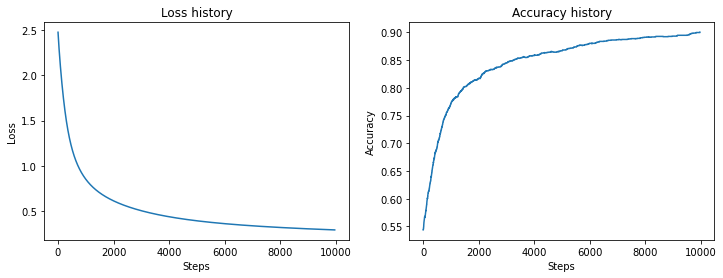

Training model for number 6
total step : 1 
error : 2.587384, accuarcy : 0.517759
total step : 2 
error : 2.568612, accuarcy : 0.518259
total step : 3 
error : 2.550323, accuarcy : 0.520260
total step : 4 
error : 2.532504, accuarcy : 0.523262
total step : 5 
error : 2.515139, accuarcy : 0.524262
total step : 6 
error : 2.498213, accuarcy : 0.528764
total step : 7 
error : 2.481712, accuarcy : 0.532766
total step : 8 
error : 2.465623, accuarcy : 0.535268
total step : 9 
error : 2.449931, accuarcy : 0.536268
total step : 10 
error : 2.434623, accuarcy : 0.537269
total step : 11 
error : 2.419685, accuarcy : 0.537269
total step : 12 
error : 2.405104, accuarcy : 0.539270
total step : 13 
error : 2.390867, accuarcy : 0.541771
total step : 14 
error : 2.376963, accuarcy : 0.543272
total step : 15 
error : 2.363377, accuarcy : 0.545273
total step : 16 
error : 2.350100, accuarcy : 0.546273
total step : 17 
error : 2.337119, accuarcy : 0.547274
total step : 18 
error : 2.324423, accuarcy : 

total step : 168 
error : 1.429387, accuarcy : 0.685843
total step : 169 
error : 1.425940, accuarcy : 0.685843
total step : 170 
error : 1.422512, accuarcy : 0.686343
total step : 171 
error : 1.419103, accuarcy : 0.686343
total step : 172 
error : 1.415713, accuarcy : 0.686343
total step : 173 
error : 1.412341, accuarcy : 0.686843
total step : 174 
error : 1.408988, accuarcy : 0.687344
total step : 175 
error : 1.405653, accuarcy : 0.687844
total step : 176 
error : 1.402337, accuarcy : 0.687844
total step : 177 
error : 1.399039, accuarcy : 0.690345
total step : 178 
error : 1.395759, accuarcy : 0.691346
total step : 179 
error : 1.392497, accuarcy : 0.691346
total step : 180 
error : 1.389253, accuarcy : 0.690845
total step : 181 
error : 1.386026, accuarcy : 0.691846
total step : 182 
error : 1.382817, accuarcy : 0.693847
total step : 183 
error : 1.379626, accuarcy : 0.694347
total step : 184 
error : 1.376452, accuarcy : 0.694847
total step : 185 
error : 1.373295, accuarcy : 0

total step : 377 
error : 0.978546, accuarcy : 0.772386
total step : 378 
error : 0.977197, accuarcy : 0.772386
total step : 379 
error : 0.975853, accuarcy : 0.772386
total step : 380 
error : 0.974514, accuarcy : 0.772386
total step : 381 
error : 0.973179, accuarcy : 0.773387
total step : 382 
error : 0.971849, accuarcy : 0.773887
total step : 383 
error : 0.970524, accuarcy : 0.774387
total step : 384 
error : 0.969203, accuarcy : 0.774387
total step : 385 
error : 0.967886, accuarcy : 0.774387
total step : 386 
error : 0.966574, accuarcy : 0.775388
total step : 387 
error : 0.965267, accuarcy : 0.775888
total step : 388 
error : 0.963964, accuarcy : 0.775888
total step : 389 
error : 0.962665, accuarcy : 0.775888
total step : 390 
error : 0.961370, accuarcy : 0.775888
total step : 391 
error : 0.960080, accuarcy : 0.776888
total step : 392 
error : 0.958794, accuarcy : 0.776888
total step : 393 
error : 0.957513, accuarcy : 0.777389
total step : 394 
error : 0.956236, accuarcy : 0

total step : 606 
error : 0.754121, accuarcy : 0.821411
total step : 607 
error : 0.753399, accuarcy : 0.821911
total step : 608 
error : 0.752679, accuarcy : 0.821911
total step : 609 
error : 0.751961, accuarcy : 0.821911
total step : 610 
error : 0.751244, accuarcy : 0.821911
total step : 611 
error : 0.750529, accuarcy : 0.822411
total step : 612 
error : 0.749815, accuarcy : 0.822411
total step : 613 
error : 0.749103, accuarcy : 0.823412
total step : 614 
error : 0.748393, accuarcy : 0.823412
total step : 615 
error : 0.747684, accuarcy : 0.823412
total step : 616 
error : 0.746976, accuarcy : 0.823412
total step : 617 
error : 0.746270, accuarcy : 0.824412
total step : 618 
error : 0.745566, accuarcy : 0.824412
total step : 619 
error : 0.744863, accuarcy : 0.824912
total step : 620 
error : 0.744162, accuarcy : 0.824912
total step : 621 
error : 0.743462, accuarcy : 0.824912
total step : 622 
error : 0.742763, accuarcy : 0.824912
total step : 623 
error : 0.742066, accuarcy : 0

total step : 831 
error : 0.623398, accuarcy : 0.845423
total step : 832 
error : 0.622930, accuarcy : 0.845423
total step : 833 
error : 0.622464, accuarcy : 0.845423
total step : 834 
error : 0.621998, accuarcy : 0.845423
total step : 835 
error : 0.621533, accuarcy : 0.845423
total step : 836 
error : 0.621069, accuarcy : 0.845423
total step : 837 
error : 0.620606, accuarcy : 0.845423
total step : 838 
error : 0.620144, accuarcy : 0.845923
total step : 839 
error : 0.619682, accuarcy : 0.845923
total step : 840 
error : 0.619221, accuarcy : 0.845923
total step : 841 
error : 0.618761, accuarcy : 0.845923
total step : 842 
error : 0.618302, accuarcy : 0.845923
total step : 843 
error : 0.617843, accuarcy : 0.845923
total step : 844 
error : 0.617386, accuarcy : 0.846923
total step : 845 
error : 0.616929, accuarcy : 0.847424
total step : 846 
error : 0.616473, accuarcy : 0.847424
total step : 847 
error : 0.616018, accuarcy : 0.847924
total step : 848 
error : 0.615563, accuarcy : 0

total step : 1053 
error : 0.536440, accuarcy : 0.867434
total step : 1054 
error : 0.536113, accuarcy : 0.867434
total step : 1055 
error : 0.535785, accuarcy : 0.867434
total step : 1056 
error : 0.535458, accuarcy : 0.867434
total step : 1057 
error : 0.535132, accuarcy : 0.867434
total step : 1058 
error : 0.534806, accuarcy : 0.867434
total step : 1059 
error : 0.534481, accuarcy : 0.867434
total step : 1060 
error : 0.534156, accuarcy : 0.867434
total step : 1061 
error : 0.533831, accuarcy : 0.867434
total step : 1062 
error : 0.533507, accuarcy : 0.867434
total step : 1063 
error : 0.533183, accuarcy : 0.867434
total step : 1064 
error : 0.532860, accuarcy : 0.867434
total step : 1065 
error : 0.532538, accuarcy : 0.867434
total step : 1066 
error : 0.532216, accuarcy : 0.867434
total step : 1067 
error : 0.531894, accuarcy : 0.867434
total step : 1068 
error : 0.531573, accuarcy : 0.867434
total step : 1069 
error : 0.531252, accuarcy : 0.867434
total step : 1070 
error : 0.53

total step : 1261 
error : 0.477132, accuarcy : 0.876438
total step : 1262 
error : 0.476884, accuarcy : 0.876438
total step : 1263 
error : 0.476637, accuarcy : 0.876438
total step : 1264 
error : 0.476389, accuarcy : 0.876438
total step : 1265 
error : 0.476142, accuarcy : 0.876438
total step : 1266 
error : 0.475895, accuarcy : 0.876438
total step : 1267 
error : 0.475649, accuarcy : 0.876438
total step : 1268 
error : 0.475403, accuarcy : 0.876438
total step : 1269 
error : 0.475157, accuarcy : 0.876438
total step : 1270 
error : 0.474912, accuarcy : 0.876438
total step : 1271 
error : 0.474666, accuarcy : 0.876438
total step : 1272 
error : 0.474422, accuarcy : 0.876438
total step : 1273 
error : 0.474177, accuarcy : 0.876938
total step : 1274 
error : 0.473933, accuarcy : 0.876938
total step : 1275 
error : 0.473689, accuarcy : 0.876938
total step : 1276 
error : 0.473445, accuarcy : 0.876938
total step : 1277 
error : 0.473202, accuarcy : 0.876938
total step : 1278 
error : 0.47

total step : 1472 
error : 0.430819, accuarcy : 0.884942
total step : 1473 
error : 0.430624, accuarcy : 0.884942
total step : 1474 
error : 0.430431, accuarcy : 0.884942
total step : 1475 
error : 0.430237, accuarcy : 0.884942
total step : 1476 
error : 0.430043, accuarcy : 0.884942
total step : 1477 
error : 0.429850, accuarcy : 0.884942
total step : 1478 
error : 0.429657, accuarcy : 0.884942
total step : 1479 
error : 0.429464, accuarcy : 0.884942
total step : 1480 
error : 0.429271, accuarcy : 0.884942
total step : 1481 
error : 0.429079, accuarcy : 0.884942
total step : 1482 
error : 0.428887, accuarcy : 0.884942
total step : 1483 
error : 0.428694, accuarcy : 0.885443
total step : 1484 
error : 0.428503, accuarcy : 0.885443
total step : 1485 
error : 0.428311, accuarcy : 0.885443
total step : 1486 
error : 0.428120, accuarcy : 0.885443
total step : 1487 
error : 0.427928, accuarcy : 0.885443
total step : 1488 
error : 0.427737, accuarcy : 0.885443
total step : 1489 
error : 0.42

total step : 1686 
error : 0.393590, accuarcy : 0.891446
total step : 1687 
error : 0.393434, accuarcy : 0.891446
total step : 1688 
error : 0.393279, accuarcy : 0.891446
total step : 1689 
error : 0.393123, accuarcy : 0.891446
total step : 1690 
error : 0.392968, accuarcy : 0.891446
total step : 1691 
error : 0.392813, accuarcy : 0.891446
total step : 1692 
error : 0.392658, accuarcy : 0.891946
total step : 1693 
error : 0.392503, accuarcy : 0.892446
total step : 1694 
error : 0.392349, accuarcy : 0.892446
total step : 1695 
error : 0.392194, accuarcy : 0.892446
total step : 1696 
error : 0.392040, accuarcy : 0.892446
total step : 1697 
error : 0.391886, accuarcy : 0.892446
total step : 1698 
error : 0.391732, accuarcy : 0.892446
total step : 1699 
error : 0.391578, accuarcy : 0.892446
total step : 1700 
error : 0.391424, accuarcy : 0.892446
total step : 1701 
error : 0.391271, accuarcy : 0.892446
total step : 1702 
error : 0.391117, accuarcy : 0.892446
total step : 1703 
error : 0.39

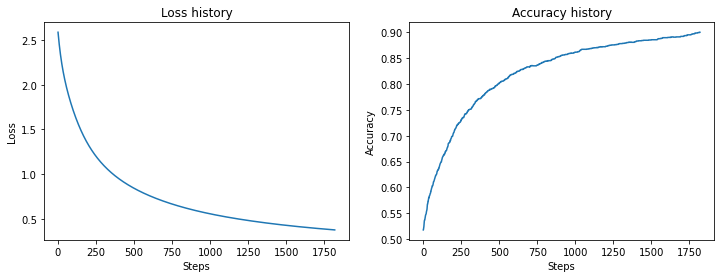

Training model for number 7
total step : 1 
error : 2.711149, accuarcy : 0.504752
total step : 2 
error : 2.671217, accuarcy : 0.507254
total step : 3 
error : 2.632350, accuarcy : 0.508254
total step : 4 
error : 2.594541, accuarcy : 0.509255
total step : 5 
error : 2.557784, accuarcy : 0.510255
total step : 6 
error : 2.522070, accuarcy : 0.509755
total step : 7 
error : 2.487390, accuarcy : 0.512256
total step : 8 
error : 2.453731, accuarcy : 0.515758
total step : 9 
error : 2.421079, accuarcy : 0.515258
total step : 10 
error : 2.389420, accuarcy : 0.515258
total step : 11 
error : 2.358735, accuarcy : 0.517759
total step : 12 
error : 2.329006, accuarcy : 0.523762
total step : 13 
error : 2.300213, accuarcy : 0.527764
total step : 14 
error : 2.272333, accuarcy : 0.527264
total step : 15 
error : 2.245345, accuarcy : 0.528264
total step : 16 
error : 2.219224, accuarcy : 0.531766
total step : 17 
error : 2.193946, accuarcy : 0.534767
total step : 18 
error : 2.169486, accuarcy : 

total step : 168 
error : 1.111871, accuarcy : 0.702351
total step : 169 
error : 1.108953, accuarcy : 0.702351
total step : 170 
error : 1.106053, accuarcy : 0.702351
total step : 171 
error : 1.103169, accuarcy : 0.703352
total step : 172 
error : 1.100304, accuarcy : 0.704852
total step : 173 
error : 1.097455, accuarcy : 0.704852
total step : 174 
error : 1.094623, accuarcy : 0.705853
total step : 175 
error : 1.091808, accuarcy : 0.707354
total step : 176 
error : 1.089010, accuarcy : 0.707354
total step : 177 
error : 1.086229, accuarcy : 0.708854
total step : 178 
error : 1.083464, accuarcy : 0.709355
total step : 179 
error : 1.080715, accuarcy : 0.710855
total step : 180 
error : 1.077982, accuarcy : 0.711856
total step : 181 
error : 1.075266, accuarcy : 0.712356
total step : 182 
error : 1.072565, accuarcy : 0.712856
total step : 183 
error : 1.069880, accuarcy : 0.712856
total step : 184 
error : 1.067211, accuarcy : 0.713357
total step : 185 
error : 1.064558, accuarcy : 0

total step : 373 
error : 0.746680, accuarcy : 0.782391
total step : 374 
error : 0.745606, accuarcy : 0.782391
total step : 375 
error : 0.744537, accuarcy : 0.782891
total step : 376 
error : 0.743471, accuarcy : 0.782891
total step : 377 
error : 0.742410, accuarcy : 0.782891
total step : 378 
error : 0.741352, accuarcy : 0.783892
total step : 379 
error : 0.740299, accuarcy : 0.783892
total step : 380 
error : 0.739249, accuarcy : 0.783892
total step : 381 
error : 0.738204, accuarcy : 0.783892
total step : 382 
error : 0.737162, accuarcy : 0.784392
total step : 383 
error : 0.736124, accuarcy : 0.784392
total step : 384 
error : 0.735091, accuarcy : 0.784892
total step : 385 
error : 0.734061, accuarcy : 0.784892
total step : 386 
error : 0.733035, accuarcy : 0.784892
total step : 387 
error : 0.732013, accuarcy : 0.784892
total step : 388 
error : 0.730994, accuarcy : 0.784892
total step : 389 
error : 0.729980, accuarcy : 0.785393
total step : 390 
error : 0.728969, accuarcy : 0

total step : 593 
error : 0.579820, accuarcy : 0.829415
total step : 594 
error : 0.579285, accuarcy : 0.829415
total step : 595 
error : 0.578751, accuarcy : 0.829415
total step : 596 
error : 0.578220, accuarcy : 0.829915
total step : 597 
error : 0.577689, accuarcy : 0.829915
total step : 598 
error : 0.577160, accuarcy : 0.829915
total step : 599 
error : 0.576632, accuarcy : 0.829915
total step : 600 
error : 0.576106, accuarcy : 0.829915
total step : 601 
error : 0.575581, accuarcy : 0.829915
total step : 602 
error : 0.575058, accuarcy : 0.829915
total step : 603 
error : 0.574536, accuarcy : 0.829915
total step : 604 
error : 0.574015, accuarcy : 0.829915
total step : 605 
error : 0.573496, accuarcy : 0.829915
total step : 606 
error : 0.572978, accuarcy : 0.829915
total step : 607 
error : 0.572461, accuarcy : 0.829915
total step : 608 
error : 0.571946, accuarcy : 0.829915
total step : 609 
error : 0.571432, accuarcy : 0.829915
total step : 610 
error : 0.570920, accuarcy : 0

total step : 809 
error : 0.490392, accuarcy : 0.853927
total step : 810 
error : 0.490072, accuarcy : 0.853927
total step : 811 
error : 0.489754, accuarcy : 0.853927
total step : 812 
error : 0.489436, accuarcy : 0.853927
total step : 813 
error : 0.489119, accuarcy : 0.853927
total step : 814 
error : 0.488803, accuarcy : 0.853927
total step : 815 
error : 0.488487, accuarcy : 0.853927
total step : 816 
error : 0.488172, accuarcy : 0.854427
total step : 817 
error : 0.487857, accuarcy : 0.854427
total step : 818 
error : 0.487544, accuarcy : 0.854427
total step : 819 
error : 0.487231, accuarcy : 0.854927
total step : 820 
error : 0.486918, accuarcy : 0.854927
total step : 821 
error : 0.486606, accuarcy : 0.854927
total step : 822 
error : 0.486295, accuarcy : 0.854927
total step : 823 
error : 0.485985, accuarcy : 0.854927
total step : 824 
error : 0.485675, accuarcy : 0.854927
total step : 825 
error : 0.485365, accuarcy : 0.854927
total step : 826 
error : 0.485057, accuarcy : 0

total step : 1102 
error : 0.418751, accuarcy : 0.870935
total step : 1103 
error : 0.418563, accuarcy : 0.870935
total step : 1104 
error : 0.418376, accuarcy : 0.871436
total step : 1105 
error : 0.418188, accuarcy : 0.871436
total step : 1106 
error : 0.418001, accuarcy : 0.871436
total step : 1107 
error : 0.417814, accuarcy : 0.871436
total step : 1108 
error : 0.417628, accuarcy : 0.871436
total step : 1109 
error : 0.417442, accuarcy : 0.871436
total step : 1110 
error : 0.417256, accuarcy : 0.871436
total step : 1111 
error : 0.417070, accuarcy : 0.871436
total step : 1112 
error : 0.416885, accuarcy : 0.871436
total step : 1113 
error : 0.416700, accuarcy : 0.871436
total step : 1114 
error : 0.416515, accuarcy : 0.871436
total step : 1115 
error : 0.416330, accuarcy : 0.871436
total step : 1116 
error : 0.416146, accuarcy : 0.870935
total step : 1117 
error : 0.415962, accuarcy : 0.870935
total step : 1118 
error : 0.415779, accuarcy : 0.870935
total step : 1119 
error : 0.41

total step : 1281 
error : 0.389108, accuarcy : 0.879940
total step : 1282 
error : 0.388962, accuarcy : 0.879940
total step : 1283 
error : 0.388816, accuarcy : 0.879940
total step : 1284 
error : 0.388671, accuarcy : 0.879940
total step : 1285 
error : 0.388525, accuarcy : 0.879940
total step : 1286 
error : 0.388380, accuarcy : 0.879940
total step : 1287 
error : 0.388235, accuarcy : 0.879940
total step : 1288 
error : 0.388090, accuarcy : 0.879940
total step : 1289 
error : 0.387945, accuarcy : 0.879940
total step : 1290 
error : 0.387801, accuarcy : 0.879940
total step : 1291 
error : 0.387657, accuarcy : 0.879940
total step : 1292 
error : 0.387512, accuarcy : 0.879940
total step : 1293 
error : 0.387368, accuarcy : 0.879940
total step : 1294 
error : 0.387225, accuarcy : 0.879940
total step : 1295 
error : 0.387081, accuarcy : 0.879940
total step : 1296 
error : 0.386938, accuarcy : 0.879940
total step : 1297 
error : 0.386794, accuarcy : 0.879940
total step : 1298 
error : 0.38

total step : 1489 
error : 0.362271, accuarcy : 0.887444
total step : 1490 
error : 0.362157, accuarcy : 0.887444
total step : 1491 
error : 0.362043, accuarcy : 0.887444
total step : 1492 
error : 0.361929, accuarcy : 0.887444
total step : 1493 
error : 0.361816, accuarcy : 0.887444
total step : 1494 
error : 0.361702, accuarcy : 0.887444
total step : 1495 
error : 0.361588, accuarcy : 0.887444
total step : 1496 
error : 0.361475, accuarcy : 0.887444
total step : 1497 
error : 0.361362, accuarcy : 0.887444
total step : 1498 
error : 0.361249, accuarcy : 0.887444
total step : 1499 
error : 0.361136, accuarcy : 0.887444
total step : 1500 
error : 0.361023, accuarcy : 0.887444
total step : 1501 
error : 0.360910, accuarcy : 0.887444
total step : 1502 
error : 0.360797, accuarcy : 0.887444
total step : 1503 
error : 0.360685, accuarcy : 0.887444
total step : 1504 
error : 0.360572, accuarcy : 0.887444
total step : 1505 
error : 0.360460, accuarcy : 0.887944
total step : 1506 
error : 0.36

total step : 1714 
error : 0.339341, accuarcy : 0.893947
total step : 1715 
error : 0.339250, accuarcy : 0.893947
total step : 1716 
error : 0.339159, accuarcy : 0.893947
total step : 1717 
error : 0.339068, accuarcy : 0.893947
total step : 1718 
error : 0.338977, accuarcy : 0.893947
total step : 1719 
error : 0.338886, accuarcy : 0.893947
total step : 1720 
error : 0.338796, accuarcy : 0.893947
total step : 1721 
error : 0.338705, accuarcy : 0.893947
total step : 1722 
error : 0.338615, accuarcy : 0.893947
total step : 1723 
error : 0.338524, accuarcy : 0.893947
total step : 1724 
error : 0.338434, accuarcy : 0.893947
total step : 1725 
error : 0.338344, accuarcy : 0.893947
total step : 1726 
error : 0.338254, accuarcy : 0.893947
total step : 1727 
error : 0.338163, accuarcy : 0.893947
total step : 1728 
error : 0.338073, accuarcy : 0.893947
total step : 1729 
error : 0.337984, accuarcy : 0.894947
total step : 1730 
error : 0.337894, accuarcy : 0.894947
total step : 1731 
error : 0.33

total step : 1861 
error : 0.326796, accuarcy : 0.897449
total step : 1862 
error : 0.326716, accuarcy : 0.897449
total step : 1863 
error : 0.326637, accuarcy : 0.897449
total step : 1864 
error : 0.326557, accuarcy : 0.897449
total step : 1865 
error : 0.326477, accuarcy : 0.897449
total step : 1866 
error : 0.326397, accuarcy : 0.897449
total step : 1867 
error : 0.326318, accuarcy : 0.897449
total step : 1868 
error : 0.326238, accuarcy : 0.897449
total step : 1869 
error : 0.326159, accuarcy : 0.897449
total step : 1870 
error : 0.326079, accuarcy : 0.897449
total step : 1871 
error : 0.326000, accuarcy : 0.897449
total step : 1872 
error : 0.325921, accuarcy : 0.897449
total step : 1873 
error : 0.325842, accuarcy : 0.897449
total step : 1874 
error : 0.325763, accuarcy : 0.897449
total step : 1875 
error : 0.325684, accuarcy : 0.897449
total step : 1876 
error : 0.325605, accuarcy : 0.897949
total step : 1877 
error : 0.325526, accuarcy : 0.897949
total step : 1878 
error : 0.32

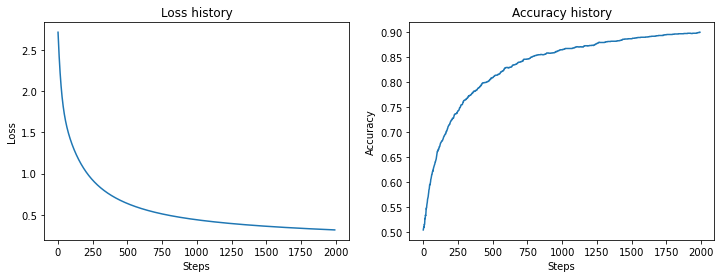

Training model for number 8
total step : 1 
error : 6.215567, accuarcy : 0.494747
total step : 2 
error : 6.144661, accuarcy : 0.494747
total step : 3 
error : 6.072563, accuarcy : 0.497749
total step : 4 
error : 5.999313, accuarcy : 0.497749
total step : 5 
error : 5.924943, accuarcy : 0.496748
total step : 6 
error : 5.849478, accuarcy : 0.496248
total step : 7 
error : 5.772948, accuarcy : 0.495748
total step : 8 
error : 5.695386, accuarcy : 0.495748
total step : 9 
error : 5.616835, accuarcy : 0.496748
total step : 10 
error : 5.537349, accuarcy : 0.498749
total step : 11 
error : 5.456995, accuarcy : 0.500750
total step : 12 
error : 5.375852, accuarcy : 0.501751
total step : 13 
error : 5.294014, accuarcy : 0.503252
total step : 14 
error : 5.211584, accuarcy : 0.504252
total step : 15 
error : 5.128678, accuarcy : 0.503752
total step : 16 
error : 5.045416, accuarcy : 0.503752
total step : 17 
error : 4.961926, accuarcy : 0.506753
total step : 18 
error : 4.878339, accuarcy : 

total step : 328 
error : 1.437580, accuarcy : 0.678839
total step : 329 
error : 1.436452, accuarcy : 0.679840
total step : 330 
error : 1.435326, accuarcy : 0.679840
total step : 331 
error : 1.434203, accuarcy : 0.680340
total step : 332 
error : 1.433081, accuarcy : 0.680340
total step : 333 
error : 1.431962, accuarcy : 0.680840
total step : 334 
error : 1.430845, accuarcy : 0.680840
total step : 335 
error : 1.429731, accuarcy : 0.681341
total step : 336 
error : 1.428618, accuarcy : 0.681841
total step : 337 
error : 1.427508, accuarcy : 0.681841
total step : 338 
error : 1.426400, accuarcy : 0.681841
total step : 339 
error : 1.425294, accuarcy : 0.682341
total step : 340 
error : 1.424190, accuarcy : 0.682841
total step : 341 
error : 1.423088, accuarcy : 0.682841
total step : 342 
error : 1.421989, accuarcy : 0.683342
total step : 343 
error : 1.420891, accuarcy : 0.683342
total step : 344 
error : 1.419796, accuarcy : 0.683342
total step : 345 
error : 1.418703, accuarcy : 0

total step : 536 
error : 1.243464, accuarcy : 0.707354
total step : 537 
error : 1.242696, accuarcy : 0.707854
total step : 538 
error : 1.241929, accuarcy : 0.708354
total step : 539 
error : 1.241164, accuarcy : 0.708354
total step : 540 
error : 1.240401, accuarcy : 0.708354
total step : 541 
error : 1.239638, accuarcy : 0.708354
total step : 542 
error : 1.238877, accuarcy : 0.708354
total step : 543 
error : 1.238117, accuarcy : 0.708354
total step : 544 
error : 1.237359, accuarcy : 0.708354
total step : 545 
error : 1.236601, accuarcy : 0.708354
total step : 546 
error : 1.235846, accuarcy : 0.708354
total step : 547 
error : 1.235091, accuarcy : 0.708354
total step : 548 
error : 1.234338, accuarcy : 0.708354
total step : 549 
error : 1.233586, accuarcy : 0.708354
total step : 550 
error : 1.232835, accuarcy : 0.708354
total step : 551 
error : 1.232085, accuarcy : 0.708354
total step : 552 
error : 1.231337, accuarcy : 0.708854
total step : 553 
error : 1.230590, accuarcy : 0

total step : 730 
error : 1.115837, accuarcy : 0.724362
total step : 731 
error : 1.115273, accuarcy : 0.724862
total step : 732 
error : 1.114710, accuarcy : 0.725363
total step : 733 
error : 1.114149, accuarcy : 0.725363
total step : 734 
error : 1.113588, accuarcy : 0.725363
total step : 735 
error : 1.113027, accuarcy : 0.725363
total step : 736 
error : 1.112468, accuarcy : 0.725363
total step : 737 
error : 1.111909, accuarcy : 0.725863
total step : 738 
error : 1.111351, accuarcy : 0.725863
total step : 739 
error : 1.110794, accuarcy : 0.725863
total step : 740 
error : 1.110238, accuarcy : 0.726363
total step : 741 
error : 1.109683, accuarcy : 0.726363
total step : 742 
error : 1.109128, accuarcy : 0.726363
total step : 743 
error : 1.108574, accuarcy : 0.726363
total step : 744 
error : 1.108021, accuarcy : 0.725863
total step : 745 
error : 1.107469, accuarcy : 0.725863
total step : 746 
error : 1.106917, accuarcy : 0.726363
total step : 747 
error : 1.106367, accuarcy : 0

total step : 934 
error : 1.015350, accuarcy : 0.744372
total step : 935 
error : 1.014919, accuarcy : 0.744872
total step : 936 
error : 1.014488, accuarcy : 0.745373
total step : 937 
error : 1.014058, accuarcy : 0.745373
total step : 938 
error : 1.013628, accuarcy : 0.745373
total step : 939 
error : 1.013199, accuarcy : 0.745373
total step : 940 
error : 1.012771, accuarcy : 0.745873
total step : 941 
error : 1.012342, accuarcy : 0.745873
total step : 942 
error : 1.011915, accuarcy : 0.745873
total step : 943 
error : 1.011488, accuarcy : 0.745873
total step : 944 
error : 1.011061, accuarcy : 0.746373
total step : 945 
error : 1.010635, accuarcy : 0.746373
total step : 946 
error : 1.010210, accuarcy : 0.746373
total step : 947 
error : 1.009785, accuarcy : 0.746373
total step : 948 
error : 1.009360, accuarcy : 0.745873
total step : 949 
error : 1.008936, accuarcy : 0.745873
total step : 950 
error : 1.008512, accuarcy : 0.745873
total step : 951 
error : 1.008089, accuarcy : 0

total step : 1128 
error : 0.940307, accuarcy : 0.759380
total step : 1129 
error : 0.939960, accuarcy : 0.759880
total step : 1130 
error : 0.939614, accuarcy : 0.759880
total step : 1131 
error : 0.939268, accuarcy : 0.760380
total step : 1132 
error : 0.938922, accuarcy : 0.760380
total step : 1133 
error : 0.938577, accuarcy : 0.760380
total step : 1134 
error : 0.938232, accuarcy : 0.760380
total step : 1135 
error : 0.937887, accuarcy : 0.760380
total step : 1136 
error : 0.937543, accuarcy : 0.760880
total step : 1137 
error : 0.937199, accuarcy : 0.760880
total step : 1138 
error : 0.936856, accuarcy : 0.760880
total step : 1139 
error : 0.936513, accuarcy : 0.760880
total step : 1140 
error : 0.936170, accuarcy : 0.760880
total step : 1141 
error : 0.935828, accuarcy : 0.761881
total step : 1142 
error : 0.935486, accuarcy : 0.761881
total step : 1143 
error : 0.935144, accuarcy : 0.762381
total step : 1144 
error : 0.934803, accuarcy : 0.762381
total step : 1145 
error : 0.93

total step : 1334 
error : 0.875909, accuarcy : 0.770385
total step : 1335 
error : 0.875628, accuarcy : 0.770885
total step : 1336 
error : 0.875346, accuarcy : 0.770885
total step : 1337 
error : 0.875066, accuarcy : 0.770885
total step : 1338 
error : 0.874785, accuarcy : 0.770885
total step : 1339 
error : 0.874505, accuarcy : 0.770885
total step : 1340 
error : 0.874225, accuarcy : 0.770885
total step : 1341 
error : 0.873945, accuarcy : 0.770885
total step : 1342 
error : 0.873665, accuarcy : 0.770885
total step : 1343 
error : 0.873386, accuarcy : 0.771386
total step : 1344 
error : 0.873107, accuarcy : 0.771386
total step : 1345 
error : 0.872828, accuarcy : 0.771386
total step : 1346 
error : 0.872550, accuarcy : 0.771386
total step : 1347 
error : 0.872272, accuarcy : 0.771386
total step : 1348 
error : 0.871994, accuarcy : 0.771386
total step : 1349 
error : 0.871716, accuarcy : 0.771386
total step : 1350 
error : 0.871439, accuarcy : 0.771886
total step : 1351 
error : 0.87

total step : 1515 
error : 0.829070, accuarcy : 0.775888
total step : 1516 
error : 0.828833, accuarcy : 0.775888
total step : 1517 
error : 0.828595, accuarcy : 0.775888
total step : 1518 
error : 0.828358, accuarcy : 0.776388
total step : 1519 
error : 0.828121, accuarcy : 0.776388
total step : 1520 
error : 0.827884, accuarcy : 0.776388
total step : 1521 
error : 0.827647, accuarcy : 0.776388
total step : 1522 
error : 0.827411, accuarcy : 0.776388
total step : 1523 
error : 0.827175, accuarcy : 0.776388
total step : 1524 
error : 0.826939, accuarcy : 0.776888
total step : 1525 
error : 0.826703, accuarcy : 0.776888
total step : 1526 
error : 0.826467, accuarcy : 0.776888
total step : 1527 
error : 0.826232, accuarcy : 0.777389
total step : 1528 
error : 0.825997, accuarcy : 0.777389
total step : 1529 
error : 0.825762, accuarcy : 0.777389
total step : 1530 
error : 0.825527, accuarcy : 0.777389
total step : 1531 
error : 0.825293, accuarcy : 0.777389
total step : 1532 
error : 0.82

total step : 1692 
error : 0.790082, accuarcy : 0.785893
total step : 1693 
error : 0.789878, accuarcy : 0.785893
total step : 1694 
error : 0.789674, accuarcy : 0.786393
total step : 1695 
error : 0.789470, accuarcy : 0.786393
total step : 1696 
error : 0.789267, accuarcy : 0.786393
total step : 1697 
error : 0.789063, accuarcy : 0.786393
total step : 1698 
error : 0.788860, accuarcy : 0.786393
total step : 1699 
error : 0.788657, accuarcy : 0.786393
total step : 1700 
error : 0.788455, accuarcy : 0.786393
total step : 1701 
error : 0.788252, accuarcy : 0.786393
total step : 1702 
error : 0.788049, accuarcy : 0.786393
total step : 1703 
error : 0.787847, accuarcy : 0.786393
total step : 1704 
error : 0.787645, accuarcy : 0.786393
total step : 1705 
error : 0.787443, accuarcy : 0.786393
total step : 1706 
error : 0.787241, accuarcy : 0.786393
total step : 1707 
error : 0.787040, accuarcy : 0.786393
total step : 1708 
error : 0.786838, accuarcy : 0.786893
total step : 1709 
error : 0.78

total step : 1892 
error : 0.752395, accuarcy : 0.796898
total step : 1893 
error : 0.752221, accuarcy : 0.796898
total step : 1894 
error : 0.752047, accuarcy : 0.796898
total step : 1895 
error : 0.751873, accuarcy : 0.796898
total step : 1896 
error : 0.751700, accuarcy : 0.796898
total step : 1897 
error : 0.751526, accuarcy : 0.796898
total step : 1898 
error : 0.751353, accuarcy : 0.796898
total step : 1899 
error : 0.751180, accuarcy : 0.796898
total step : 1900 
error : 0.751007, accuarcy : 0.796898
total step : 1901 
error : 0.750834, accuarcy : 0.796898
total step : 1902 
error : 0.750661, accuarcy : 0.796898
total step : 1903 
error : 0.750488, accuarcy : 0.796898
total step : 1904 
error : 0.750316, accuarcy : 0.796898
total step : 1905 
error : 0.750143, accuarcy : 0.796898
total step : 1906 
error : 0.749971, accuarcy : 0.796898
total step : 1907 
error : 0.749799, accuarcy : 0.796898
total step : 1908 
error : 0.749627, accuarcy : 0.797399
total step : 1909 
error : 0.74

total step : 2082 
error : 0.721531, accuarcy : 0.805403
total step : 2083 
error : 0.721380, accuarcy : 0.805403
total step : 2084 
error : 0.721228, accuarcy : 0.805403
total step : 2085 
error : 0.721077, accuarcy : 0.805403
total step : 2086 
error : 0.720925, accuarcy : 0.805403
total step : 2087 
error : 0.720774, accuarcy : 0.805403
total step : 2088 
error : 0.720623, accuarcy : 0.805403
total step : 2089 
error : 0.720472, accuarcy : 0.805403
total step : 2090 
error : 0.720321, accuarcy : 0.805403
total step : 2091 
error : 0.720171, accuarcy : 0.805403
total step : 2092 
error : 0.720020, accuarcy : 0.805403
total step : 2093 
error : 0.719869, accuarcy : 0.805403
total step : 2094 
error : 0.719719, accuarcy : 0.805403
total step : 2095 
error : 0.719569, accuarcy : 0.805403
total step : 2096 
error : 0.719418, accuarcy : 0.805403
total step : 2097 
error : 0.719268, accuarcy : 0.805403
total step : 2098 
error : 0.719118, accuarcy : 0.805403
total step : 2099 
error : 0.71

total step : 2266 
error : 0.695298, accuarcy : 0.809905
total step : 2267 
error : 0.695164, accuarcy : 0.809905
total step : 2268 
error : 0.695030, accuarcy : 0.810405
total step : 2269 
error : 0.694896, accuarcy : 0.810905
total step : 2270 
error : 0.694763, accuarcy : 0.810905
total step : 2271 
error : 0.694629, accuarcy : 0.810905
total step : 2272 
error : 0.694495, accuarcy : 0.810905
total step : 2273 
error : 0.694362, accuarcy : 0.810905
total step : 2274 
error : 0.694229, accuarcy : 0.810905
total step : 2275 
error : 0.694095, accuarcy : 0.810905
total step : 2276 
error : 0.693962, accuarcy : 0.810905
total step : 2277 
error : 0.693829, accuarcy : 0.810905
total step : 2278 
error : 0.693696, accuarcy : 0.810905
total step : 2279 
error : 0.693563, accuarcy : 0.811406
total step : 2280 
error : 0.693430, accuarcy : 0.811906
total step : 2281 
error : 0.693297, accuarcy : 0.811906
total step : 2282 
error : 0.693164, accuarcy : 0.811906
total step : 2283 
error : 0.69

total step : 2450 
error : 0.672013, accuarcy : 0.813407
total step : 2451 
error : 0.671893, accuarcy : 0.812906
total step : 2452 
error : 0.671774, accuarcy : 0.812906
total step : 2453 
error : 0.671654, accuarcy : 0.812906
total step : 2454 
error : 0.671535, accuarcy : 0.812906
total step : 2455 
error : 0.671416, accuarcy : 0.812906
total step : 2456 
error : 0.671297, accuarcy : 0.812906
total step : 2457 
error : 0.671178, accuarcy : 0.812906
total step : 2458 
error : 0.671059, accuarcy : 0.812906
total step : 2459 
error : 0.670940, accuarcy : 0.812906
total step : 2460 
error : 0.670821, accuarcy : 0.812906
total step : 2461 
error : 0.670703, accuarcy : 0.812906
total step : 2462 
error : 0.670584, accuarcy : 0.812906
total step : 2463 
error : 0.670466, accuarcy : 0.813407
total step : 2464 
error : 0.670347, accuarcy : 0.813407
total step : 2465 
error : 0.670229, accuarcy : 0.813407
total step : 2466 
error : 0.670110, accuarcy : 0.813407
total step : 2467 
error : 0.66

total step : 2642 
error : 0.650339, accuarcy : 0.817409
total step : 2643 
error : 0.650232, accuarcy : 0.817409
total step : 2644 
error : 0.650126, accuarcy : 0.817409
total step : 2645 
error : 0.650019, accuarcy : 0.817409
total step : 2646 
error : 0.649913, accuarcy : 0.817409
total step : 2647 
error : 0.649806, accuarcy : 0.817409
total step : 2648 
error : 0.649700, accuarcy : 0.817409
total step : 2649 
error : 0.649594, accuarcy : 0.817409
total step : 2650 
error : 0.649487, accuarcy : 0.817409
total step : 2651 
error : 0.649381, accuarcy : 0.817409
total step : 2652 
error : 0.649275, accuarcy : 0.817409
total step : 2653 
error : 0.649169, accuarcy : 0.817409
total step : 2654 
error : 0.649063, accuarcy : 0.817409
total step : 2655 
error : 0.648957, accuarcy : 0.817409
total step : 2656 
error : 0.648852, accuarcy : 0.817409
total step : 2657 
error : 0.648746, accuarcy : 0.817409
total step : 2658 
error : 0.648640, accuarcy : 0.817409
total step : 2659 
error : 0.64

total step : 2834 
error : 0.630925, accuarcy : 0.822411
total step : 2835 
error : 0.630829, accuarcy : 0.822411
total step : 2836 
error : 0.630733, accuarcy : 0.822411
total step : 2837 
error : 0.630638, accuarcy : 0.822411
total step : 2838 
error : 0.630542, accuarcy : 0.822411
total step : 2839 
error : 0.630446, accuarcy : 0.822411
total step : 2840 
error : 0.630351, accuarcy : 0.822411
total step : 2841 
error : 0.630255, accuarcy : 0.822411
total step : 2842 
error : 0.630160, accuarcy : 0.822411
total step : 2843 
error : 0.630064, accuarcy : 0.822411
total step : 2844 
error : 0.629969, accuarcy : 0.822411
total step : 2845 
error : 0.629874, accuarcy : 0.822411
total step : 2846 
error : 0.629778, accuarcy : 0.822411
total step : 2847 
error : 0.629683, accuarcy : 0.822411
total step : 2848 
error : 0.629588, accuarcy : 0.822411
total step : 2849 
error : 0.629493, accuarcy : 0.822411
total step : 2850 
error : 0.629398, accuarcy : 0.822411
total step : 2851 
error : 0.62

total step : 3022 
error : 0.613765, accuarcy : 0.822911
total step : 3023 
error : 0.613678, accuarcy : 0.822911
total step : 3024 
error : 0.613591, accuarcy : 0.822911
total step : 3025 
error : 0.613504, accuarcy : 0.822911
total step : 3026 
error : 0.613417, accuarcy : 0.822911
total step : 3027 
error : 0.613331, accuarcy : 0.822911
total step : 3028 
error : 0.613244, accuarcy : 0.822911
total step : 3029 
error : 0.613157, accuarcy : 0.822911
total step : 3030 
error : 0.613071, accuarcy : 0.823412
total step : 3031 
error : 0.612984, accuarcy : 0.823412
total step : 3032 
error : 0.612898, accuarcy : 0.823412
total step : 3033 
error : 0.612811, accuarcy : 0.823412
total step : 3034 
error : 0.612725, accuarcy : 0.823412
total step : 3035 
error : 0.612638, accuarcy : 0.823412
total step : 3036 
error : 0.612552, accuarcy : 0.823412
total step : 3037 
error : 0.612466, accuarcy : 0.823412
total step : 3038 
error : 0.612379, accuarcy : 0.823412
total step : 3039 
error : 0.61

total step : 3229 
error : 0.596648, accuarcy : 0.822911
total step : 3230 
error : 0.596570, accuarcy : 0.822911
total step : 3231 
error : 0.596491, accuarcy : 0.822911
total step : 3232 
error : 0.596413, accuarcy : 0.822911
total step : 3233 
error : 0.596334, accuarcy : 0.822911
total step : 3234 
error : 0.596255, accuarcy : 0.822911
total step : 3235 
error : 0.596177, accuarcy : 0.822911
total step : 3236 
error : 0.596099, accuarcy : 0.822911
total step : 3237 
error : 0.596020, accuarcy : 0.822911
total step : 3238 
error : 0.595942, accuarcy : 0.822911
total step : 3239 
error : 0.595863, accuarcy : 0.822911
total step : 3240 
error : 0.595785, accuarcy : 0.822911
total step : 3241 
error : 0.595707, accuarcy : 0.822911
total step : 3242 
error : 0.595629, accuarcy : 0.822911
total step : 3243 
error : 0.595550, accuarcy : 0.823412
total step : 3244 
error : 0.595472, accuarcy : 0.823412
total step : 3245 
error : 0.595394, accuarcy : 0.823412
total step : 3246 
error : 0.59

total step : 3418 
error : 0.582391, accuarcy : 0.828414
total step : 3419 
error : 0.582319, accuarcy : 0.828414
total step : 3420 
error : 0.582247, accuarcy : 0.828414
total step : 3421 
error : 0.582174, accuarcy : 0.828414
total step : 3422 
error : 0.582102, accuarcy : 0.828414
total step : 3423 
error : 0.582030, accuarcy : 0.828414
total step : 3424 
error : 0.581958, accuarcy : 0.828414
total step : 3425 
error : 0.581886, accuarcy : 0.828414
total step : 3426 
error : 0.581814, accuarcy : 0.828414
total step : 3427 
error : 0.581741, accuarcy : 0.828414
total step : 3428 
error : 0.581669, accuarcy : 0.828414
total step : 3429 
error : 0.581597, accuarcy : 0.828414
total step : 3430 
error : 0.581525, accuarcy : 0.828914
total step : 3431 
error : 0.581453, accuarcy : 0.828914
total step : 3432 
error : 0.581381, accuarcy : 0.828914
total step : 3433 
error : 0.581310, accuarcy : 0.828914
total step : 3434 
error : 0.581238, accuarcy : 0.828914
total step : 3435 
error : 0.58

total step : 3612 
error : 0.568908, accuarcy : 0.829915
total step : 3613 
error : 0.568841, accuarcy : 0.829915
total step : 3614 
error : 0.568774, accuarcy : 0.829915
total step : 3615 
error : 0.568708, accuarcy : 0.829915
total step : 3616 
error : 0.568641, accuarcy : 0.829915
total step : 3617 
error : 0.568574, accuarcy : 0.829915
total step : 3618 
error : 0.568507, accuarcy : 0.829915
total step : 3619 
error : 0.568441, accuarcy : 0.829915
total step : 3620 
error : 0.568374, accuarcy : 0.829915
total step : 3621 
error : 0.568308, accuarcy : 0.829915
total step : 3622 
error : 0.568241, accuarcy : 0.829915
total step : 3623 
error : 0.568175, accuarcy : 0.829915
total step : 3624 
error : 0.568108, accuarcy : 0.829915
total step : 3625 
error : 0.568042, accuarcy : 0.829915
total step : 3626 
error : 0.567975, accuarcy : 0.829915
total step : 3627 
error : 0.567909, accuarcy : 0.829915
total step : 3628 
error : 0.567842, accuarcy : 0.830415
total step : 3629 
error : 0.56

total step : 3818 
error : 0.555680, accuarcy : 0.833917
total step : 3819 
error : 0.555618, accuarcy : 0.833917
total step : 3820 
error : 0.555557, accuarcy : 0.833917
total step : 3821 
error : 0.555495, accuarcy : 0.833917
total step : 3822 
error : 0.555433, accuarcy : 0.833917
total step : 3823 
error : 0.555372, accuarcy : 0.834417
total step : 3824 
error : 0.555310, accuarcy : 0.834417
total step : 3825 
error : 0.555248, accuarcy : 0.834417
total step : 3826 
error : 0.555187, accuarcy : 0.834417
total step : 3827 
error : 0.555125, accuarcy : 0.834417
total step : 3828 
error : 0.555064, accuarcy : 0.834417
total step : 3829 
error : 0.555002, accuarcy : 0.834417
total step : 3830 
error : 0.554941, accuarcy : 0.834417
total step : 3831 
error : 0.554879, accuarcy : 0.834417
total step : 3832 
error : 0.554818, accuarcy : 0.834417
total step : 3833 
error : 0.554756, accuarcy : 0.834417
total step : 3834 
error : 0.554695, accuarcy : 0.834417
total step : 3835 
error : 0.55

total step : 4030 
error : 0.543073, accuarcy : 0.835418
total step : 4031 
error : 0.543015, accuarcy : 0.835418
total step : 4032 
error : 0.542958, accuarcy : 0.835418
total step : 4033 
error : 0.542901, accuarcy : 0.835418
total step : 4034 
error : 0.542844, accuarcy : 0.835418
total step : 4035 
error : 0.542787, accuarcy : 0.835418
total step : 4036 
error : 0.542729, accuarcy : 0.835418
total step : 4037 
error : 0.542672, accuarcy : 0.835418
total step : 4038 
error : 0.542615, accuarcy : 0.835418
total step : 4039 
error : 0.542558, accuarcy : 0.835418
total step : 4040 
error : 0.542501, accuarcy : 0.835418
total step : 4041 
error : 0.542444, accuarcy : 0.835418
total step : 4042 
error : 0.542387, accuarcy : 0.835418
total step : 4043 
error : 0.542330, accuarcy : 0.835418
total step : 4044 
error : 0.542273, accuarcy : 0.835418
total step : 4045 
error : 0.542216, accuarcy : 0.835418
total step : 4046 
error : 0.542159, accuarcy : 0.835418
total step : 4047 
error : 0.54

total step : 4252 
error : 0.530813, accuarcy : 0.836918
total step : 4253 
error : 0.530760, accuarcy : 0.836918
total step : 4254 
error : 0.530707, accuarcy : 0.836918
total step : 4255 
error : 0.530654, accuarcy : 0.836918
total step : 4256 
error : 0.530600, accuarcy : 0.836918
total step : 4257 
error : 0.530547, accuarcy : 0.836918
total step : 4258 
error : 0.530494, accuarcy : 0.837419
total step : 4259 
error : 0.530441, accuarcy : 0.837419
total step : 4260 
error : 0.530388, accuarcy : 0.837419
total step : 4261 
error : 0.530335, accuarcy : 0.837419
total step : 4262 
error : 0.530282, accuarcy : 0.837419
total step : 4263 
error : 0.530229, accuarcy : 0.837419
total step : 4264 
error : 0.530176, accuarcy : 0.837419
total step : 4265 
error : 0.530123, accuarcy : 0.837419
total step : 4266 
error : 0.530069, accuarcy : 0.837419
total step : 4267 
error : 0.530016, accuarcy : 0.837419
total step : 4268 
error : 0.529963, accuarcy : 0.837419
total step : 4269 
error : 0.52

total step : 4482 
error : 0.518995, accuarcy : 0.839420
total step : 4483 
error : 0.518945, accuarcy : 0.839420
total step : 4484 
error : 0.518895, accuarcy : 0.839420
total step : 4485 
error : 0.518846, accuarcy : 0.839420
total step : 4486 
error : 0.518796, accuarcy : 0.839420
total step : 4487 
error : 0.518747, accuarcy : 0.839420
total step : 4488 
error : 0.518697, accuarcy : 0.839420
total step : 4489 
error : 0.518648, accuarcy : 0.839420
total step : 4490 
error : 0.518598, accuarcy : 0.839420
total step : 4491 
error : 0.518549, accuarcy : 0.839420
total step : 4492 
error : 0.518499, accuarcy : 0.839420
total step : 4493 
error : 0.518450, accuarcy : 0.839420
total step : 4494 
error : 0.518400, accuarcy : 0.839420
total step : 4495 
error : 0.518351, accuarcy : 0.839420
total step : 4496 
error : 0.518301, accuarcy : 0.839920
total step : 4497 
error : 0.518252, accuarcy : 0.839920
total step : 4498 
error : 0.518203, accuarcy : 0.839920
total step : 4499 
error : 0.51

total step : 4711 
error : 0.508007, accuarcy : 0.840920
total step : 4712 
error : 0.507961, accuarcy : 0.840920
total step : 4713 
error : 0.507914, accuarcy : 0.840920
total step : 4714 
error : 0.507868, accuarcy : 0.841421
total step : 4715 
error : 0.507822, accuarcy : 0.841421
total step : 4716 
error : 0.507775, accuarcy : 0.841421
total step : 4717 
error : 0.507729, accuarcy : 0.841421
total step : 4718 
error : 0.507683, accuarcy : 0.841421
total step : 4719 
error : 0.507636, accuarcy : 0.841421
total step : 4720 
error : 0.507590, accuarcy : 0.841421
total step : 4721 
error : 0.507544, accuarcy : 0.841421
total step : 4722 
error : 0.507497, accuarcy : 0.841421
total step : 4723 
error : 0.507451, accuarcy : 0.841421
total step : 4724 
error : 0.507405, accuarcy : 0.841421
total step : 4725 
error : 0.507359, accuarcy : 0.841421
total step : 4726 
error : 0.507312, accuarcy : 0.841421
total step : 4727 
error : 0.507266, accuarcy : 0.841421
total step : 4728 
error : 0.50

total step : 4935 
error : 0.497926, accuarcy : 0.842921
total step : 4936 
error : 0.497882, accuarcy : 0.842921
total step : 4937 
error : 0.497838, accuarcy : 0.842921
total step : 4938 
error : 0.497795, accuarcy : 0.842921
total step : 4939 
error : 0.497751, accuarcy : 0.842921
total step : 4940 
error : 0.497708, accuarcy : 0.842921
total step : 4941 
error : 0.497664, accuarcy : 0.842921
total step : 4942 
error : 0.497620, accuarcy : 0.842921
total step : 4943 
error : 0.497577, accuarcy : 0.842921
total step : 4944 
error : 0.497533, accuarcy : 0.842921
total step : 4945 
error : 0.497490, accuarcy : 0.842921
total step : 4946 
error : 0.497446, accuarcy : 0.842921
total step : 4947 
error : 0.497403, accuarcy : 0.842921
total step : 4948 
error : 0.497359, accuarcy : 0.842921
total step : 4949 
error : 0.497316, accuarcy : 0.842921
total step : 4950 
error : 0.497272, accuarcy : 0.842921
total step : 4951 
error : 0.497229, accuarcy : 0.842921
total step : 4952 
error : 0.49

total step : 5169 
error : 0.488021, accuarcy : 0.846423
total step : 5170 
error : 0.487980, accuarcy : 0.846423
total step : 5171 
error : 0.487939, accuarcy : 0.846923
total step : 5172 
error : 0.487898, accuarcy : 0.846923
total step : 5173 
error : 0.487857, accuarcy : 0.846923
total step : 5174 
error : 0.487816, accuarcy : 0.846923
total step : 5175 
error : 0.487775, accuarcy : 0.846923
total step : 5176 
error : 0.487734, accuarcy : 0.846923
total step : 5177 
error : 0.487693, accuarcy : 0.846923
total step : 5178 
error : 0.487652, accuarcy : 0.846923
total step : 5179 
error : 0.487611, accuarcy : 0.846923
total step : 5180 
error : 0.487570, accuarcy : 0.846923
total step : 5181 
error : 0.487529, accuarcy : 0.846923
total step : 5182 
error : 0.487488, accuarcy : 0.846923
total step : 5183 
error : 0.487447, accuarcy : 0.846923
total step : 5184 
error : 0.487406, accuarcy : 0.846923
total step : 5185 
error : 0.487365, accuarcy : 0.846923
total step : 5186 
error : 0.48

total step : 5388 
error : 0.479274, accuarcy : 0.849925
total step : 5389 
error : 0.479236, accuarcy : 0.849925
total step : 5390 
error : 0.479197, accuarcy : 0.849925
total step : 5391 
error : 0.479158, accuarcy : 0.849925
total step : 5392 
error : 0.479119, accuarcy : 0.849925
total step : 5393 
error : 0.479080, accuarcy : 0.849925
total step : 5394 
error : 0.479041, accuarcy : 0.849925
total step : 5395 
error : 0.479003, accuarcy : 0.849925
total step : 5396 
error : 0.478964, accuarcy : 0.849925
total step : 5397 
error : 0.478925, accuarcy : 0.849925
total step : 5398 
error : 0.478886, accuarcy : 0.849925
total step : 5399 
error : 0.478848, accuarcy : 0.849925
total step : 5400 
error : 0.478809, accuarcy : 0.849925
total step : 5401 
error : 0.478770, accuarcy : 0.849925
total step : 5402 
error : 0.478731, accuarcy : 0.849925
total step : 5403 
error : 0.478693, accuarcy : 0.849925
total step : 5404 
error : 0.478654, accuarcy : 0.849925
total step : 5405 
error : 0.47

error : 0.471394, accuarcy : 0.852926
total step : 5597 
error : 0.471357, accuarcy : 0.852926
total step : 5598 
error : 0.471320, accuarcy : 0.852926
total step : 5599 
error : 0.471283, accuarcy : 0.852926
total step : 5600 
error : 0.471246, accuarcy : 0.852926
total step : 5601 
error : 0.471209, accuarcy : 0.852926
total step : 5602 
error : 0.471172, accuarcy : 0.852926
total step : 5603 
error : 0.471135, accuarcy : 0.852926
total step : 5604 
error : 0.471098, accuarcy : 0.852926
total step : 5605 
error : 0.471061, accuarcy : 0.852926
total step : 5606 
error : 0.471025, accuarcy : 0.852926
total step : 5607 
error : 0.470988, accuarcy : 0.852926
total step : 5608 
error : 0.470951, accuarcy : 0.852926
total step : 5609 
error : 0.470914, accuarcy : 0.852926
total step : 5610 
error : 0.470877, accuarcy : 0.852926
total step : 5611 
error : 0.470840, accuarcy : 0.852926
total step : 5612 
error : 0.470804, accuarcy : 0.852926
total step : 5613 
error : 0.470767, accuarcy : 0.

total step : 5805 
error : 0.463859, accuarcy : 0.853927
total step : 5806 
error : 0.463824, accuarcy : 0.853927
total step : 5807 
error : 0.463789, accuarcy : 0.853927
total step : 5808 
error : 0.463754, accuarcy : 0.853927
total step : 5809 
error : 0.463719, accuarcy : 0.853927
total step : 5810 
error : 0.463683, accuarcy : 0.853927
total step : 5811 
error : 0.463648, accuarcy : 0.853927
total step : 5812 
error : 0.463613, accuarcy : 0.853927
total step : 5813 
error : 0.463578, accuarcy : 0.853927
total step : 5814 
error : 0.463543, accuarcy : 0.854427
total step : 5815 
error : 0.463508, accuarcy : 0.854427
total step : 5816 
error : 0.463473, accuarcy : 0.854427
total step : 5817 
error : 0.463438, accuarcy : 0.854427
total step : 5818 
error : 0.463403, accuarcy : 0.854427
total step : 5819 
error : 0.463368, accuarcy : 0.854427
total step : 5820 
error : 0.463332, accuarcy : 0.854427
total step : 5821 
error : 0.463297, accuarcy : 0.854427
total step : 5822 
error : 0.46

total step : 5997 
error : 0.457252, accuarcy : 0.855428
total step : 5998 
error : 0.457218, accuarcy : 0.855428
total step : 5999 
error : 0.457185, accuarcy : 0.855428
total step : 6000 
error : 0.457151, accuarcy : 0.855428
total step : 6001 
error : 0.457117, accuarcy : 0.855428
total step : 6002 
error : 0.457084, accuarcy : 0.855428
total step : 6003 
error : 0.457050, accuarcy : 0.855428
total step : 6004 
error : 0.457017, accuarcy : 0.855428
total step : 6005 
error : 0.456983, accuarcy : 0.855428
total step : 6006 
error : 0.456949, accuarcy : 0.855428
total step : 6007 
error : 0.456916, accuarcy : 0.855428
total step : 6008 
error : 0.456882, accuarcy : 0.855428
total step : 6009 
error : 0.456849, accuarcy : 0.855428
total step : 6010 
error : 0.456815, accuarcy : 0.855428
total step : 6011 
error : 0.456781, accuarcy : 0.855428
total step : 6012 
error : 0.456748, accuarcy : 0.855428
total step : 6013 
error : 0.456714, accuarcy : 0.855428
total step : 6014 
error : 0.45

total step : 6197 
error : 0.450668, accuarcy : 0.856928
total step : 6198 
error : 0.450635, accuarcy : 0.856928
total step : 6199 
error : 0.450603, accuarcy : 0.856928
total step : 6200 
error : 0.450571, accuarcy : 0.856928
total step : 6201 
error : 0.450539, accuarcy : 0.856928
total step : 6202 
error : 0.450507, accuarcy : 0.856928
total step : 6203 
error : 0.450475, accuarcy : 0.856928
total step : 6204 
error : 0.450442, accuarcy : 0.856928
total step : 6205 
error : 0.450410, accuarcy : 0.856928
total step : 6206 
error : 0.450378, accuarcy : 0.856928
total step : 6207 
error : 0.450346, accuarcy : 0.856928
total step : 6208 
error : 0.450314, accuarcy : 0.856928
total step : 6209 
error : 0.450282, accuarcy : 0.856928
total step : 6210 
error : 0.450250, accuarcy : 0.856928
total step : 6211 
error : 0.450218, accuarcy : 0.856928
total step : 6212 
error : 0.450185, accuarcy : 0.856928
total step : 6213 
error : 0.450153, accuarcy : 0.856928
total step : 6214 
error : 0.45

total step : 6429 
error : 0.443384, accuarcy : 0.859430
total step : 6430 
error : 0.443353, accuarcy : 0.859430
total step : 6431 
error : 0.443323, accuarcy : 0.859430
total step : 6432 
error : 0.443292, accuarcy : 0.859430
total step : 6433 
error : 0.443262, accuarcy : 0.859430
total step : 6434 
error : 0.443231, accuarcy : 0.859430
total step : 6435 
error : 0.443200, accuarcy : 0.859430
total step : 6436 
error : 0.443170, accuarcy : 0.859430
total step : 6437 
error : 0.443139, accuarcy : 0.859430
total step : 6438 
error : 0.443109, accuarcy : 0.859430
total step : 6439 
error : 0.443078, accuarcy : 0.859430
total step : 6440 
error : 0.443048, accuarcy : 0.859430
total step : 6441 
error : 0.443017, accuarcy : 0.859430
total step : 6442 
error : 0.442987, accuarcy : 0.859430
total step : 6443 
error : 0.442956, accuarcy : 0.859430
total step : 6444 
error : 0.442926, accuarcy : 0.859430
total step : 6445 
error : 0.442895, accuarcy : 0.859430
total step : 6446 
error : 0.44

total step : 6657 
error : 0.436571, accuarcy : 0.858429
total step : 6658 
error : 0.436542, accuarcy : 0.858429
total step : 6659 
error : 0.436512, accuarcy : 0.858429
total step : 6660 
error : 0.436483, accuarcy : 0.858429
total step : 6661 
error : 0.436454, accuarcy : 0.858429
total step : 6662 
error : 0.436425, accuarcy : 0.858429
total step : 6663 
error : 0.436396, accuarcy : 0.858429
total step : 6664 
error : 0.436367, accuarcy : 0.858429
total step : 6665 
error : 0.436338, accuarcy : 0.858429
total step : 6666 
error : 0.436309, accuarcy : 0.858429
total step : 6667 
error : 0.436279, accuarcy : 0.858429
total step : 6668 
error : 0.436250, accuarcy : 0.858429
total step : 6669 
error : 0.436221, accuarcy : 0.858429
total step : 6670 
error : 0.436192, accuarcy : 0.858429
total step : 6671 
error : 0.436163, accuarcy : 0.858429
total step : 6672 
error : 0.436134, accuarcy : 0.858429
total step : 6673 
error : 0.436105, accuarcy : 0.858429
total step : 6674 
error : 0.43

total step : 6878 
error : 0.430270, accuarcy : 0.859430
total step : 6879 
error : 0.430242, accuarcy : 0.859430
total step : 6880 
error : 0.430214, accuarcy : 0.859430
total step : 6881 
error : 0.430186, accuarcy : 0.859430
total step : 6882 
error : 0.430158, accuarcy : 0.859430
total step : 6883 
error : 0.430131, accuarcy : 0.859430
total step : 6884 
error : 0.430103, accuarcy : 0.859430
total step : 6885 
error : 0.430075, accuarcy : 0.859430
total step : 6886 
error : 0.430047, accuarcy : 0.859430
total step : 6887 
error : 0.430019, accuarcy : 0.859430
total step : 6888 
error : 0.429991, accuarcy : 0.859430
total step : 6889 
error : 0.429964, accuarcy : 0.859430
total step : 6890 
error : 0.429936, accuarcy : 0.859430
total step : 6891 
error : 0.429908, accuarcy : 0.859430
total step : 6892 
error : 0.429880, accuarcy : 0.859430
total step : 6893 
error : 0.429852, accuarcy : 0.859430
total step : 6894 
error : 0.429825, accuarcy : 0.859430
total step : 6895 
error : 0.42

error : 0.424141, accuarcy : 0.861431
total step : 7104 
error : 0.424114, accuarcy : 0.861431
total step : 7105 
error : 0.424087, accuarcy : 0.861431
total step : 7106 
error : 0.424061, accuarcy : 0.861431
total step : 7107 
error : 0.424034, accuarcy : 0.861431
total step : 7108 
error : 0.424007, accuarcy : 0.861431
total step : 7109 
error : 0.423981, accuarcy : 0.861431
total step : 7110 
error : 0.423954, accuarcy : 0.861431
total step : 7111 
error : 0.423928, accuarcy : 0.861431
total step : 7112 
error : 0.423901, accuarcy : 0.861431
total step : 7113 
error : 0.423874, accuarcy : 0.861431
total step : 7114 
error : 0.423848, accuarcy : 0.861431
total step : 7115 
error : 0.423821, accuarcy : 0.861431
total step : 7116 
error : 0.423795, accuarcy : 0.861431
total step : 7117 
error : 0.423768, accuarcy : 0.861431
total step : 7118 
error : 0.423742, accuarcy : 0.861431
total step : 7119 
error : 0.423715, accuarcy : 0.861431
total step : 7120 
error : 0.423689, accuarcy : 0.

total step : 7328 
error : 0.418280, accuarcy : 0.862931
total step : 7329 
error : 0.418255, accuarcy : 0.862931
total step : 7330 
error : 0.418229, accuarcy : 0.862931
total step : 7331 
error : 0.418204, accuarcy : 0.862931
total step : 7332 
error : 0.418178, accuarcy : 0.862931
total step : 7333 
error : 0.418153, accuarcy : 0.862931
total step : 7334 
error : 0.418128, accuarcy : 0.862931
total step : 7335 
error : 0.418102, accuarcy : 0.862931
total step : 7336 
error : 0.418077, accuarcy : 0.862931
total step : 7337 
error : 0.418051, accuarcy : 0.862931
total step : 7338 
error : 0.418026, accuarcy : 0.862931
total step : 7339 
error : 0.418000, accuarcy : 0.862931
total step : 7340 
error : 0.417975, accuarcy : 0.862931
total step : 7341 
error : 0.417950, accuarcy : 0.862931
total step : 7342 
error : 0.417924, accuarcy : 0.862931
total step : 7343 
error : 0.417899, accuarcy : 0.862931
total step : 7344 
error : 0.417873, accuarcy : 0.862931
total step : 7345 
error : 0.41

total step : 7559 
error : 0.412525, accuarcy : 0.861931
total step : 7560 
error : 0.412501, accuarcy : 0.861931
total step : 7561 
error : 0.412477, accuarcy : 0.861931
total step : 7562 
error : 0.412452, accuarcy : 0.861931
total step : 7563 
error : 0.412428, accuarcy : 0.861931
total step : 7564 
error : 0.412404, accuarcy : 0.861931
total step : 7565 
error : 0.412379, accuarcy : 0.861931
total step : 7566 
error : 0.412355, accuarcy : 0.861931
total step : 7567 
error : 0.412331, accuarcy : 0.861931
total step : 7568 
error : 0.412306, accuarcy : 0.861931
total step : 7569 
error : 0.412282, accuarcy : 0.862431
total step : 7570 
error : 0.412258, accuarcy : 0.862431
total step : 7571 
error : 0.412233, accuarcy : 0.862431
total step : 7572 
error : 0.412209, accuarcy : 0.862431
total step : 7573 
error : 0.412185, accuarcy : 0.862431
total step : 7574 
error : 0.412160, accuarcy : 0.862431
total step : 7575 
error : 0.412136, accuarcy : 0.862431
total step : 7576 
error : 0.41

total step : 7769 
error : 0.407509, accuarcy : 0.863932
total step : 7770 
error : 0.407486, accuarcy : 0.863932
total step : 7771 
error : 0.407462, accuarcy : 0.863932
total step : 7772 
error : 0.407439, accuarcy : 0.863932
total step : 7773 
error : 0.407415, accuarcy : 0.863932
total step : 7774 
error : 0.407392, accuarcy : 0.863932
total step : 7775 
error : 0.407369, accuarcy : 0.863932
total step : 7776 
error : 0.407345, accuarcy : 0.863932
total step : 7777 
error : 0.407322, accuarcy : 0.863932
total step : 7778 
error : 0.407298, accuarcy : 0.863932
total step : 7779 
error : 0.407275, accuarcy : 0.863932
total step : 7780 
error : 0.407252, accuarcy : 0.863932
total step : 7781 
error : 0.407228, accuarcy : 0.863932
total step : 7782 
error : 0.407205, accuarcy : 0.863932
total step : 7783 
error : 0.407182, accuarcy : 0.863932
total step : 7784 
error : 0.407158, accuarcy : 0.863932
total step : 7785 
error : 0.407135, accuarcy : 0.863932
total step : 7786 
error : 0.40

total step : 7977 
error : 0.402731, accuarcy : 0.866433
total step : 7978 
error : 0.402708, accuarcy : 0.866433
total step : 7979 
error : 0.402685, accuarcy : 0.866433
total step : 7980 
error : 0.402663, accuarcy : 0.866433
total step : 7981 
error : 0.402640, accuarcy : 0.866433
total step : 7982 
error : 0.402618, accuarcy : 0.866433
total step : 7983 
error : 0.402595, accuarcy : 0.866433
total step : 7984 
error : 0.402573, accuarcy : 0.866433
total step : 7985 
error : 0.402550, accuarcy : 0.866433
total step : 7986 
error : 0.402528, accuarcy : 0.866433
total step : 7987 
error : 0.402505, accuarcy : 0.866433
total step : 7988 
error : 0.402483, accuarcy : 0.866433
total step : 7989 
error : 0.402460, accuarcy : 0.866433
total step : 7990 
error : 0.402438, accuarcy : 0.866433
total step : 7991 
error : 0.402415, accuarcy : 0.866433
total step : 7992 
error : 0.402393, accuarcy : 0.866433
total step : 7993 
error : 0.402370, accuarcy : 0.866433
total step : 7994 
error : 0.40

total step : 8191 
error : 0.398000, accuarcy : 0.867934
total step : 8192 
error : 0.397978, accuarcy : 0.867934
total step : 8193 
error : 0.397957, accuarcy : 0.867934
total step : 8194 
error : 0.397935, accuarcy : 0.867934
total step : 8195 
error : 0.397913, accuarcy : 0.867934
total step : 8196 
error : 0.397892, accuarcy : 0.867934
total step : 8197 
error : 0.397870, accuarcy : 0.867934
total step : 8198 
error : 0.397848, accuarcy : 0.867934
total step : 8199 
error : 0.397827, accuarcy : 0.867934
total step : 8200 
error : 0.397805, accuarcy : 0.867934
total step : 8201 
error : 0.397783, accuarcy : 0.867934
total step : 8202 
error : 0.397762, accuarcy : 0.867934
total step : 8203 
error : 0.397740, accuarcy : 0.867934
total step : 8204 
error : 0.397719, accuarcy : 0.867934
total step : 8205 
error : 0.397697, accuarcy : 0.867934
total step : 8206 
error : 0.397675, accuarcy : 0.867934
total step : 8207 
error : 0.397654, accuarcy : 0.867934
total step : 8208 
error : 0.39

total step : 8397 
error : 0.393615, accuarcy : 0.867434
total step : 8398 
error : 0.393594, accuarcy : 0.867434
total step : 8399 
error : 0.393573, accuarcy : 0.867434
total step : 8400 
error : 0.393552, accuarcy : 0.867434
total step : 8401 
error : 0.393531, accuarcy : 0.867434
total step : 8402 
error : 0.393510, accuarcy : 0.867434
total step : 8403 
error : 0.393489, accuarcy : 0.867434
total step : 8404 
error : 0.393468, accuarcy : 0.867434
total step : 8405 
error : 0.393447, accuarcy : 0.867434
total step : 8406 
error : 0.393427, accuarcy : 0.867434
total step : 8407 
error : 0.393406, accuarcy : 0.867434
total step : 8408 
error : 0.393385, accuarcy : 0.867434
total step : 8409 
error : 0.393364, accuarcy : 0.867434
total step : 8410 
error : 0.393343, accuarcy : 0.867434
total step : 8411 
error : 0.393322, accuarcy : 0.867434
total step : 8412 
error : 0.393301, accuarcy : 0.867434
total step : 8413 
error : 0.393281, accuarcy : 0.867434
total step : 8414 
error : 0.39

total step : 8589 
error : 0.389667, accuarcy : 0.868434
total step : 8590 
error : 0.389647, accuarcy : 0.868434
total step : 8591 
error : 0.389627, accuarcy : 0.867934
total step : 8592 
error : 0.389607, accuarcy : 0.867934
total step : 8593 
error : 0.389586, accuarcy : 0.867934
total step : 8594 
error : 0.389566, accuarcy : 0.867934
total step : 8595 
error : 0.389546, accuarcy : 0.867934
total step : 8596 
error : 0.389526, accuarcy : 0.867934
total step : 8597 
error : 0.389506, accuarcy : 0.867934
total step : 8598 
error : 0.389486, accuarcy : 0.867934
total step : 8599 
error : 0.389465, accuarcy : 0.867934
total step : 8600 
error : 0.389445, accuarcy : 0.867934
total step : 8601 
error : 0.389425, accuarcy : 0.867934
total step : 8602 
error : 0.389405, accuarcy : 0.867934
total step : 8603 
error : 0.389385, accuarcy : 0.867934
total step : 8604 
error : 0.389364, accuarcy : 0.867934
total step : 8605 
error : 0.389344, accuarcy : 0.867934
total step : 8606 
error : 0.38

total step : 8805 
error : 0.385380, accuarcy : 0.869435
total step : 8806 
error : 0.385360, accuarcy : 0.869435
total step : 8807 
error : 0.385341, accuarcy : 0.869435
total step : 8808 
error : 0.385321, accuarcy : 0.869435
total step : 8809 
error : 0.385302, accuarcy : 0.869435
total step : 8810 
error : 0.385282, accuarcy : 0.869435
total step : 8811 
error : 0.385263, accuarcy : 0.869435
total step : 8812 
error : 0.385244, accuarcy : 0.869435
total step : 8813 
error : 0.385224, accuarcy : 0.869435
total step : 8814 
error : 0.385205, accuarcy : 0.869435
total step : 8815 
error : 0.385185, accuarcy : 0.869435
total step : 8816 
error : 0.385166, accuarcy : 0.869435
total step : 8817 
error : 0.385146, accuarcy : 0.869435
total step : 8818 
error : 0.385127, accuarcy : 0.869435
total step : 8819 
error : 0.385107, accuarcy : 0.869435
total step : 8820 
error : 0.385088, accuarcy : 0.869435
total step : 8821 
error : 0.385069, accuarcy : 0.869435
total step : 8822 
error : 0.38

total step : 9025 
error : 0.381171, accuarcy : 0.870935
total step : 9026 
error : 0.381152, accuarcy : 0.870935
total step : 9027 
error : 0.381133, accuarcy : 0.870935
total step : 9028 
error : 0.381114, accuarcy : 0.870935
total step : 9029 
error : 0.381096, accuarcy : 0.870935
total step : 9030 
error : 0.381077, accuarcy : 0.870935
total step : 9031 
error : 0.381058, accuarcy : 0.870935
total step : 9032 
error : 0.381039, accuarcy : 0.870935
total step : 9033 
error : 0.381020, accuarcy : 0.870935
total step : 9034 
error : 0.381002, accuarcy : 0.870935
total step : 9035 
error : 0.380983, accuarcy : 0.870935
total step : 9036 
error : 0.380964, accuarcy : 0.870935
total step : 9037 
error : 0.380945, accuarcy : 0.870935
total step : 9038 
error : 0.380927, accuarcy : 0.870935
total step : 9039 
error : 0.380908, accuarcy : 0.870935
total step : 9040 
error : 0.380889, accuarcy : 0.870935
total step : 9041 
error : 0.380871, accuarcy : 0.870935
total step : 9042 
error : 0.38

total step : 9213 
error : 0.377693, accuarcy : 0.872436
total step : 9214 
error : 0.377675, accuarcy : 0.872436
total step : 9215 
error : 0.377657, accuarcy : 0.872436
total step : 9216 
error : 0.377638, accuarcy : 0.872436
total step : 9217 
error : 0.377620, accuarcy : 0.872436
total step : 9218 
error : 0.377602, accuarcy : 0.872436
total step : 9219 
error : 0.377584, accuarcy : 0.872436
total step : 9220 
error : 0.377566, accuarcy : 0.872436
total step : 9221 
error : 0.377547, accuarcy : 0.872436
total step : 9222 
error : 0.377529, accuarcy : 0.872436
total step : 9223 
error : 0.377511, accuarcy : 0.872436
total step : 9224 
error : 0.377493, accuarcy : 0.872436
total step : 9225 
error : 0.377475, accuarcy : 0.872436
total step : 9226 
error : 0.377457, accuarcy : 0.872436
total step : 9227 
error : 0.377438, accuarcy : 0.872436
total step : 9228 
error : 0.377420, accuarcy : 0.872436
total step : 9229 
error : 0.377402, accuarcy : 0.872436
total step : 9230 
error : 0.37

total step : 9441 
error : 0.373615, accuarcy : 0.873437
total step : 9442 
error : 0.373598, accuarcy : 0.873437
total step : 9443 
error : 0.373580, accuarcy : 0.873437
total step : 9444 
error : 0.373563, accuarcy : 0.873437
total step : 9445 
error : 0.373545, accuarcy : 0.873437
total step : 9446 
error : 0.373528, accuarcy : 0.873437
total step : 9447 
error : 0.373510, accuarcy : 0.873437
total step : 9448 
error : 0.373492, accuarcy : 0.873437
total step : 9449 
error : 0.373475, accuarcy : 0.873437
total step : 9450 
error : 0.373457, accuarcy : 0.873437
total step : 9451 
error : 0.373440, accuarcy : 0.873437
total step : 9452 
error : 0.373422, accuarcy : 0.873437
total step : 9453 
error : 0.373405, accuarcy : 0.873437
total step : 9454 
error : 0.373387, accuarcy : 0.873437
total step : 9455 
error : 0.373370, accuarcy : 0.873437
total step : 9456 
error : 0.373352, accuarcy : 0.873437
total step : 9457 
error : 0.373335, accuarcy : 0.873437
total step : 9458 
error : 0.37

total step : 9646 
error : 0.370073, accuarcy : 0.873437
total step : 9647 
error : 0.370056, accuarcy : 0.873437
total step : 9648 
error : 0.370039, accuarcy : 0.873437
total step : 9649 
error : 0.370022, accuarcy : 0.873437
total step : 9650 
error : 0.370005, accuarcy : 0.873437
total step : 9651 
error : 0.369988, accuarcy : 0.873437
total step : 9652 
error : 0.369971, accuarcy : 0.873437
total step : 9653 
error : 0.369954, accuarcy : 0.873437
total step : 9654 
error : 0.369937, accuarcy : 0.873437
total step : 9655 
error : 0.369920, accuarcy : 0.873437
total step : 9656 
error : 0.369903, accuarcy : 0.873437
total step : 9657 
error : 0.369886, accuarcy : 0.873437
total step : 9658 
error : 0.369869, accuarcy : 0.873437
total step : 9659 
error : 0.369852, accuarcy : 0.873437
total step : 9660 
error : 0.369835, accuarcy : 0.873437
total step : 9661 
error : 0.369818, accuarcy : 0.873437
total step : 9662 
error : 0.369801, accuarcy : 0.873437
total step : 9663 
error : 0.36

error : 0.367088, accuarcy : 0.872936
total step : 9825 
error : 0.367071, accuarcy : 0.872936
total step : 9826 
error : 0.367054, accuarcy : 0.872936
total step : 9827 
error : 0.367038, accuarcy : 0.872936
total step : 9828 
error : 0.367021, accuarcy : 0.872936
total step : 9829 
error : 0.367005, accuarcy : 0.872936
total step : 9830 
error : 0.366988, accuarcy : 0.872936
total step : 9831 
error : 0.366972, accuarcy : 0.872936
total step : 9832 
error : 0.366955, accuarcy : 0.872936
total step : 9833 
error : 0.366939, accuarcy : 0.872936
total step : 9834 
error : 0.366922, accuarcy : 0.872936
total step : 9835 
error : 0.366906, accuarcy : 0.872936
total step : 9836 
error : 0.366889, accuarcy : 0.872936
total step : 9837 
error : 0.366873, accuarcy : 0.872936
total step : 9838 
error : 0.366856, accuarcy : 0.872936
total step : 9839 
error : 0.366840, accuarcy : 0.872936
total step : 9840 
error : 0.366823, accuarcy : 0.872936
total step : 9841 
error : 0.366807, accuarcy : 0.

total step : 10035 
error : 0.363652, accuarcy : 0.874437
total step : 10036 
error : 0.363636, accuarcy : 0.874437
total step : 10037 
error : 0.363620, accuarcy : 0.874437
total step : 10038 
error : 0.363604, accuarcy : 0.874437
total step : 10039 
error : 0.363588, accuarcy : 0.874437
total step : 10040 
error : 0.363572, accuarcy : 0.874437
total step : 10041 
error : 0.363556, accuarcy : 0.874437
total step : 10042 
error : 0.363540, accuarcy : 0.874437
total step : 10043 
error : 0.363524, accuarcy : 0.873937
total step : 10044 
error : 0.363508, accuarcy : 0.873937
total step : 10045 
error : 0.363492, accuarcy : 0.873937
total step : 10046 
error : 0.363476, accuarcy : 0.873937
total step : 10047 
error : 0.363460, accuarcy : 0.873937
total step : 10048 
error : 0.363444, accuarcy : 0.873937
total step : 10049 
error : 0.363428, accuarcy : 0.873937
total step : 10050 
error : 0.363412, accuarcy : 0.873937
total step : 10051 
error : 0.363396, accuarcy : 0.873937
total step : 1

total step : 10236 
error : 0.360480, accuarcy : 0.874937
total step : 10237 
error : 0.360464, accuarcy : 0.874937
total step : 10238 
error : 0.360449, accuarcy : 0.874937
total step : 10239 
error : 0.360433, accuarcy : 0.874937
total step : 10240 
error : 0.360418, accuarcy : 0.874937
total step : 10241 
error : 0.360402, accuarcy : 0.874937
total step : 10242 
error : 0.360387, accuarcy : 0.874937
total step : 10243 
error : 0.360371, accuarcy : 0.874937
total step : 10244 
error : 0.360356, accuarcy : 0.874937
total step : 10245 
error : 0.360340, accuarcy : 0.874937
total step : 10246 
error : 0.360324, accuarcy : 0.874937
total step : 10247 
error : 0.360309, accuarcy : 0.874937
total step : 10248 
error : 0.360293, accuarcy : 0.874937
total step : 10249 
error : 0.360278, accuarcy : 0.874937
total step : 10250 
error : 0.360262, accuarcy : 0.874937
total step : 10251 
error : 0.360247, accuarcy : 0.874937
total step : 10252 
error : 0.360231, accuarcy : 0.874937
total step : 1

total step : 10440 
error : 0.357355, accuarcy : 0.874937
total step : 10441 
error : 0.357340, accuarcy : 0.874937
total step : 10442 
error : 0.357324, accuarcy : 0.874937
total step : 10443 
error : 0.357309, accuarcy : 0.874937
total step : 10444 
error : 0.357294, accuarcy : 0.874937
total step : 10445 
error : 0.357279, accuarcy : 0.874937
total step : 10446 
error : 0.357264, accuarcy : 0.874937
total step : 10447 
error : 0.357249, accuarcy : 0.874937
total step : 10448 
error : 0.357234, accuarcy : 0.874937
total step : 10449 
error : 0.357219, accuarcy : 0.874937
total step : 10450 
error : 0.357204, accuarcy : 0.874937
total step : 10451 
error : 0.357189, accuarcy : 0.874937
total step : 10452 
error : 0.357174, accuarcy : 0.874937
total step : 10453 
error : 0.357159, accuarcy : 0.874937
total step : 10454 
error : 0.357144, accuarcy : 0.874937
total step : 10455 
error : 0.357128, accuarcy : 0.874937
total step : 10456 
error : 0.357113, accuarcy : 0.874937
total step : 1

total step : 10654 
error : 0.354174, accuarcy : 0.877439
total step : 10655 
error : 0.354159, accuarcy : 0.877439
total step : 10656 
error : 0.354144, accuarcy : 0.877439
total step : 10657 
error : 0.354130, accuarcy : 0.877439
total step : 10658 
error : 0.354115, accuarcy : 0.877439
total step : 10659 
error : 0.354101, accuarcy : 0.877439
total step : 10660 
error : 0.354086, accuarcy : 0.877439
total step : 10661 
error : 0.354071, accuarcy : 0.877439
total step : 10662 
error : 0.354057, accuarcy : 0.877439
total step : 10663 
error : 0.354042, accuarcy : 0.877439
total step : 10664 
error : 0.354027, accuarcy : 0.877439
total step : 10665 
error : 0.354013, accuarcy : 0.877439
total step : 10666 
error : 0.353998, accuarcy : 0.877439
total step : 10667 
error : 0.353984, accuarcy : 0.877439
total step : 10668 
error : 0.353969, accuarcy : 0.877439
total step : 10669 
error : 0.353954, accuarcy : 0.877439
total step : 10670 
error : 0.353940, accuarcy : 0.877439
total step : 1

total step : 10860 
error : 0.351202, accuarcy : 0.877939
total step : 10861 
error : 0.351187, accuarcy : 0.877939
total step : 10862 
error : 0.351173, accuarcy : 0.877939
total step : 10863 
error : 0.351159, accuarcy : 0.877939
total step : 10864 
error : 0.351145, accuarcy : 0.877939
total step : 10865 
error : 0.351131, accuarcy : 0.877939
total step : 10866 
error : 0.351116, accuarcy : 0.877939
total step : 10867 
error : 0.351102, accuarcy : 0.877939
total step : 10868 
error : 0.351088, accuarcy : 0.877939
total step : 10869 
error : 0.351074, accuarcy : 0.877939
total step : 10870 
error : 0.351059, accuarcy : 0.877939
total step : 10871 
error : 0.351045, accuarcy : 0.877939
total step : 10872 
error : 0.351031, accuarcy : 0.877439
total step : 10873 
error : 0.351017, accuarcy : 0.877439
total step : 10874 
error : 0.351003, accuarcy : 0.877439
total step : 10875 
error : 0.350989, accuarcy : 0.877439
total step : 10876 
error : 0.350974, accuarcy : 0.877439
total step : 1

error : 0.347955, accuarcy : 0.878939
total step : 11093 
error : 0.347941, accuarcy : 0.878939
total step : 11094 
error : 0.347927, accuarcy : 0.878939
total step : 11095 
error : 0.347913, accuarcy : 0.878939
total step : 11096 
error : 0.347900, accuarcy : 0.878939
total step : 11097 
error : 0.347886, accuarcy : 0.878939
total step : 11098 
error : 0.347872, accuarcy : 0.878939
total step : 11099 
error : 0.347858, accuarcy : 0.878939
total step : 11100 
error : 0.347845, accuarcy : 0.878939
total step : 11101 
error : 0.347831, accuarcy : 0.878939
total step : 11102 
error : 0.347817, accuarcy : 0.878939
total step : 11103 
error : 0.347803, accuarcy : 0.878939
total step : 11104 
error : 0.347790, accuarcy : 0.878939
total step : 11105 
error : 0.347776, accuarcy : 0.878939
total step : 11106 
error : 0.347762, accuarcy : 0.878939
total step : 11107 
error : 0.347748, accuarcy : 0.878939
total step : 11108 
error : 0.347735, accuarcy : 0.878939
total step : 11109 
error : 0.3477

total step : 11312 
error : 0.344969, accuarcy : 0.880440
total step : 11313 
error : 0.344956, accuarcy : 0.880440
total step : 11314 
error : 0.344942, accuarcy : 0.880440
total step : 11315 
error : 0.344929, accuarcy : 0.880440
total step : 11316 
error : 0.344916, accuarcy : 0.880440
total step : 11317 
error : 0.344902, accuarcy : 0.880440
total step : 11318 
error : 0.344889, accuarcy : 0.880440
total step : 11319 
error : 0.344876, accuarcy : 0.879940
total step : 11320 
error : 0.344862, accuarcy : 0.879940
total step : 11321 
error : 0.344849, accuarcy : 0.879940
total step : 11322 
error : 0.344835, accuarcy : 0.879940
total step : 11323 
error : 0.344822, accuarcy : 0.879940
total step : 11324 
error : 0.344809, accuarcy : 0.879940
total step : 11325 
error : 0.344795, accuarcy : 0.879940
total step : 11326 
error : 0.344782, accuarcy : 0.879940
total step : 11327 
error : 0.344769, accuarcy : 0.879940
total step : 11328 
error : 0.344755, accuarcy : 0.879940
total step : 1

total step : 11541 
error : 0.341953, accuarcy : 0.880440
total step : 11542 
error : 0.341940, accuarcy : 0.880440
total step : 11543 
error : 0.341927, accuarcy : 0.880440
total step : 11544 
error : 0.341914, accuarcy : 0.880440
total step : 11545 
error : 0.341901, accuarcy : 0.880440
total step : 11546 
error : 0.341888, accuarcy : 0.880440
total step : 11547 
error : 0.341875, accuarcy : 0.880440
total step : 11548 
error : 0.341862, accuarcy : 0.880440
total step : 11549 
error : 0.341849, accuarcy : 0.880440
total step : 11550 
error : 0.341836, accuarcy : 0.880440
total step : 11551 
error : 0.341824, accuarcy : 0.880440
total step : 11552 
error : 0.341811, accuarcy : 0.880440
total step : 11553 
error : 0.341798, accuarcy : 0.880440
total step : 11554 
error : 0.341785, accuarcy : 0.880440
total step : 11555 
error : 0.341772, accuarcy : 0.880440
total step : 11556 
error : 0.341759, accuarcy : 0.880440
total step : 11557 
error : 0.341746, accuarcy : 0.880440
total step : 1

error : 0.339304, accuarcy : 0.880440
total step : 11749 
error : 0.339291, accuarcy : 0.880440
total step : 11750 
error : 0.339278, accuarcy : 0.880440
total step : 11751 
error : 0.339266, accuarcy : 0.880440
total step : 11752 
error : 0.339253, accuarcy : 0.880440
total step : 11753 
error : 0.339241, accuarcy : 0.880440
total step : 11754 
error : 0.339228, accuarcy : 0.880440
total step : 11755 
error : 0.339215, accuarcy : 0.880440
total step : 11756 
error : 0.339203, accuarcy : 0.880440
total step : 11757 
error : 0.339190, accuarcy : 0.880440
total step : 11758 
error : 0.339177, accuarcy : 0.880440
total step : 11759 
error : 0.339165, accuarcy : 0.880440
total step : 11760 
error : 0.339152, accuarcy : 0.880440
total step : 11761 
error : 0.339140, accuarcy : 0.880440
total step : 11762 
error : 0.339127, accuarcy : 0.880440
total step : 11763 
error : 0.339114, accuarcy : 0.880440
total step : 11764 
error : 0.339102, accuarcy : 0.880440
total step : 11765 
error : 0.3390

error : 0.336490, accuarcy : 0.881941
total step : 11975 
error : 0.336478, accuarcy : 0.881941
total step : 11976 
error : 0.336466, accuarcy : 0.881941
total step : 11977 
error : 0.336454, accuarcy : 0.881941
total step : 11978 
error : 0.336441, accuarcy : 0.881941
total step : 11979 
error : 0.336429, accuarcy : 0.881941
total step : 11980 
error : 0.336417, accuarcy : 0.881941
total step : 11981 
error : 0.336404, accuarcy : 0.881941
total step : 11982 
error : 0.336392, accuarcy : 0.881941
total step : 11983 
error : 0.336380, accuarcy : 0.881941
total step : 11984 
error : 0.336368, accuarcy : 0.881941
total step : 11985 
error : 0.336355, accuarcy : 0.881941
total step : 11986 
error : 0.336343, accuarcy : 0.881941
total step : 11987 
error : 0.336331, accuarcy : 0.881941
total step : 11988 
error : 0.336319, accuarcy : 0.881941
total step : 11989 
error : 0.336306, accuarcy : 0.881941
total step : 11990 
error : 0.336294, accuarcy : 0.881941
total step : 11991 
error : 0.3362

total step : 12193 
error : 0.333840, accuarcy : 0.881441
total step : 12194 
error : 0.333828, accuarcy : 0.881441
total step : 12195 
error : 0.333816, accuarcy : 0.881441
total step : 12196 
error : 0.333804, accuarcy : 0.881441
total step : 12197 
error : 0.333792, accuarcy : 0.881441
total step : 12198 
error : 0.333780, accuarcy : 0.881441
total step : 12199 
error : 0.333768, accuarcy : 0.881441
total step : 12200 
error : 0.333756, accuarcy : 0.881441
total step : 12201 
error : 0.333744, accuarcy : 0.881441
total step : 12202 
error : 0.333732, accuarcy : 0.881441
total step : 12203 
error : 0.333720, accuarcy : 0.881441
total step : 12204 
error : 0.333708, accuarcy : 0.881441
total step : 12205 
error : 0.333696, accuarcy : 0.881441
total step : 12206 
error : 0.333684, accuarcy : 0.881441
total step : 12207 
error : 0.333673, accuarcy : 0.881441
total step : 12208 
error : 0.333661, accuarcy : 0.881441
total step : 12209 
error : 0.333649, accuarcy : 0.881441
total step : 1

error : 0.331329, accuarcy : 0.882941
total step : 12407 
error : 0.331318, accuarcy : 0.882941
total step : 12408 
error : 0.331306, accuarcy : 0.882941
total step : 12409 
error : 0.331294, accuarcy : 0.882941
total step : 12410 
error : 0.331283, accuarcy : 0.882941
total step : 12411 
error : 0.331271, accuarcy : 0.882941
total step : 12412 
error : 0.331260, accuarcy : 0.882941
total step : 12413 
error : 0.331248, accuarcy : 0.882941
total step : 12414 
error : 0.331236, accuarcy : 0.882941
total step : 12415 
error : 0.331225, accuarcy : 0.882941
total step : 12416 
error : 0.331213, accuarcy : 0.882941
total step : 12417 
error : 0.331201, accuarcy : 0.882941
total step : 12418 
error : 0.331190, accuarcy : 0.882941
total step : 12419 
error : 0.331178, accuarcy : 0.882941
total step : 12420 
error : 0.331167, accuarcy : 0.882941
total step : 12421 
error : 0.331155, accuarcy : 0.882941
total step : 12422 
error : 0.331143, accuarcy : 0.882941
total step : 12423 
error : 0.3311

error : 0.328827, accuarcy : 0.883942
total step : 12625 
error : 0.328815, accuarcy : 0.883942
total step : 12626 
error : 0.328804, accuarcy : 0.883942
total step : 12627 
error : 0.328793, accuarcy : 0.883942
total step : 12628 
error : 0.328781, accuarcy : 0.883942
total step : 12629 
error : 0.328770, accuarcy : 0.883942
total step : 12630 
error : 0.328759, accuarcy : 0.883942
total step : 12631 
error : 0.328747, accuarcy : 0.883942
total step : 12632 
error : 0.328736, accuarcy : 0.883942
total step : 12633 
error : 0.328725, accuarcy : 0.883942
total step : 12634 
error : 0.328713, accuarcy : 0.883942
total step : 12635 
error : 0.328702, accuarcy : 0.883942
total step : 12636 
error : 0.328691, accuarcy : 0.883942
total step : 12637 
error : 0.328679, accuarcy : 0.883942
total step : 12638 
error : 0.328668, accuarcy : 0.883942
total step : 12639 
error : 0.328657, accuarcy : 0.883942
total step : 12640 
error : 0.328645, accuarcy : 0.883942
total step : 12641 
error : 0.3286

total step : 12843 
error : 0.326377, accuarcy : 0.884942
total step : 12844 
error : 0.326366, accuarcy : 0.884942
total step : 12845 
error : 0.326355, accuarcy : 0.884942
total step : 12846 
error : 0.326344, accuarcy : 0.884942
total step : 12847 
error : 0.326333, accuarcy : 0.884942
total step : 12848 
error : 0.326322, accuarcy : 0.884942
total step : 12849 
error : 0.326311, accuarcy : 0.884942
total step : 12850 
error : 0.326300, accuarcy : 0.884942
total step : 12851 
error : 0.326289, accuarcy : 0.884942
total step : 12852 
error : 0.326278, accuarcy : 0.885443
total step : 12853 
error : 0.326267, accuarcy : 0.885943
total step : 12854 
error : 0.326256, accuarcy : 0.885943
total step : 12855 
error : 0.326245, accuarcy : 0.885943
total step : 12856 
error : 0.326234, accuarcy : 0.885943
total step : 12857 
error : 0.326223, accuarcy : 0.885943
total step : 12858 
error : 0.326212, accuarcy : 0.885943
total step : 12859 
error : 0.326200, accuarcy : 0.885943
total step : 1

total step : 13058 
error : 0.324033, accuarcy : 0.885943
total step : 13059 
error : 0.324022, accuarcy : 0.885943
total step : 13060 
error : 0.324011, accuarcy : 0.885943
total step : 13061 
error : 0.324000, accuarcy : 0.885943
total step : 13062 
error : 0.323990, accuarcy : 0.885943
total step : 13063 
error : 0.323979, accuarcy : 0.885943
total step : 13064 
error : 0.323968, accuarcy : 0.885943
total step : 13065 
error : 0.323957, accuarcy : 0.885943
total step : 13066 
error : 0.323946, accuarcy : 0.885943
total step : 13067 
error : 0.323936, accuarcy : 0.885943
total step : 13068 
error : 0.323925, accuarcy : 0.885943
total step : 13069 
error : 0.323914, accuarcy : 0.885943
total step : 13070 
error : 0.323903, accuarcy : 0.885943
total step : 13071 
error : 0.323893, accuarcy : 0.885943
total step : 13072 
error : 0.323882, accuarcy : 0.885943
total step : 13073 
error : 0.323871, accuarcy : 0.885943
total step : 13074 
error : 0.323860, accuarcy : 0.885943
total step : 1

total step : 13277 
error : 0.321703, accuarcy : 0.885943
total step : 13278 
error : 0.321693, accuarcy : 0.885943
total step : 13279 
error : 0.321682, accuarcy : 0.885943
total step : 13280 
error : 0.321672, accuarcy : 0.885943
total step : 13281 
error : 0.321661, accuarcy : 0.885943
total step : 13282 
error : 0.321651, accuarcy : 0.885943
total step : 13283 
error : 0.321640, accuarcy : 0.885943
total step : 13284 
error : 0.321630, accuarcy : 0.885943
total step : 13285 
error : 0.321620, accuarcy : 0.885943
total step : 13286 
error : 0.321609, accuarcy : 0.885943
total step : 13287 
error : 0.321599, accuarcy : 0.885943
total step : 13288 
error : 0.321588, accuarcy : 0.885943
total step : 13289 
error : 0.321578, accuarcy : 0.885943
total step : 13290 
error : 0.321567, accuarcy : 0.885943
total step : 13291 
error : 0.321557, accuarcy : 0.885943
total step : 13292 
error : 0.321546, accuarcy : 0.886443
total step : 13293 
error : 0.321536, accuarcy : 0.886443
total step : 1

total step : 13475 
error : 0.319647, accuarcy : 0.885943
total step : 13476 
error : 0.319637, accuarcy : 0.885943
total step : 13477 
error : 0.319626, accuarcy : 0.885943
total step : 13478 
error : 0.319616, accuarcy : 0.885943
total step : 13479 
error : 0.319606, accuarcy : 0.885943
total step : 13480 
error : 0.319596, accuarcy : 0.885943
total step : 13481 
error : 0.319585, accuarcy : 0.885943
total step : 13482 
error : 0.319575, accuarcy : 0.885943
total step : 13483 
error : 0.319565, accuarcy : 0.885943
total step : 13484 
error : 0.319555, accuarcy : 0.885943
total step : 13485 
error : 0.319544, accuarcy : 0.885943
total step : 13486 
error : 0.319534, accuarcy : 0.885943
total step : 13487 
error : 0.319524, accuarcy : 0.885943
total step : 13488 
error : 0.319513, accuarcy : 0.885943
total step : 13489 
error : 0.319503, accuarcy : 0.885943
total step : 13490 
error : 0.319493, accuarcy : 0.885943
total step : 13491 
error : 0.319483, accuarcy : 0.885943
total step : 1

total step : 13634 
error : 0.318028, accuarcy : 0.885943
total step : 13635 
error : 0.318018, accuarcy : 0.885943
total step : 13636 
error : 0.318008, accuarcy : 0.885943
total step : 13637 
error : 0.317998, accuarcy : 0.885943
total step : 13638 
error : 0.317988, accuarcy : 0.885943
total step : 13639 
error : 0.317978, accuarcy : 0.885943
total step : 13640 
error : 0.317967, accuarcy : 0.885943
total step : 13641 
error : 0.317957, accuarcy : 0.885943
total step : 13642 
error : 0.317947, accuarcy : 0.885943
total step : 13643 
error : 0.317937, accuarcy : 0.885943
total step : 13644 
error : 0.317927, accuarcy : 0.885943
total step : 13645 
error : 0.317917, accuarcy : 0.885943
total step : 13646 
error : 0.317907, accuarcy : 0.885943
total step : 13647 
error : 0.317897, accuarcy : 0.885943
total step : 13648 
error : 0.317887, accuarcy : 0.885943
total step : 13649 
error : 0.317877, accuarcy : 0.885943
total step : 13650 
error : 0.317867, accuarcy : 0.885943
total step : 1

total step : 13840 
error : 0.315972, accuarcy : 0.887444
total step : 13841 
error : 0.315962, accuarcy : 0.887444
total step : 13842 
error : 0.315953, accuarcy : 0.887444
total step : 13843 
error : 0.315943, accuarcy : 0.887444
total step : 13844 
error : 0.315933, accuarcy : 0.887444
total step : 13845 
error : 0.315923, accuarcy : 0.887444
total step : 13846 
error : 0.315913, accuarcy : 0.887444
total step : 13847 
error : 0.315903, accuarcy : 0.887444
total step : 13848 
error : 0.315893, accuarcy : 0.887444
total step : 13849 
error : 0.315884, accuarcy : 0.887444
total step : 13850 
error : 0.315874, accuarcy : 0.887444
total step : 13851 
error : 0.315864, accuarcy : 0.887444
total step : 13852 
error : 0.315854, accuarcy : 0.887444
total step : 13853 
error : 0.315844, accuarcy : 0.887444
total step : 13854 
error : 0.315834, accuarcy : 0.887444
total step : 13855 
error : 0.315824, accuarcy : 0.887444
total step : 13856 
error : 0.315815, accuarcy : 0.887444
total step : 1

total step : 14072 
error : 0.313711, accuarcy : 0.887944
total step : 14073 
error : 0.313702, accuarcy : 0.887944
total step : 14074 
error : 0.313692, accuarcy : 0.887944
total step : 14075 
error : 0.313683, accuarcy : 0.887944
total step : 14076 
error : 0.313673, accuarcy : 0.887944
total step : 14077 
error : 0.313663, accuarcy : 0.887944
total step : 14078 
error : 0.313654, accuarcy : 0.887944
total step : 14079 
error : 0.313644, accuarcy : 0.887944
total step : 14080 
error : 0.313634, accuarcy : 0.887944
total step : 14081 
error : 0.313625, accuarcy : 0.887944
total step : 14082 
error : 0.313615, accuarcy : 0.887944
total step : 14083 
error : 0.313606, accuarcy : 0.887944
total step : 14084 
error : 0.313596, accuarcy : 0.887944
total step : 14085 
error : 0.313586, accuarcy : 0.887944
total step : 14086 
error : 0.313577, accuarcy : 0.887944
total step : 14087 
error : 0.313567, accuarcy : 0.888444
total step : 14088 
error : 0.313558, accuarcy : 0.888444
total step : 1

total step : 14315 
error : 0.311403, accuarcy : 0.888944
total step : 14316 
error : 0.311393, accuarcy : 0.888944
total step : 14317 
error : 0.311384, accuarcy : 0.888944
total step : 14318 
error : 0.311375, accuarcy : 0.888944
total step : 14319 
error : 0.311365, accuarcy : 0.888944
total step : 14320 
error : 0.311356, accuarcy : 0.888944
total step : 14321 
error : 0.311346, accuarcy : 0.888944
total step : 14322 
error : 0.311337, accuarcy : 0.888944
total step : 14323 
error : 0.311328, accuarcy : 0.888944
total step : 14324 
error : 0.311318, accuarcy : 0.888944
total step : 14325 
error : 0.311309, accuarcy : 0.888944
total step : 14326 
error : 0.311300, accuarcy : 0.888944
total step : 14327 
error : 0.311290, accuarcy : 0.888944
total step : 14328 
error : 0.311281, accuarcy : 0.888944
total step : 14329 
error : 0.311271, accuarcy : 0.888944
total step : 14330 
error : 0.311262, accuarcy : 0.888944
total step : 14331 
error : 0.311253, accuarcy : 0.888944
total step : 1

total step : 14536 
error : 0.309353, accuarcy : 0.889445
total step : 14537 
error : 0.309344, accuarcy : 0.889445
total step : 14538 
error : 0.309335, accuarcy : 0.889445
total step : 14539 
error : 0.309326, accuarcy : 0.889445
total step : 14540 
error : 0.309317, accuarcy : 0.889445
total step : 14541 
error : 0.309308, accuarcy : 0.889445
total step : 14542 
error : 0.309298, accuarcy : 0.889445
total step : 14543 
error : 0.309289, accuarcy : 0.889445
total step : 14544 
error : 0.309280, accuarcy : 0.889445
total step : 14545 
error : 0.309271, accuarcy : 0.889445
total step : 14546 
error : 0.309262, accuarcy : 0.889445
total step : 14547 
error : 0.309253, accuarcy : 0.889445
total step : 14548 
error : 0.309243, accuarcy : 0.889445
total step : 14549 
error : 0.309234, accuarcy : 0.889445
total step : 14550 
error : 0.309225, accuarcy : 0.889445
total step : 14551 
error : 0.309216, accuarcy : 0.889445
total step : 14552 
error : 0.309207, accuarcy : 0.889445
total step : 1

total step : 14757 
error : 0.307350, accuarcy : 0.889445
total step : 14758 
error : 0.307341, accuarcy : 0.889445
total step : 14759 
error : 0.307333, accuarcy : 0.889445
total step : 14760 
error : 0.307324, accuarcy : 0.889445
total step : 14761 
error : 0.307315, accuarcy : 0.889445
total step : 14762 
error : 0.307306, accuarcy : 0.889445
total step : 14763 
error : 0.307297, accuarcy : 0.889445
total step : 14764 
error : 0.307288, accuarcy : 0.889445
total step : 14765 
error : 0.307279, accuarcy : 0.889445
total step : 14766 
error : 0.307270, accuarcy : 0.889445
total step : 14767 
error : 0.307261, accuarcy : 0.889445
total step : 14768 
error : 0.307252, accuarcy : 0.889445
total step : 14769 
error : 0.307243, accuarcy : 0.889445
total step : 14770 
error : 0.307234, accuarcy : 0.889445
total step : 14771 
error : 0.307225, accuarcy : 0.889445
total step : 14772 
error : 0.307216, accuarcy : 0.889445
total step : 14773 
error : 0.307207, accuarcy : 0.889445
total step : 1

total step : 14973 
error : 0.305436, accuarcy : 0.889945
total step : 14974 
error : 0.305427, accuarcy : 0.889945
total step : 14975 
error : 0.305418, accuarcy : 0.889945
total step : 14976 
error : 0.305410, accuarcy : 0.889945
total step : 14977 
error : 0.305401, accuarcy : 0.889945
total step : 14978 
error : 0.305392, accuarcy : 0.889945
total step : 14979 
error : 0.305383, accuarcy : 0.889945
total step : 14980 
error : 0.305374, accuarcy : 0.889945
total step : 14981 
error : 0.305366, accuarcy : 0.889945
total step : 14982 
error : 0.305357, accuarcy : 0.889945
total step : 14983 
error : 0.305348, accuarcy : 0.889945
total step : 14984 
error : 0.305339, accuarcy : 0.889945
total step : 14985 
error : 0.305331, accuarcy : 0.889945
total step : 14986 
error : 0.305322, accuarcy : 0.889945
total step : 14987 
error : 0.305313, accuarcy : 0.889945
total step : 14988 
error : 0.305304, accuarcy : 0.889945
total step : 14989 
error : 0.305296, accuarcy : 0.889945
total step : 1

total step : 15192 
error : 0.303537, accuarcy : 0.889945
total step : 15193 
error : 0.303528, accuarcy : 0.889945
total step : 15194 
error : 0.303519, accuarcy : 0.889945
total step : 15195 
error : 0.303511, accuarcy : 0.889945
total step : 15196 
error : 0.303502, accuarcy : 0.889945
total step : 15197 
error : 0.303494, accuarcy : 0.889945
total step : 15198 
error : 0.303485, accuarcy : 0.889945
total step : 15199 
error : 0.303477, accuarcy : 0.889945
total step : 15200 
error : 0.303468, accuarcy : 0.889945
total step : 15201 
error : 0.303459, accuarcy : 0.890445
total step : 15202 
error : 0.303451, accuarcy : 0.890445
total step : 15203 
error : 0.303442, accuarcy : 0.890445
total step : 15204 
error : 0.303434, accuarcy : 0.890445
total step : 15205 
error : 0.303425, accuarcy : 0.890445
total step : 15206 
error : 0.303417, accuarcy : 0.890445
total step : 15207 
error : 0.303408, accuarcy : 0.890445
total step : 15208 
error : 0.303399, accuarcy : 0.890445
total step : 1

total step : 15375 
error : 0.301981, accuarcy : 0.890945
total step : 15376 
error : 0.301972, accuarcy : 0.890945
total step : 15377 
error : 0.301964, accuarcy : 0.890945
total step : 15378 
error : 0.301955, accuarcy : 0.890945
total step : 15379 
error : 0.301947, accuarcy : 0.890945
total step : 15380 
error : 0.301939, accuarcy : 0.890945
total step : 15381 
error : 0.301930, accuarcy : 0.890945
total step : 15382 
error : 0.301922, accuarcy : 0.890945
total step : 15383 
error : 0.301913, accuarcy : 0.890945
total step : 15384 
error : 0.301905, accuarcy : 0.890945
total step : 15385 
error : 0.301897, accuarcy : 0.890945
total step : 15386 
error : 0.301888, accuarcy : 0.890945
total step : 15387 
error : 0.301880, accuarcy : 0.890945
total step : 15388 
error : 0.301871, accuarcy : 0.890945
total step : 15389 
error : 0.301863, accuarcy : 0.890945
total step : 15390 
error : 0.301854, accuarcy : 0.890945
total step : 15391 
error : 0.301846, accuarcy : 0.890945
total step : 1

total step : 15581 
error : 0.300262, accuarcy : 0.890445
total step : 15582 
error : 0.300254, accuarcy : 0.890445
total step : 15583 
error : 0.300246, accuarcy : 0.890445
total step : 15584 
error : 0.300238, accuarcy : 0.890445
total step : 15585 
error : 0.300229, accuarcy : 0.890445
total step : 15586 
error : 0.300221, accuarcy : 0.890445
total step : 15587 
error : 0.300213, accuarcy : 0.890445
total step : 15588 
error : 0.300205, accuarcy : 0.890445
total step : 15589 
error : 0.300196, accuarcy : 0.890445
total step : 15590 
error : 0.300188, accuarcy : 0.890445
total step : 15591 
error : 0.300180, accuarcy : 0.890445
total step : 15592 
error : 0.300172, accuarcy : 0.890445
total step : 15593 
error : 0.300163, accuarcy : 0.890445
total step : 15594 
error : 0.300155, accuarcy : 0.890445
total step : 15595 
error : 0.300147, accuarcy : 0.890445
total step : 15596 
error : 0.300139, accuarcy : 0.890445
total step : 15597 
error : 0.300130, accuarcy : 0.890445
total step : 1

total step : 15807 
error : 0.298416, accuarcy : 0.889945
total step : 15808 
error : 0.298408, accuarcy : 0.889945
total step : 15809 
error : 0.298400, accuarcy : 0.889945
total step : 15810 
error : 0.298392, accuarcy : 0.889945
total step : 15811 
error : 0.298384, accuarcy : 0.889945
total step : 15812 
error : 0.298376, accuarcy : 0.889945
total step : 15813 
error : 0.298368, accuarcy : 0.889945
total step : 15814 
error : 0.298360, accuarcy : 0.889945
total step : 15815 
error : 0.298351, accuarcy : 0.889945
total step : 15816 
error : 0.298343, accuarcy : 0.889945
total step : 15817 
error : 0.298335, accuarcy : 0.889945
total step : 15818 
error : 0.298327, accuarcy : 0.889945
total step : 15819 
error : 0.298319, accuarcy : 0.889945
total step : 15820 
error : 0.298311, accuarcy : 0.889945
total step : 15821 
error : 0.298303, accuarcy : 0.889945
total step : 15822 
error : 0.298295, accuarcy : 0.889945
total step : 15823 
error : 0.298287, accuarcy : 0.889945
total step : 1

total step : 16045 
error : 0.296514, accuarcy : 0.889445
total step : 16046 
error : 0.296506, accuarcy : 0.889445
total step : 16047 
error : 0.296498, accuarcy : 0.889445
total step : 16048 
error : 0.296491, accuarcy : 0.889445
total step : 16049 
error : 0.296483, accuarcy : 0.889445
total step : 16050 
error : 0.296475, accuarcy : 0.889445
total step : 16051 
error : 0.296467, accuarcy : 0.889445
total step : 16052 
error : 0.296459, accuarcy : 0.889445
total step : 16053 
error : 0.296451, accuarcy : 0.889445
total step : 16054 
error : 0.296443, accuarcy : 0.889445
total step : 16055 
error : 0.296435, accuarcy : 0.889445
total step : 16056 
error : 0.296427, accuarcy : 0.889445
total step : 16057 
error : 0.296419, accuarcy : 0.889445
total step : 16058 
error : 0.296412, accuarcy : 0.889445
total step : 16059 
error : 0.296404, accuarcy : 0.889445
total step : 16060 
error : 0.296396, accuarcy : 0.889445
total step : 16061 
error : 0.296388, accuarcy : 0.889445
total step : 1

total step : 16286 
error : 0.294631, accuarcy : 0.889945
total step : 16287 
error : 0.294624, accuarcy : 0.889945
total step : 16288 
error : 0.294616, accuarcy : 0.889945
total step : 16289 
error : 0.294608, accuarcy : 0.889945
total step : 16290 
error : 0.294600, accuarcy : 0.889945
total step : 16291 
error : 0.294593, accuarcy : 0.889945
total step : 16292 
error : 0.294585, accuarcy : 0.889945
total step : 16293 
error : 0.294577, accuarcy : 0.889945
total step : 16294 
error : 0.294569, accuarcy : 0.889945
total step : 16295 
error : 0.294562, accuarcy : 0.889945
total step : 16296 
error : 0.294554, accuarcy : 0.889945
total step : 16297 
error : 0.294546, accuarcy : 0.890445
total step : 16298 
error : 0.294539, accuarcy : 0.890445
total step : 16299 
error : 0.294531, accuarcy : 0.890445
total step : 16300 
error : 0.294523, accuarcy : 0.890445
total step : 16301 
error : 0.294515, accuarcy : 0.890445
total step : 16302 
error : 0.294508, accuarcy : 0.890445
total step : 1

total step : 16523 
error : 0.292820, accuarcy : 0.891446
total step : 16524 
error : 0.292812, accuarcy : 0.891446
total step : 16525 
error : 0.292805, accuarcy : 0.891446
total step : 16526 
error : 0.292797, accuarcy : 0.891446
total step : 16527 
error : 0.292790, accuarcy : 0.891446
total step : 16528 
error : 0.292782, accuarcy : 0.891446
total step : 16529 
error : 0.292775, accuarcy : 0.891446
total step : 16530 
error : 0.292767, accuarcy : 0.891446
total step : 16531 
error : 0.292760, accuarcy : 0.891446
total step : 16532 
error : 0.292752, accuarcy : 0.891446
total step : 16533 
error : 0.292744, accuarcy : 0.891446
total step : 16534 
error : 0.292737, accuarcy : 0.891446
total step : 16535 
error : 0.292729, accuarcy : 0.891446
total step : 16536 
error : 0.292722, accuarcy : 0.891446
total step : 16537 
error : 0.292714, accuarcy : 0.891446
total step : 16538 
error : 0.292707, accuarcy : 0.891446
total step : 16539 
error : 0.292699, accuarcy : 0.891446
total step : 1

total step : 16759 
error : 0.291055, accuarcy : 0.891446
total step : 16760 
error : 0.291048, accuarcy : 0.891446
total step : 16761 
error : 0.291040, accuarcy : 0.891446
total step : 16762 
error : 0.291033, accuarcy : 0.891446
total step : 16763 
error : 0.291025, accuarcy : 0.891446
total step : 16764 
error : 0.291018, accuarcy : 0.891446
total step : 16765 
error : 0.291011, accuarcy : 0.891446
total step : 16766 
error : 0.291003, accuarcy : 0.891446
total step : 16767 
error : 0.290996, accuarcy : 0.891446
total step : 16768 
error : 0.290988, accuarcy : 0.891446
total step : 16769 
error : 0.290981, accuarcy : 0.891446
total step : 16770 
error : 0.290974, accuarcy : 0.891446
total step : 16771 
error : 0.290966, accuarcy : 0.891446
total step : 16772 
error : 0.290959, accuarcy : 0.891446
total step : 16773 
error : 0.290952, accuarcy : 0.891446
total step : 16774 
error : 0.290944, accuarcy : 0.891446
total step : 16775 
error : 0.290937, accuarcy : 0.891446
total step : 1

total step : 16986 
error : 0.289392, accuarcy : 0.891946
total step : 16987 
error : 0.289385, accuarcy : 0.891946
total step : 16988 
error : 0.289378, accuarcy : 0.891946
total step : 16989 
error : 0.289371, accuarcy : 0.891946
total step : 16990 
error : 0.289363, accuarcy : 0.891946
total step : 16991 
error : 0.289356, accuarcy : 0.891946
total step : 16992 
error : 0.289349, accuarcy : 0.891946
total step : 16993 
error : 0.289342, accuarcy : 0.891946
total step : 16994 
error : 0.289334, accuarcy : 0.891946
total step : 16995 
error : 0.289327, accuarcy : 0.891946
total step : 16996 
error : 0.289320, accuarcy : 0.891946
total step : 16997 
error : 0.289313, accuarcy : 0.891946
total step : 16998 
error : 0.289305, accuarcy : 0.891946
total step : 16999 
error : 0.289298, accuarcy : 0.891946
total step : 17000 
error : 0.289291, accuarcy : 0.891946
total step : 17001 
error : 0.289284, accuarcy : 0.891946
total step : 17002 
error : 0.289277, accuarcy : 0.891946
total step : 1

total step : 17210 
error : 0.287784, accuarcy : 0.892946
total step : 17211 
error : 0.287777, accuarcy : 0.892946
total step : 17212 
error : 0.287770, accuarcy : 0.892946
total step : 17213 
error : 0.287763, accuarcy : 0.892946
total step : 17214 
error : 0.287756, accuarcy : 0.892946
total step : 17215 
error : 0.287749, accuarcy : 0.892946
total step : 17216 
error : 0.287742, accuarcy : 0.892946
total step : 17217 
error : 0.287735, accuarcy : 0.892946
total step : 17218 
error : 0.287728, accuarcy : 0.892946
total step : 17219 
error : 0.287721, accuarcy : 0.892946
total step : 17220 
error : 0.287713, accuarcy : 0.892946
total step : 17221 
error : 0.287706, accuarcy : 0.892946
total step : 17222 
error : 0.287699, accuarcy : 0.892946
total step : 17223 
error : 0.287692, accuarcy : 0.892946
total step : 17224 
error : 0.287685, accuarcy : 0.892946
total step : 17225 
error : 0.287678, accuarcy : 0.892946
total step : 17226 
error : 0.287671, accuarcy : 0.892946
total step : 1

total step : 17413 
error : 0.286354, accuarcy : 0.892946
total step : 17414 
error : 0.286347, accuarcy : 0.892946
total step : 17415 
error : 0.286340, accuarcy : 0.892946
total step : 17416 
error : 0.286333, accuarcy : 0.893447
total step : 17417 
error : 0.286326, accuarcy : 0.893447
total step : 17418 
error : 0.286320, accuarcy : 0.893447
total step : 17419 
error : 0.286313, accuarcy : 0.893447
total step : 17420 
error : 0.286306, accuarcy : 0.893447
total step : 17421 
error : 0.286299, accuarcy : 0.893447
total step : 17422 
error : 0.286292, accuarcy : 0.893447
total step : 17423 
error : 0.286285, accuarcy : 0.893447
total step : 17424 
error : 0.286278, accuarcy : 0.893447
total step : 17425 
error : 0.286271, accuarcy : 0.893447
total step : 17426 
error : 0.286264, accuarcy : 0.893447
total step : 17427 
error : 0.286257, accuarcy : 0.893447
total step : 17428 
error : 0.286250, accuarcy : 0.893447
total step : 17429 
error : 0.286243, accuarcy : 0.893447
total step : 1

total step : 17591 
error : 0.285121, accuarcy : 0.893447
total step : 17592 
error : 0.285114, accuarcy : 0.893447
total step : 17593 
error : 0.285107, accuarcy : 0.893447
total step : 17594 
error : 0.285101, accuarcy : 0.893447
total step : 17595 
error : 0.285094, accuarcy : 0.893447
total step : 17596 
error : 0.285087, accuarcy : 0.893447
total step : 17597 
error : 0.285080, accuarcy : 0.893447
total step : 17598 
error : 0.285073, accuarcy : 0.893447
total step : 17599 
error : 0.285066, accuarcy : 0.893447
total step : 17600 
error : 0.285059, accuarcy : 0.893447
total step : 17601 
error : 0.285052, accuarcy : 0.893447
total step : 17602 
error : 0.285046, accuarcy : 0.893447
total step : 17603 
error : 0.285039, accuarcy : 0.893447
total step : 17604 
error : 0.285032, accuarcy : 0.893447
total step : 17605 
error : 0.285025, accuarcy : 0.893447
total step : 17606 
error : 0.285018, accuarcy : 0.893447
total step : 17607 
error : 0.285011, accuarcy : 0.893447
total step : 1

total step : 17747 
error : 0.284056, accuarcy : 0.892946
total step : 17748 
error : 0.284049, accuarcy : 0.892946
total step : 17749 
error : 0.284042, accuarcy : 0.892946
total step : 17750 
error : 0.284035, accuarcy : 0.892946
total step : 17751 
error : 0.284029, accuarcy : 0.892946
total step : 17752 
error : 0.284022, accuarcy : 0.892946
total step : 17753 
error : 0.284015, accuarcy : 0.892946
total step : 17754 
error : 0.284008, accuarcy : 0.892946
total step : 17755 
error : 0.284002, accuarcy : 0.892946
total step : 17756 
error : 0.283995, accuarcy : 0.892946
total step : 17757 
error : 0.283988, accuarcy : 0.892946
total step : 17758 
error : 0.283981, accuarcy : 0.892946
total step : 17759 
error : 0.283974, accuarcy : 0.892946
total step : 17760 
error : 0.283968, accuarcy : 0.892946
total step : 17761 
error : 0.283961, accuarcy : 0.892946
total step : 17762 
error : 0.283954, accuarcy : 0.892946
total step : 17763 
error : 0.283947, accuarcy : 0.892946
total step : 1

total step : 17958 
error : 0.282637, accuarcy : 0.892946
total step : 17959 
error : 0.282631, accuarcy : 0.892946
total step : 17960 
error : 0.282624, accuarcy : 0.892946
total step : 17961 
error : 0.282617, accuarcy : 0.892946
total step : 17962 
error : 0.282611, accuarcy : 0.892946
total step : 17963 
error : 0.282604, accuarcy : 0.892946
total step : 17964 
error : 0.282597, accuarcy : 0.892946
total step : 17965 
error : 0.282591, accuarcy : 0.892946
total step : 17966 
error : 0.282584, accuarcy : 0.892946
total step : 17967 
error : 0.282577, accuarcy : 0.892946
total step : 17968 
error : 0.282571, accuarcy : 0.892946
total step : 17969 
error : 0.282564, accuarcy : 0.892946
total step : 17970 
error : 0.282557, accuarcy : 0.892946
total step : 17971 
error : 0.282551, accuarcy : 0.892946
total step : 17972 
error : 0.282544, accuarcy : 0.892946
total step : 17973 
error : 0.282537, accuarcy : 0.892946
total step : 17974 
error : 0.282531, accuarcy : 0.892946
total step : 1

total step : 18177 
error : 0.281192, accuarcy : 0.894447
total step : 18178 
error : 0.281185, accuarcy : 0.894447
total step : 18179 
error : 0.281179, accuarcy : 0.894447
total step : 18180 
error : 0.281172, accuarcy : 0.894447
total step : 18181 
error : 0.281166, accuarcy : 0.894447
total step : 18182 
error : 0.281159, accuarcy : 0.894447
total step : 18183 
error : 0.281152, accuarcy : 0.894447
total step : 18184 
error : 0.281146, accuarcy : 0.894447
total step : 18185 
error : 0.281139, accuarcy : 0.894447
total step : 18186 
error : 0.281133, accuarcy : 0.894947
total step : 18187 
error : 0.281126, accuarcy : 0.894947
total step : 18188 
error : 0.281120, accuarcy : 0.894947
total step : 18189 
error : 0.281113, accuarcy : 0.894947
total step : 18190 
error : 0.281107, accuarcy : 0.894947
total step : 18191 
error : 0.281100, accuarcy : 0.894947
total step : 18192 
error : 0.281094, accuarcy : 0.894947
total step : 18193 
error : 0.281087, accuarcy : 0.894947
total step : 1

total step : 18395 
error : 0.279779, accuarcy : 0.894947
total step : 18396 
error : 0.279772, accuarcy : 0.894947
total step : 18397 
error : 0.279766, accuarcy : 0.894947
total step : 18398 
error : 0.279760, accuarcy : 0.894947
total step : 18399 
error : 0.279753, accuarcy : 0.894947
total step : 18400 
error : 0.279747, accuarcy : 0.894947
total step : 18401 
error : 0.279740, accuarcy : 0.894947
total step : 18402 
error : 0.279734, accuarcy : 0.894947
total step : 18403 
error : 0.279727, accuarcy : 0.894947
total step : 18404 
error : 0.279721, accuarcy : 0.894947
total step : 18405 
error : 0.279715, accuarcy : 0.894947
total step : 18406 
error : 0.279708, accuarcy : 0.894947
total step : 18407 
error : 0.279702, accuarcy : 0.894947
total step : 18408 
error : 0.279695, accuarcy : 0.894947
total step : 18409 
error : 0.279689, accuarcy : 0.894947
total step : 18410 
error : 0.279683, accuarcy : 0.894947
total step : 18411 
error : 0.279676, accuarcy : 0.894947
total step : 1

total step : 18588 
error : 0.278549, accuarcy : 0.894947
total step : 18589 
error : 0.278543, accuarcy : 0.894947
total step : 18590 
error : 0.278536, accuarcy : 0.894947
total step : 18591 
error : 0.278530, accuarcy : 0.894947
total step : 18592 
error : 0.278524, accuarcy : 0.894947
total step : 18593 
error : 0.278518, accuarcy : 0.894947
total step : 18594 
error : 0.278511, accuarcy : 0.894947
total step : 18595 
error : 0.278505, accuarcy : 0.894947
total step : 18596 
error : 0.278499, accuarcy : 0.894947
total step : 18597 
error : 0.278492, accuarcy : 0.894947
total step : 18598 
error : 0.278486, accuarcy : 0.894947
total step : 18599 
error : 0.278480, accuarcy : 0.894947
total step : 18600 
error : 0.278473, accuarcy : 0.894947
total step : 18601 
error : 0.278467, accuarcy : 0.894947
total step : 18602 
error : 0.278461, accuarcy : 0.894947
total step : 18603 
error : 0.278454, accuarcy : 0.894947
total step : 18604 
error : 0.278448, accuarcy : 0.894947
total step : 1

error : 0.277053, accuarcy : 0.894947
total step : 18828 
error : 0.277047, accuarcy : 0.894947
total step : 18829 
error : 0.277041, accuarcy : 0.894947
total step : 18830 
error : 0.277035, accuarcy : 0.894947
total step : 18831 
error : 0.277028, accuarcy : 0.894947
total step : 18832 
error : 0.277022, accuarcy : 0.894947
total step : 18833 
error : 0.277016, accuarcy : 0.894947
total step : 18834 
error : 0.277010, accuarcy : 0.894947
total step : 18835 
error : 0.277004, accuarcy : 0.894947
total step : 18836 
error : 0.276997, accuarcy : 0.894947
total step : 18837 
error : 0.276991, accuarcy : 0.894947
total step : 18838 
error : 0.276985, accuarcy : 0.894947
total step : 18839 
error : 0.276979, accuarcy : 0.894947
total step : 18840 
error : 0.276973, accuarcy : 0.894947
total step : 18841 
error : 0.276967, accuarcy : 0.894947
total step : 18842 
error : 0.276960, accuarcy : 0.894947
total step : 18843 
error : 0.276954, accuarcy : 0.894947
total step : 18844 
error : 0.2769

total step : 19061 
error : 0.275617, accuarcy : 0.895948
total step : 19062 
error : 0.275611, accuarcy : 0.895948
total step : 19063 
error : 0.275604, accuarcy : 0.895948
total step : 19064 
error : 0.275598, accuarcy : 0.895948
total step : 19065 
error : 0.275592, accuarcy : 0.895948
total step : 19066 
error : 0.275586, accuarcy : 0.895948
total step : 19067 
error : 0.275580, accuarcy : 0.895948
total step : 19068 
error : 0.275574, accuarcy : 0.895948
total step : 19069 
error : 0.275568, accuarcy : 0.895948
total step : 19070 
error : 0.275562, accuarcy : 0.895948
total step : 19071 
error : 0.275556, accuarcy : 0.895948
total step : 19072 
error : 0.275550, accuarcy : 0.895948
total step : 19073 
error : 0.275544, accuarcy : 0.895948
total step : 19074 
error : 0.275538, accuarcy : 0.895948
total step : 19075 
error : 0.275532, accuarcy : 0.895948
total step : 19076 
error : 0.275525, accuarcy : 0.895948
total step : 19077 
error : 0.275519, accuarcy : 0.895948
total step : 1

total step : 19288 
error : 0.274249, accuarcy : 0.896448
total step : 19289 
error : 0.274243, accuarcy : 0.896448
total step : 19290 
error : 0.274237, accuarcy : 0.896448
total step : 19291 
error : 0.274231, accuarcy : 0.896448
total step : 19292 
error : 0.274225, accuarcy : 0.896448
total step : 19293 
error : 0.274219, accuarcy : 0.896448
total step : 19294 
error : 0.274213, accuarcy : 0.896448
total step : 19295 
error : 0.274207, accuarcy : 0.896448
total step : 19296 
error : 0.274201, accuarcy : 0.896448
total step : 19297 
error : 0.274195, accuarcy : 0.896448
total step : 19298 
error : 0.274189, accuarcy : 0.896448
total step : 19299 
error : 0.274183, accuarcy : 0.896448
total step : 19300 
error : 0.274177, accuarcy : 0.896448
total step : 19301 
error : 0.274171, accuarcy : 0.896448
total step : 19302 
error : 0.274165, accuarcy : 0.896448
total step : 19303 
error : 0.274159, accuarcy : 0.896448
total step : 19304 
error : 0.274153, accuarcy : 0.896448
total step : 1

total step : 19509 
error : 0.272940, accuarcy : 0.896448
total step : 19510 
error : 0.272935, accuarcy : 0.896448
total step : 19511 
error : 0.272929, accuarcy : 0.896448
total step : 19512 
error : 0.272923, accuarcy : 0.896448
total step : 19513 
error : 0.272917, accuarcy : 0.896448
total step : 19514 
error : 0.272911, accuarcy : 0.896448
total step : 19515 
error : 0.272905, accuarcy : 0.896448
total step : 19516 
error : 0.272899, accuarcy : 0.896448
total step : 19517 
error : 0.272894, accuarcy : 0.896448
total step : 19518 
error : 0.272888, accuarcy : 0.896448
total step : 19519 
error : 0.272882, accuarcy : 0.896448
total step : 19520 
error : 0.272876, accuarcy : 0.896448
total step : 19521 
error : 0.272870, accuarcy : 0.896448
total step : 19522 
error : 0.272864, accuarcy : 0.896448
total step : 19523 
error : 0.272858, accuarcy : 0.896448
total step : 19524 
error : 0.272852, accuarcy : 0.896448
total step : 19525 
error : 0.272847, accuarcy : 0.896448
total step : 1

error : 0.271661, accuarcy : 0.896948
total step : 19730 
error : 0.271655, accuarcy : 0.896948
total step : 19731 
error : 0.271649, accuarcy : 0.896948
total step : 19732 
error : 0.271643, accuarcy : 0.896948
total step : 19733 
error : 0.271638, accuarcy : 0.896948
total step : 19734 
error : 0.271632, accuarcy : 0.896948
total step : 19735 
error : 0.271626, accuarcy : 0.896948
total step : 19736 
error : 0.271620, accuarcy : 0.896948
total step : 19737 
error : 0.271615, accuarcy : 0.896948
total step : 19738 
error : 0.271609, accuarcy : 0.896948
total step : 19739 
error : 0.271603, accuarcy : 0.896948
total step : 19740 
error : 0.271597, accuarcy : 0.896948
total step : 19741 
error : 0.271592, accuarcy : 0.896948
total step : 19742 
error : 0.271586, accuarcy : 0.896948
total step : 19743 
error : 0.271580, accuarcy : 0.896948
total step : 19744 
error : 0.271574, accuarcy : 0.896948
total step : 19745 
error : 0.271568, accuarcy : 0.896948
total step : 19746 
error : 0.2715

total step : 19949 
error : 0.270403, accuarcy : 0.896948
total step : 19950 
error : 0.270397, accuarcy : 0.896948
total step : 19951 
error : 0.270391, accuarcy : 0.896948
total step : 19952 
error : 0.270386, accuarcy : 0.896948
total step : 19953 
error : 0.270380, accuarcy : 0.896948
total step : 19954 
error : 0.270374, accuarcy : 0.896948
total step : 19955 
error : 0.270369, accuarcy : 0.896948
total step : 19956 
error : 0.270363, accuarcy : 0.896948
total step : 19957 
error : 0.270357, accuarcy : 0.896948
total step : 19958 
error : 0.270352, accuarcy : 0.896948
total step : 19959 
error : 0.270346, accuarcy : 0.896948
total step : 19960 
error : 0.270340, accuarcy : 0.896948
total step : 19961 
error : 0.270335, accuarcy : 0.896948
total step : 19962 
error : 0.270329, accuarcy : 0.896948
total step : 19963 
error : 0.270323, accuarcy : 0.896948
total step : 19964 
error : 0.270318, accuarcy : 0.896948
total step : 19965 
error : 0.270312, accuarcy : 0.896948
total step : 1

total step : 20180 
error : 0.269105, accuarcy : 0.896948
total step : 20181 
error : 0.269099, accuarcy : 0.896948
total step : 20182 
error : 0.269094, accuarcy : 0.896948
total step : 20183 
error : 0.269088, accuarcy : 0.896948
total step : 20184 
error : 0.269083, accuarcy : 0.896948
total step : 20185 
error : 0.269077, accuarcy : 0.896948
total step : 20186 
error : 0.269072, accuarcy : 0.896948
total step : 20187 
error : 0.269066, accuarcy : 0.896948
total step : 20188 
error : 0.269060, accuarcy : 0.896948
total step : 20189 
error : 0.269055, accuarcy : 0.896948
total step : 20190 
error : 0.269049, accuarcy : 0.896948
total step : 20191 
error : 0.269044, accuarcy : 0.896948
total step : 20192 
error : 0.269038, accuarcy : 0.896948
total step : 20193 
error : 0.269033, accuarcy : 0.896948
total step : 20194 
error : 0.269027, accuarcy : 0.896948
total step : 20195 
error : 0.269021, accuarcy : 0.896948
total step : 20196 
error : 0.269016, accuarcy : 0.896948
total step : 2

total step : 20409 
error : 0.267841, accuarcy : 0.896948
total step : 20410 
error : 0.267835, accuarcy : 0.896948
total step : 20411 
error : 0.267830, accuarcy : 0.896948
total step : 20412 
error : 0.267824, accuarcy : 0.896948
total step : 20413 
error : 0.267819, accuarcy : 0.896948
total step : 20414 
error : 0.267814, accuarcy : 0.896948
total step : 20415 
error : 0.267808, accuarcy : 0.896948
total step : 20416 
error : 0.267803, accuarcy : 0.896948
total step : 20417 
error : 0.267797, accuarcy : 0.896948
total step : 20418 
error : 0.267792, accuarcy : 0.896948
total step : 20419 
error : 0.267786, accuarcy : 0.896948
total step : 20420 
error : 0.267781, accuarcy : 0.896948
total step : 20421 
error : 0.267775, accuarcy : 0.896948
total step : 20422 
error : 0.267770, accuarcy : 0.896948
total step : 20423 
error : 0.267764, accuarcy : 0.896948
total step : 20424 
error : 0.267759, accuarcy : 0.896948
total step : 20425 
error : 0.267753, accuarcy : 0.896948
total step : 2

total step : 20646 
error : 0.266556, accuarcy : 0.897449
total step : 20647 
error : 0.266550, accuarcy : 0.897449
total step : 20648 
error : 0.266545, accuarcy : 0.897449
total step : 20649 
error : 0.266540, accuarcy : 0.897449
total step : 20650 
error : 0.266534, accuarcy : 0.897449
total step : 20651 
error : 0.266529, accuarcy : 0.897449
total step : 20652 
error : 0.266523, accuarcy : 0.897449
total step : 20653 
error : 0.266518, accuarcy : 0.897449
total step : 20654 
error : 0.266513, accuarcy : 0.897449
total step : 20655 
error : 0.266507, accuarcy : 0.897449
total step : 20656 
error : 0.266502, accuarcy : 0.897449
total step : 20657 
error : 0.266497, accuarcy : 0.897449
total step : 20658 
error : 0.266491, accuarcy : 0.897449
total step : 20659 
error : 0.266486, accuarcy : 0.897449
total step : 20660 
error : 0.266480, accuarcy : 0.897449
total step : 20661 
error : 0.266475, accuarcy : 0.897449
total step : 20662 
error : 0.266470, accuarcy : 0.897449
total step : 2

total step : 20876 
error : 0.265330, accuarcy : 0.898449
total step : 20877 
error : 0.265325, accuarcy : 0.898449
total step : 20878 
error : 0.265320, accuarcy : 0.898449
total step : 20879 
error : 0.265314, accuarcy : 0.898449
total step : 20880 
error : 0.265309, accuarcy : 0.898449
total step : 20881 
error : 0.265304, accuarcy : 0.898449
total step : 20882 
error : 0.265298, accuarcy : 0.898449
total step : 20883 
error : 0.265293, accuarcy : 0.898449
total step : 20884 
error : 0.265288, accuarcy : 0.898449
total step : 20885 
error : 0.265283, accuarcy : 0.898449
total step : 20886 
error : 0.265277, accuarcy : 0.898449
total step : 20887 
error : 0.265272, accuarcy : 0.898449
total step : 20888 
error : 0.265267, accuarcy : 0.898449
total step : 20889 
error : 0.265261, accuarcy : 0.898449
total step : 20890 
error : 0.265256, accuarcy : 0.898449
total step : 20891 
error : 0.265251, accuarcy : 0.898449
total step : 20892 
error : 0.265246, accuarcy : 0.898449
total step : 2

total step : 21108 
error : 0.264115, accuarcy : 0.898449
total step : 21109 
error : 0.264110, accuarcy : 0.898449
total step : 21110 
error : 0.264105, accuarcy : 0.898449
total step : 21111 
error : 0.264100, accuarcy : 0.898449
total step : 21112 
error : 0.264094, accuarcy : 0.898449
total step : 21113 
error : 0.264089, accuarcy : 0.898449
total step : 21114 
error : 0.264084, accuarcy : 0.898449
total step : 21115 
error : 0.264079, accuarcy : 0.898449
total step : 21116 
error : 0.264074, accuarcy : 0.898449
total step : 21117 
error : 0.264068, accuarcy : 0.898449
total step : 21118 
error : 0.264063, accuarcy : 0.898449
total step : 21119 
error : 0.264058, accuarcy : 0.898449
total step : 21120 
error : 0.264053, accuarcy : 0.898449
total step : 21121 
error : 0.264048, accuarcy : 0.898449
total step : 21122 
error : 0.264042, accuarcy : 0.898449
total step : 21123 
error : 0.264037, accuarcy : 0.898449
total step : 21124 
error : 0.264032, accuarcy : 0.898449
total step : 2

total step : 21264 
error : 0.263310, accuarcy : 0.898449
total step : 21265 
error : 0.263305, accuarcy : 0.898449
total step : 21266 
error : 0.263300, accuarcy : 0.898449
total step : 21267 
error : 0.263294, accuarcy : 0.898449
total step : 21268 
error : 0.263289, accuarcy : 0.898449
total step : 21269 
error : 0.263284, accuarcy : 0.898449
total step : 21270 
error : 0.263279, accuarcy : 0.898449
total step : 21271 
error : 0.263274, accuarcy : 0.898449
total step : 21272 
error : 0.263269, accuarcy : 0.898449
total step : 21273 
error : 0.263264, accuarcy : 0.898449
total step : 21274 
error : 0.263258, accuarcy : 0.898449
total step : 21275 
error : 0.263253, accuarcy : 0.898449
total step : 21276 
error : 0.263248, accuarcy : 0.898449
total step : 21277 
error : 0.263243, accuarcy : 0.898449
total step : 21278 
error : 0.263238, accuarcy : 0.898449
total step : 21279 
error : 0.263233, accuarcy : 0.898449
total step : 21280 
error : 0.263228, accuarcy : 0.898449
total step : 2

total step : 21424 
error : 0.262493, accuarcy : 0.898449
total step : 21425 
error : 0.262488, accuarcy : 0.898449
total step : 21426 
error : 0.262483, accuarcy : 0.898449
total step : 21427 
error : 0.262478, accuarcy : 0.898449
total step : 21428 
error : 0.262473, accuarcy : 0.898449
total step : 21429 
error : 0.262468, accuarcy : 0.898449
total step : 21430 
error : 0.262463, accuarcy : 0.898449
total step : 21431 
error : 0.262458, accuarcy : 0.898449
total step : 21432 
error : 0.262453, accuarcy : 0.898449
total step : 21433 
error : 0.262448, accuarcy : 0.898449
total step : 21434 
error : 0.262443, accuarcy : 0.898449
total step : 21435 
error : 0.262438, accuarcy : 0.898449
total step : 21436 
error : 0.262432, accuarcy : 0.898449
total step : 21437 
error : 0.262427, accuarcy : 0.898449
total step : 21438 
error : 0.262422, accuarcy : 0.898449
total step : 21439 
error : 0.262417, accuarcy : 0.898449
total step : 21440 
error : 0.262412, accuarcy : 0.898449
total step : 2

total step : 21624 
error : 0.261486, accuarcy : 0.898449
total step : 21625 
error : 0.261481, accuarcy : 0.898449
total step : 21626 
error : 0.261476, accuarcy : 0.898449
total step : 21627 
error : 0.261471, accuarcy : 0.898449
total step : 21628 
error : 0.261466, accuarcy : 0.898449
total step : 21629 
error : 0.261461, accuarcy : 0.898449
total step : 21630 
error : 0.261456, accuarcy : 0.898449
total step : 21631 
error : 0.261451, accuarcy : 0.898449
total step : 21632 
error : 0.261446, accuarcy : 0.898449
total step : 21633 
error : 0.261441, accuarcy : 0.898449
total step : 21634 
error : 0.261436, accuarcy : 0.898449
total step : 21635 
error : 0.261431, accuarcy : 0.898449
total step : 21636 
error : 0.261426, accuarcy : 0.898449
total step : 21637 
error : 0.261421, accuarcy : 0.898449
total step : 21638 
error : 0.261416, accuarcy : 0.898449
total step : 21639 
error : 0.261411, accuarcy : 0.898449
total step : 21640 
error : 0.261406, accuarcy : 0.898449
total step : 2

error : 0.260370, accuarcy : 0.897949
total step : 21850 
error : 0.260365, accuarcy : 0.897949
total step : 21851 
error : 0.260360, accuarcy : 0.897949
total step : 21852 
error : 0.260355, accuarcy : 0.897949
total step : 21853 
error : 0.260351, accuarcy : 0.897949
total step : 21854 
error : 0.260346, accuarcy : 0.897949
total step : 21855 
error : 0.260341, accuarcy : 0.897949
total step : 21856 
error : 0.260336, accuarcy : 0.897949
total step : 21857 
error : 0.260331, accuarcy : 0.897949
total step : 21858 
error : 0.260326, accuarcy : 0.897949
total step : 21859 
error : 0.260321, accuarcy : 0.897949
total step : 21860 
error : 0.260316, accuarcy : 0.897949
total step : 21861 
error : 0.260311, accuarcy : 0.897949
total step : 21862 
error : 0.260306, accuarcy : 0.897949
total step : 21863 
error : 0.260301, accuarcy : 0.898449
total step : 21864 
error : 0.260296, accuarcy : 0.898449
total step : 21865 
error : 0.260292, accuarcy : 0.898449
total step : 21866 
error : 0.2602

total step : 22075 
error : 0.259267, accuarcy : 0.898449
total step : 22076 
error : 0.259263, accuarcy : 0.898449
total step : 22077 
error : 0.259258, accuarcy : 0.898449
total step : 22078 
error : 0.259253, accuarcy : 0.898449
total step : 22079 
error : 0.259248, accuarcy : 0.898449
total step : 22080 
error : 0.259243, accuarcy : 0.898449
total step : 22081 
error : 0.259238, accuarcy : 0.898449
total step : 22082 
error : 0.259233, accuarcy : 0.898449
total step : 22083 
error : 0.259229, accuarcy : 0.898449
total step : 22084 
error : 0.259224, accuarcy : 0.898449
total step : 22085 
error : 0.259219, accuarcy : 0.898449
total step : 22086 
error : 0.259214, accuarcy : 0.898449
total step : 22087 
error : 0.259209, accuarcy : 0.898449
total step : 22088 
error : 0.259204, accuarcy : 0.898449
total step : 22089 
error : 0.259200, accuarcy : 0.898449
total step : 22090 
error : 0.259195, accuarcy : 0.898449
total step : 22091 
error : 0.259190, accuarcy : 0.898449
total step : 2

total step : 22301 
error : 0.258182, accuarcy : 0.898949
total step : 22302 
error : 0.258177, accuarcy : 0.898949
total step : 22303 
error : 0.258173, accuarcy : 0.898949
total step : 22304 
error : 0.258168, accuarcy : 0.898949
total step : 22305 
error : 0.258163, accuarcy : 0.898949
total step : 22306 
error : 0.258158, accuarcy : 0.898949
total step : 22307 
error : 0.258154, accuarcy : 0.898949
total step : 22308 
error : 0.258149, accuarcy : 0.898949
total step : 22309 
error : 0.258144, accuarcy : 0.898949
total step : 22310 
error : 0.258139, accuarcy : 0.898949
total step : 22311 
error : 0.258134, accuarcy : 0.898949
total step : 22312 
error : 0.258130, accuarcy : 0.898949
total step : 22313 
error : 0.258125, accuarcy : 0.898949
total step : 22314 
error : 0.258120, accuarcy : 0.898949
total step : 22315 
error : 0.258115, accuarcy : 0.898949
total step : 22316 
error : 0.258111, accuarcy : 0.898949
total step : 22317 
error : 0.258106, accuarcy : 0.898949
total step : 2

total step : 22524 
error : 0.257128, accuarcy : 0.899450
total step : 22525 
error : 0.257123, accuarcy : 0.899450
total step : 22526 
error : 0.257119, accuarcy : 0.899450
total step : 22527 
error : 0.257114, accuarcy : 0.899450
total step : 22528 
error : 0.257109, accuarcy : 0.899450
total step : 22529 
error : 0.257105, accuarcy : 0.899450
total step : 22530 
error : 0.257100, accuarcy : 0.899450
total step : 22531 
error : 0.257095, accuarcy : 0.899450
total step : 22532 
error : 0.257090, accuarcy : 0.899450
total step : 22533 
error : 0.257086, accuarcy : 0.899450
total step : 22534 
error : 0.257081, accuarcy : 0.899450
total step : 22535 
error : 0.257076, accuarcy : 0.899450
total step : 22536 
error : 0.257072, accuarcy : 0.899450
total step : 22537 
error : 0.257067, accuarcy : 0.899450
total step : 22538 
error : 0.257062, accuarcy : 0.899450
total step : 22539 
error : 0.257058, accuarcy : 0.899450
total step : 22540 
error : 0.257053, accuarcy : 0.899450
total step : 2

error : 0.256284, accuarcy : 0.899450
total step : 22706 
error : 0.256280, accuarcy : 0.899450
total step : 22707 
error : 0.256275, accuarcy : 0.899450
total step : 22708 
error : 0.256271, accuarcy : 0.899450
total step : 22709 
error : 0.256266, accuarcy : 0.899450
total step : 22710 
error : 0.256261, accuarcy : 0.899450
total step : 22711 
error : 0.256257, accuarcy : 0.899450
total step : 22712 
error : 0.256252, accuarcy : 0.899450
total step : 22713 
error : 0.256247, accuarcy : 0.899450
total step : 22714 
error : 0.256243, accuarcy : 0.899450
total step : 22715 
error : 0.256238, accuarcy : 0.899450
total step : 22716 
error : 0.256233, accuarcy : 0.899450
total step : 22717 
error : 0.256229, accuarcy : 0.899450
total step : 22718 
error : 0.256224, accuarcy : 0.899450
total step : 22719 
error : 0.256220, accuarcy : 0.899450
total step : 22720 
error : 0.256215, accuarcy : 0.899450
total step : 22721 
error : 0.256210, accuarcy : 0.899450
total step : 22722 
error : 0.2562

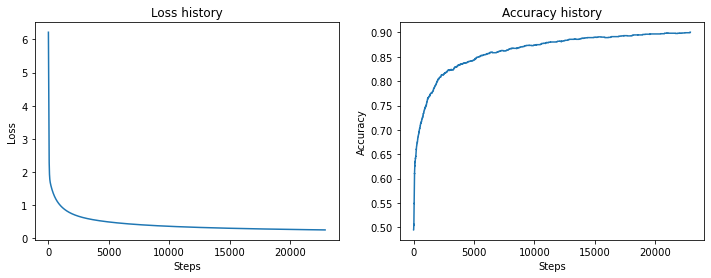

Training model for number 9
total step : 1 
error : 3.258133, accuarcy : 0.460230
total step : 2 
error : 3.248612, accuarcy : 0.460230
total step : 3 
error : 3.239125, accuarcy : 0.460730
total step : 4 
error : 3.229671, accuarcy : 0.462731
total step : 5 
error : 3.220250, accuarcy : 0.463232
total step : 6 
error : 3.210862, accuarcy : 0.463732
total step : 7 
error : 3.201507, accuarcy : 0.463732
total step : 8 
error : 3.192183, accuarcy : 0.464732
total step : 9 
error : 3.182892, accuarcy : 0.464732
total step : 10 
error : 3.173633, accuarcy : 0.465233
total step : 11 
error : 3.164406, accuarcy : 0.466733
total step : 12 
error : 3.155210, accuarcy : 0.467234
total step : 13 
error : 3.146046, accuarcy : 0.467234
total step : 14 
error : 3.136913, accuarcy : 0.466733
total step : 15 
error : 3.127810, accuarcy : 0.467234
total step : 16 
error : 3.118739, accuarcy : 0.466733
total step : 17 
error : 3.109699, accuarcy : 0.467734
total step : 18 
error : 3.100689, accuarcy : 

total step : 316 
error : 1.489118, accuarcy : 0.642821
total step : 317 
error : 1.486286, accuarcy : 0.643822
total step : 318 
error : 1.483464, accuarcy : 0.644322
total step : 319 
error : 1.480653, accuarcy : 0.644822
total step : 320 
error : 1.477852, accuarcy : 0.644822
total step : 321 
error : 1.475061, accuarcy : 0.645323
total step : 322 
error : 1.472281, accuarcy : 0.645823
total step : 323 
error : 1.469511, accuarcy : 0.645823
total step : 324 
error : 1.466751, accuarcy : 0.646823
total step : 325 
error : 1.464001, accuarcy : 0.647824
total step : 326 
error : 1.461260, accuarcy : 0.647824
total step : 327 
error : 1.458530, accuarcy : 0.647824
total step : 328 
error : 1.455810, accuarcy : 0.648324
total step : 329 
error : 1.453100, accuarcy : 0.648824
total step : 330 
error : 1.450400, accuarcy : 0.648824
total step : 331 
error : 1.447709, accuarcy : 0.648824
total step : 332 
error : 1.445029, accuarcy : 0.648824
total step : 333 
error : 1.442358, accuarcy : 0

total step : 483 
error : 1.133696, accuarcy : 0.698349
total step : 484 
error : 1.132152, accuarcy : 0.698349
total step : 485 
error : 1.130614, accuarcy : 0.698849
total step : 486 
error : 1.129081, accuarcy : 0.699850
total step : 487 
error : 1.127553, accuarcy : 0.700850
total step : 488 
error : 1.126031, accuarcy : 0.700850
total step : 489 
error : 1.124515, accuarcy : 0.700850
total step : 490 
error : 1.123004, accuarcy : 0.700850
total step : 491 
error : 1.121499, accuarcy : 0.701351
total step : 492 
error : 1.119999, accuarcy : 0.701851
total step : 493 
error : 1.118504, accuarcy : 0.703352
total step : 494 
error : 1.117015, accuarcy : 0.703852
total step : 495 
error : 1.115531, accuarcy : 0.703852
total step : 496 
error : 1.114052, accuarcy : 0.704352
total step : 497 
error : 1.112579, accuarcy : 0.704852
total step : 498 
error : 1.111111, accuarcy : 0.705853
total step : 499 
error : 1.109649, accuarcy : 0.706853
total step : 500 
error : 1.108191, accuarcy : 0

total step : 651 
error : 0.935689, accuarcy : 0.740870
total step : 652 
error : 0.934794, accuarcy : 0.740870
total step : 653 
error : 0.933901, accuarcy : 0.741371
total step : 654 
error : 0.933010, accuarcy : 0.741871
total step : 655 
error : 0.932122, accuarcy : 0.741871
total step : 656 
error : 0.931237, accuarcy : 0.741871
total step : 657 
error : 0.930354, accuarcy : 0.741871
total step : 658 
error : 0.929474, accuarcy : 0.742371
total step : 659 
error : 0.928596, accuarcy : 0.742371
total step : 660 
error : 0.927720, accuarcy : 0.742371
total step : 661 
error : 0.926847, accuarcy : 0.742371
total step : 662 
error : 0.925977, accuarcy : 0.743372
total step : 663 
error : 0.925109, accuarcy : 0.742871
total step : 664 
error : 0.924243, accuarcy : 0.742371
total step : 665 
error : 0.923380, accuarcy : 0.743372
total step : 666 
error : 0.922519, accuarcy : 0.744372
total step : 667 
error : 0.921661, accuarcy : 0.744372
total step : 668 
error : 0.920805, accuarcy : 0

total step : 824 
error : 0.811566, accuarcy : 0.763882
total step : 825 
error : 0.810994, accuarcy : 0.763882
total step : 826 
error : 0.810423, accuarcy : 0.763882
total step : 827 
error : 0.809853, accuarcy : 0.764382
total step : 828 
error : 0.809285, accuarcy : 0.764882
total step : 829 
error : 0.808718, accuarcy : 0.764882
total step : 830 
error : 0.808152, accuarcy : 0.765383
total step : 831 
error : 0.807588, accuarcy : 0.765383
total step : 832 
error : 0.807025, accuarcy : 0.765383
total step : 833 
error : 0.806464, accuarcy : 0.765383
total step : 834 
error : 0.805903, accuarcy : 0.765383
total step : 835 
error : 0.805344, accuarcy : 0.765383
total step : 836 
error : 0.804786, accuarcy : 0.765883
total step : 837 
error : 0.804230, accuarcy : 0.767384
total step : 838 
error : 0.803674, accuarcy : 0.767384
total step : 839 
error : 0.803120, accuarcy : 0.767384
total step : 840 
error : 0.802568, accuarcy : 0.767384
total step : 841 
error : 0.802016, accuarcy : 0

total step : 1004 
error : 0.726109, accuarcy : 0.781891
total step : 1005 
error : 0.725715, accuarcy : 0.781891
total step : 1006 
error : 0.725322, accuarcy : 0.781891
total step : 1007 
error : 0.724929, accuarcy : 0.781891
total step : 1008 
error : 0.724537, accuarcy : 0.782391
total step : 1009 
error : 0.724146, accuarcy : 0.782391
total step : 1010 
error : 0.723755, accuarcy : 0.782391
total step : 1011 
error : 0.723365, accuarcy : 0.782391
total step : 1012 
error : 0.722976, accuarcy : 0.782391
total step : 1013 
error : 0.722588, accuarcy : 0.782891
total step : 1014 
error : 0.722200, accuarcy : 0.782891
total step : 1015 
error : 0.721813, accuarcy : 0.782891
total step : 1016 
error : 0.721427, accuarcy : 0.782891
total step : 1017 
error : 0.721041, accuarcy : 0.782891
total step : 1018 
error : 0.720656, accuarcy : 0.784392
total step : 1019 
error : 0.720272, accuarcy : 0.784392
total step : 1020 
error : 0.719888, accuarcy : 0.784892
total step : 1021 
error : 0.71

error : 0.667760, accuarcy : 0.793397
total step : 1176 
error : 0.667465, accuarcy : 0.793397
total step : 1177 
error : 0.667169, accuarcy : 0.793397
total step : 1178 
error : 0.666875, accuarcy : 0.793897
total step : 1179 
error : 0.666581, accuarcy : 0.793897
total step : 1180 
error : 0.666287, accuarcy : 0.793897
total step : 1181 
error : 0.665994, accuarcy : 0.793897
total step : 1182 
error : 0.665701, accuarcy : 0.794397
total step : 1183 
error : 0.665408, accuarcy : 0.794397
total step : 1184 
error : 0.665116, accuarcy : 0.794397
total step : 1185 
error : 0.664825, accuarcy : 0.794397
total step : 1186 
error : 0.664534, accuarcy : 0.794397
total step : 1187 
error : 0.664243, accuarcy : 0.794397
total step : 1188 
error : 0.663953, accuarcy : 0.794397
total step : 1189 
error : 0.663663, accuarcy : 0.794397
total step : 1190 
error : 0.663374, accuarcy : 0.794397
total step : 1191 
error : 0.663085, accuarcy : 0.794397
total step : 1192 
error : 0.662796, accuarcy : 0.

total step : 1348 
error : 0.622441, accuarcy : 0.805403
total step : 1349 
error : 0.622209, accuarcy : 0.805403
total step : 1350 
error : 0.621976, accuarcy : 0.805903
total step : 1351 
error : 0.621744, accuarcy : 0.806403
total step : 1352 
error : 0.621513, accuarcy : 0.806403
total step : 1353 
error : 0.621282, accuarcy : 0.806403
total step : 1354 
error : 0.621050, accuarcy : 0.806403
total step : 1355 
error : 0.620820, accuarcy : 0.806403
total step : 1356 
error : 0.620589, accuarcy : 0.806403
total step : 1357 
error : 0.620359, accuarcy : 0.806403
total step : 1358 
error : 0.620129, accuarcy : 0.806403
total step : 1359 
error : 0.619900, accuarcy : 0.806403
total step : 1360 
error : 0.619670, accuarcy : 0.806403
total step : 1361 
error : 0.619441, accuarcy : 0.806403
total step : 1362 
error : 0.619213, accuarcy : 0.806403
total step : 1363 
error : 0.618984, accuarcy : 0.806903
total step : 1364 
error : 0.618756, accuarcy : 0.806903
total step : 1365 
error : 0.61

total step : 1545 
error : 0.581603, accuarcy : 0.819410
total step : 1546 
error : 0.581418, accuarcy : 0.819410
total step : 1547 
error : 0.581233, accuarcy : 0.819410
total step : 1548 
error : 0.581049, accuarcy : 0.819910
total step : 1549 
error : 0.580865, accuarcy : 0.819910
total step : 1550 
error : 0.580680, accuarcy : 0.819910
total step : 1551 
error : 0.580496, accuarcy : 0.819910
total step : 1552 
error : 0.580313, accuarcy : 0.819910
total step : 1553 
error : 0.580129, accuarcy : 0.819910
total step : 1554 
error : 0.579946, accuarcy : 0.819910
total step : 1555 
error : 0.579762, accuarcy : 0.819910
total step : 1556 
error : 0.579579, accuarcy : 0.819910
total step : 1557 
error : 0.579397, accuarcy : 0.819910
total step : 1558 
error : 0.579214, accuarcy : 0.819910
total step : 1559 
error : 0.579032, accuarcy : 0.819910
total step : 1560 
error : 0.578849, accuarcy : 0.819910
total step : 1561 
error : 0.578667, accuarcy : 0.820410
total step : 1562 
error : 0.57

error : 0.542356, accuarcy : 0.829415
total step : 1785 
error : 0.542210, accuarcy : 0.829415
total step : 1786 
error : 0.542064, accuarcy : 0.829415
total step : 1787 
error : 0.541919, accuarcy : 0.829415
total step : 1788 
error : 0.541773, accuarcy : 0.829415
total step : 1789 
error : 0.541628, accuarcy : 0.829415
total step : 1790 
error : 0.541483, accuarcy : 0.829415
total step : 1791 
error : 0.541338, accuarcy : 0.829915
total step : 1792 
error : 0.541193, accuarcy : 0.830415
total step : 1793 
error : 0.541048, accuarcy : 0.830415
total step : 1794 
error : 0.540904, accuarcy : 0.830415
total step : 1795 
error : 0.540759, accuarcy : 0.830415
total step : 1796 
error : 0.540615, accuarcy : 0.830415
total step : 1797 
error : 0.540471, accuarcy : 0.830415
total step : 1798 
error : 0.540327, accuarcy : 0.830415
total step : 1799 
error : 0.540183, accuarcy : 0.830915
total step : 1800 
error : 0.540039, accuarcy : 0.830915
total step : 1801 
error : 0.539895, accuarcy : 0.

total step : 2019 
error : 0.511438, accuarcy : 0.838419
total step : 2020 
error : 0.511320, accuarcy : 0.838419
total step : 2021 
error : 0.511201, accuarcy : 0.838919
total step : 2022 
error : 0.511083, accuarcy : 0.838919
total step : 2023 
error : 0.510964, accuarcy : 0.838919
total step : 2024 
error : 0.510846, accuarcy : 0.838919
total step : 2025 
error : 0.510728, accuarcy : 0.838919
total step : 2026 
error : 0.510610, accuarcy : 0.838919
total step : 2027 
error : 0.510492, accuarcy : 0.838919
total step : 2028 
error : 0.510374, accuarcy : 0.838919
total step : 2029 
error : 0.510257, accuarcy : 0.838919
total step : 2030 
error : 0.510139, accuarcy : 0.838919
total step : 2031 
error : 0.510021, accuarcy : 0.838919
total step : 2032 
error : 0.509904, accuarcy : 0.839420
total step : 2033 
error : 0.509787, accuarcy : 0.839420
total step : 2034 
error : 0.509669, accuarcy : 0.839420
total step : 2035 
error : 0.509552, accuarcy : 0.839420
total step : 2036 
error : 0.50

total step : 2241 
error : 0.487323, accuarcy : 0.845423
total step : 2242 
error : 0.487224, accuarcy : 0.845423
total step : 2243 
error : 0.487125, accuarcy : 0.845423
total step : 2244 
error : 0.487025, accuarcy : 0.845423
total step : 2245 
error : 0.486926, accuarcy : 0.845423
total step : 2246 
error : 0.486827, accuarcy : 0.845423
total step : 2247 
error : 0.486728, accuarcy : 0.845423
total step : 2248 
error : 0.486629, accuarcy : 0.845423
total step : 2249 
error : 0.486530, accuarcy : 0.845423
total step : 2250 
error : 0.486432, accuarcy : 0.845923
total step : 2251 
error : 0.486333, accuarcy : 0.845923
total step : 2252 
error : 0.486234, accuarcy : 0.845923
total step : 2253 
error : 0.486136, accuarcy : 0.845923
total step : 2254 
error : 0.486037, accuarcy : 0.845923
total step : 2255 
error : 0.485939, accuarcy : 0.845923
total step : 2256 
error : 0.485840, accuarcy : 0.845923
total step : 2257 
error : 0.485742, accuarcy : 0.845923
total step : 2258 
error : 0.48

total step : 2389 
error : 0.473394, accuarcy : 0.849925
total step : 2390 
error : 0.473305, accuarcy : 0.849925
total step : 2391 
error : 0.473216, accuarcy : 0.849925
total step : 2392 
error : 0.473127, accuarcy : 0.849925
total step : 2393 
error : 0.473038, accuarcy : 0.849925
total step : 2394 
error : 0.472949, accuarcy : 0.849925
total step : 2395 
error : 0.472860, accuarcy : 0.849925
total step : 2396 
error : 0.472772, accuarcy : 0.849925
total step : 2397 
error : 0.472683, accuarcy : 0.849925
total step : 2398 
error : 0.472594, accuarcy : 0.849925
total step : 2399 
error : 0.472506, accuarcy : 0.849925
total step : 2400 
error : 0.472417, accuarcy : 0.849925
total step : 2401 
error : 0.472329, accuarcy : 0.849925
total step : 2402 
error : 0.472241, accuarcy : 0.849925
total step : 2403 
error : 0.472153, accuarcy : 0.849925
total step : 2404 
error : 0.472064, accuarcy : 0.849925
total step : 2405 
error : 0.471976, accuarcy : 0.849925
total step : 2406 
error : 0.47

total step : 2554 
error : 0.459514, accuarcy : 0.852426
total step : 2555 
error : 0.459435, accuarcy : 0.852426
total step : 2556 
error : 0.459355, accuarcy : 0.852426
total step : 2557 
error : 0.459276, accuarcy : 0.852426
total step : 2558 
error : 0.459197, accuarcy : 0.852426
total step : 2559 
error : 0.459118, accuarcy : 0.852426
total step : 2560 
error : 0.459039, accuarcy : 0.852426
total step : 2561 
error : 0.458959, accuarcy : 0.852426
total step : 2562 
error : 0.458880, accuarcy : 0.852426
total step : 2563 
error : 0.458801, accuarcy : 0.852426
total step : 2564 
error : 0.458723, accuarcy : 0.852426
total step : 2565 
error : 0.458644, accuarcy : 0.852426
total step : 2566 
error : 0.458565, accuarcy : 0.852426
total step : 2567 
error : 0.458486, accuarcy : 0.852426
total step : 2568 
error : 0.458407, accuarcy : 0.852426
total step : 2569 
error : 0.458329, accuarcy : 0.852426
total step : 2570 
error : 0.458250, accuarcy : 0.852426
total step : 2571 
error : 0.45

total step : 2720 
error : 0.447025, accuarcy : 0.857429
total step : 2721 
error : 0.446954, accuarcy : 0.857429
total step : 2722 
error : 0.446883, accuarcy : 0.857429
total step : 2723 
error : 0.446812, accuarcy : 0.857429
total step : 2724 
error : 0.446740, accuarcy : 0.857429
total step : 2725 
error : 0.446669, accuarcy : 0.857429
total step : 2726 
error : 0.446598, accuarcy : 0.857429
total step : 2727 
error : 0.446527, accuarcy : 0.857429
total step : 2728 
error : 0.446456, accuarcy : 0.857429
total step : 2729 
error : 0.446386, accuarcy : 0.857429
total step : 2730 
error : 0.446315, accuarcy : 0.857429
total step : 2731 
error : 0.446244, accuarcy : 0.857929
total step : 2732 
error : 0.446173, accuarcy : 0.857929
total step : 2733 
error : 0.446102, accuarcy : 0.857929
total step : 2734 
error : 0.446032, accuarcy : 0.857929
total step : 2735 
error : 0.445961, accuarcy : 0.857929
total step : 2736 
error : 0.445891, accuarcy : 0.857929
total step : 2737 
error : 0.44

total step : 2890 
error : 0.435523, accuarcy : 0.862431
total step : 2891 
error : 0.435459, accuarcy : 0.862431
total step : 2892 
error : 0.435394, accuarcy : 0.862431
total step : 2893 
error : 0.435330, accuarcy : 0.862431
total step : 2894 
error : 0.435266, accuarcy : 0.862431
total step : 2895 
error : 0.435202, accuarcy : 0.862431
total step : 2896 
error : 0.435138, accuarcy : 0.862431
total step : 2897 
error : 0.435074, accuarcy : 0.862431
total step : 2898 
error : 0.435010, accuarcy : 0.862431
total step : 2899 
error : 0.434946, accuarcy : 0.862431
total step : 2900 
error : 0.434882, accuarcy : 0.862431
total step : 2901 
error : 0.434818, accuarcy : 0.862931
total step : 2902 
error : 0.434755, accuarcy : 0.862931
total step : 2903 
error : 0.434691, accuarcy : 0.862931
total step : 2904 
error : 0.434627, accuarcy : 0.862931
total step : 2905 
error : 0.434563, accuarcy : 0.862931
total step : 2906 
error : 0.434500, accuarcy : 0.862931
total step : 2907 
error : 0.43

total step : 3074 
error : 0.424309, accuarcy : 0.864932
total step : 3075 
error : 0.424251, accuarcy : 0.864932
total step : 3076 
error : 0.424194, accuarcy : 0.864932
total step : 3077 
error : 0.424136, accuarcy : 0.864932
total step : 3078 
error : 0.424078, accuarcy : 0.864932
total step : 3079 
error : 0.424020, accuarcy : 0.864932
total step : 3080 
error : 0.423963, accuarcy : 0.864932
total step : 3081 
error : 0.423905, accuarcy : 0.864932
total step : 3082 
error : 0.423847, accuarcy : 0.864932
total step : 3083 
error : 0.423790, accuarcy : 0.864932
total step : 3084 
error : 0.423732, accuarcy : 0.864932
total step : 3085 
error : 0.423675, accuarcy : 0.864932
total step : 3086 
error : 0.423617, accuarcy : 0.864932
total step : 3087 
error : 0.423560, accuarcy : 0.864932
total step : 3088 
error : 0.423503, accuarcy : 0.864932
total step : 3089 
error : 0.423445, accuarcy : 0.864932
total step : 3090 
error : 0.423388, accuarcy : 0.864932
total step : 3091 
error : 0.42

total step : 3267 
error : 0.413709, accuarcy : 0.867434
total step : 3268 
error : 0.413657, accuarcy : 0.867434
total step : 3269 
error : 0.413605, accuarcy : 0.867434
total step : 3270 
error : 0.413553, accuarcy : 0.867434
total step : 3271 
error : 0.413501, accuarcy : 0.867434
total step : 3272 
error : 0.413449, accuarcy : 0.867434
total step : 3273 
error : 0.413397, accuarcy : 0.867434
total step : 3274 
error : 0.413345, accuarcy : 0.867434
total step : 3275 
error : 0.413293, accuarcy : 0.867434
total step : 3276 
error : 0.413241, accuarcy : 0.867434
total step : 3277 
error : 0.413189, accuarcy : 0.867434
total step : 3278 
error : 0.413137, accuarcy : 0.867434
total step : 3279 
error : 0.413085, accuarcy : 0.867434
total step : 3280 
error : 0.413033, accuarcy : 0.867434
total step : 3281 
error : 0.412981, accuarcy : 0.867434
total step : 3282 
error : 0.412930, accuarcy : 0.867434
total step : 3283 
error : 0.412878, accuarcy : 0.867434
total step : 3284 
error : 0.41

total step : 3470 
error : 0.403639, accuarcy : 0.868934
total step : 3471 
error : 0.403592, accuarcy : 0.868934
total step : 3472 
error : 0.403545, accuarcy : 0.868934
total step : 3473 
error : 0.403498, accuarcy : 0.868934
total step : 3474 
error : 0.403451, accuarcy : 0.868934
total step : 3475 
error : 0.403404, accuarcy : 0.868934
total step : 3476 
error : 0.403357, accuarcy : 0.868934
total step : 3477 
error : 0.403309, accuarcy : 0.868934
total step : 3478 
error : 0.403262, accuarcy : 0.868934
total step : 3479 
error : 0.403215, accuarcy : 0.868934
total step : 3480 
error : 0.403169, accuarcy : 0.868934
total step : 3481 
error : 0.403122, accuarcy : 0.868934
total step : 3482 
error : 0.403075, accuarcy : 0.868934
total step : 3483 
error : 0.403028, accuarcy : 0.868934
total step : 3484 
error : 0.402981, accuarcy : 0.868934
total step : 3485 
error : 0.402934, accuarcy : 0.868934
total step : 3486 
error : 0.402887, accuarcy : 0.868934
total step : 3487 
error : 0.40

total step : 3658 
error : 0.395148, accuarcy : 0.874437
total step : 3659 
error : 0.395105, accuarcy : 0.874437
total step : 3660 
error : 0.395062, accuarcy : 0.874437
total step : 3661 
error : 0.395019, accuarcy : 0.874437
total step : 3662 
error : 0.394975, accuarcy : 0.874437
total step : 3663 
error : 0.394932, accuarcy : 0.874437
total step : 3664 
error : 0.394889, accuarcy : 0.874437
total step : 3665 
error : 0.394846, accuarcy : 0.874437
total step : 3666 
error : 0.394803, accuarcy : 0.874437
total step : 3667 
error : 0.394760, accuarcy : 0.874437
total step : 3668 
error : 0.394717, accuarcy : 0.874437
total step : 3669 
error : 0.394674, accuarcy : 0.874437
total step : 3670 
error : 0.394631, accuarcy : 0.874437
total step : 3671 
error : 0.394588, accuarcy : 0.874437
total step : 3672 
error : 0.394545, accuarcy : 0.874437
total step : 3673 
error : 0.394502, accuarcy : 0.874437
total step : 3674 
error : 0.394459, accuarcy : 0.874437
total step : 3675 
error : 0.39

total step : 3833 
error : 0.387863, accuarcy : 0.876438
total step : 3834 
error : 0.387823, accuarcy : 0.876438
total step : 3835 
error : 0.387783, accuarcy : 0.876438
total step : 3836 
error : 0.387743, accuarcy : 0.876438
total step : 3837 
error : 0.387703, accuarcy : 0.876438
total step : 3838 
error : 0.387663, accuarcy : 0.876438
total step : 3839 
error : 0.387623, accuarcy : 0.876438
total step : 3840 
error : 0.387583, accuarcy : 0.876438
total step : 3841 
error : 0.387543, accuarcy : 0.876438
total step : 3842 
error : 0.387503, accuarcy : 0.876438
total step : 3843 
error : 0.387463, accuarcy : 0.876438
total step : 3844 
error : 0.387423, accuarcy : 0.876438
total step : 3845 
error : 0.387384, accuarcy : 0.876438
total step : 3846 
error : 0.387344, accuarcy : 0.876438
total step : 3847 
error : 0.387304, accuarcy : 0.876438
total step : 3848 
error : 0.387264, accuarcy : 0.876438
total step : 3849 
error : 0.387224, accuarcy : 0.876438
total step : 3850 
error : 0.38

total step : 3999 
error : 0.381435, accuarcy : 0.877939
total step : 4000 
error : 0.381397, accuarcy : 0.877939
total step : 4001 
error : 0.381360, accuarcy : 0.877939
total step : 4002 
error : 0.381322, accuarcy : 0.877939
total step : 4003 
error : 0.381285, accuarcy : 0.877939
total step : 4004 
error : 0.381248, accuarcy : 0.877939
total step : 4005 
error : 0.381210, accuarcy : 0.877939
total step : 4006 
error : 0.381173, accuarcy : 0.877939
total step : 4007 
error : 0.381136, accuarcy : 0.877939
total step : 4008 
error : 0.381098, accuarcy : 0.877939
total step : 4009 
error : 0.381061, accuarcy : 0.877939
total step : 4010 
error : 0.381024, accuarcy : 0.877939
total step : 4011 
error : 0.380987, accuarcy : 0.877939
total step : 4012 
error : 0.380949, accuarcy : 0.877939
total step : 4013 
error : 0.380912, accuarcy : 0.877939
total step : 4014 
error : 0.380875, accuarcy : 0.877939
total step : 4015 
error : 0.380838, accuarcy : 0.877939
total step : 4016 
error : 0.38

total step : 4167 
error : 0.375351, accuarcy : 0.882941
total step : 4168 
error : 0.375316, accuarcy : 0.882941
total step : 4169 
error : 0.375281, accuarcy : 0.882941
total step : 4170 
error : 0.375246, accuarcy : 0.882941
total step : 4171 
error : 0.375211, accuarcy : 0.882941
total step : 4172 
error : 0.375176, accuarcy : 0.882941
total step : 4173 
error : 0.375141, accuarcy : 0.882941
total step : 4174 
error : 0.375106, accuarcy : 0.882941
total step : 4175 
error : 0.375071, accuarcy : 0.882941
total step : 4176 
error : 0.375036, accuarcy : 0.882941
total step : 4177 
error : 0.375001, accuarcy : 0.882941
total step : 4178 
error : 0.374966, accuarcy : 0.882941
total step : 4179 
error : 0.374931, accuarcy : 0.882941
total step : 4180 
error : 0.374896, accuarcy : 0.882941
total step : 4181 
error : 0.374862, accuarcy : 0.882941
total step : 4182 
error : 0.374827, accuarcy : 0.882941
total step : 4183 
error : 0.374792, accuarcy : 0.882941
total step : 4184 
error : 0.37

total step : 4341 
error : 0.369448, accuarcy : 0.885443
total step : 4342 
error : 0.369415, accuarcy : 0.885443
total step : 4343 
error : 0.369383, accuarcy : 0.885443
total step : 4344 
error : 0.369350, accuarcy : 0.885443
total step : 4345 
error : 0.369317, accuarcy : 0.885943
total step : 4346 
error : 0.369284, accuarcy : 0.885943
total step : 4347 
error : 0.369251, accuarcy : 0.885943
total step : 4348 
error : 0.369219, accuarcy : 0.886443
total step : 4349 
error : 0.369186, accuarcy : 0.886443
total step : 4350 
error : 0.369153, accuarcy : 0.886443
total step : 4351 
error : 0.369120, accuarcy : 0.886443
total step : 4352 
error : 0.369088, accuarcy : 0.886443
total step : 4353 
error : 0.369055, accuarcy : 0.886443
total step : 4354 
error : 0.369022, accuarcy : 0.886443
total step : 4355 
error : 0.368990, accuarcy : 0.886443
total step : 4356 
error : 0.368957, accuarcy : 0.886443
total step : 4357 
error : 0.368924, accuarcy : 0.886443
total step : 4358 
error : 0.36

total step : 4498 
error : 0.364434, accuarcy : 0.886943
total step : 4499 
error : 0.364403, accuarcy : 0.886943
total step : 4500 
error : 0.364372, accuarcy : 0.886943
total step : 4501 
error : 0.364341, accuarcy : 0.886943
total step : 4502 
error : 0.364310, accuarcy : 0.886943
total step : 4503 
error : 0.364279, accuarcy : 0.886943
total step : 4504 
error : 0.364248, accuarcy : 0.886943
total step : 4505 
error : 0.364217, accuarcy : 0.886943
total step : 4506 
error : 0.364186, accuarcy : 0.886943
total step : 4507 
error : 0.364155, accuarcy : 0.886943
total step : 4508 
error : 0.364124, accuarcy : 0.886943
total step : 4509 
error : 0.364093, accuarcy : 0.886943
total step : 4510 
error : 0.364062, accuarcy : 0.886943
total step : 4511 
error : 0.364031, accuarcy : 0.886943
total step : 4512 
error : 0.364000, accuarcy : 0.886943
total step : 4513 
error : 0.363970, accuarcy : 0.887444
total step : 4514 
error : 0.363939, accuarcy : 0.887444
total step : 4515 
error : 0.36

total step : 4651 
error : 0.359805, accuarcy : 0.889945
total step : 4652 
error : 0.359776, accuarcy : 0.889945
total step : 4653 
error : 0.359746, accuarcy : 0.889945
total step : 4654 
error : 0.359717, accuarcy : 0.889945
total step : 4655 
error : 0.359688, accuarcy : 0.889945
total step : 4656 
error : 0.359658, accuarcy : 0.889945
total step : 4657 
error : 0.359629, accuarcy : 0.889945
total step : 4658 
error : 0.359599, accuarcy : 0.889945
total step : 4659 
error : 0.359570, accuarcy : 0.889945
total step : 4660 
error : 0.359540, accuarcy : 0.889945
total step : 4661 
error : 0.359511, accuarcy : 0.889945
total step : 4662 
error : 0.359482, accuarcy : 0.889945
total step : 4663 
error : 0.359452, accuarcy : 0.889945
total step : 4664 
error : 0.359423, accuarcy : 0.889945
total step : 4665 
error : 0.359394, accuarcy : 0.889945
total step : 4666 
error : 0.359364, accuarcy : 0.889945
total step : 4667 
error : 0.359335, accuarcy : 0.889945
total step : 4668 
error : 0.35

total step : 4809 
error : 0.355268, accuarcy : 0.890445
total step : 4810 
error : 0.355240, accuarcy : 0.890445
total step : 4811 
error : 0.355212, accuarcy : 0.890445
total step : 4812 
error : 0.355184, accuarcy : 0.890445
total step : 4813 
error : 0.355156, accuarcy : 0.890445
total step : 4814 
error : 0.355128, accuarcy : 0.890445
total step : 4815 
error : 0.355100, accuarcy : 0.890445
total step : 4816 
error : 0.355072, accuarcy : 0.890445
total step : 4817 
error : 0.355044, accuarcy : 0.890445
total step : 4818 
error : 0.355016, accuarcy : 0.890445
total step : 4819 
error : 0.354988, accuarcy : 0.890445
total step : 4820 
error : 0.354961, accuarcy : 0.890445
total step : 4821 
error : 0.354933, accuarcy : 0.890445
total step : 4822 
error : 0.354905, accuarcy : 0.890445
total step : 4823 
error : 0.354877, accuarcy : 0.890445
total step : 4824 
error : 0.354849, accuarcy : 0.890445
total step : 4825 
error : 0.354821, accuarcy : 0.890445
total step : 4826 
error : 0.35

total step : 4962 
error : 0.351089, accuarcy : 0.891946
total step : 4963 
error : 0.351062, accuarcy : 0.891946
total step : 4964 
error : 0.351036, accuarcy : 0.891946
total step : 4965 
error : 0.351009, accuarcy : 0.891946
total step : 4966 
error : 0.350982, accuarcy : 0.891946
total step : 4967 
error : 0.350956, accuarcy : 0.891946
total step : 4968 
error : 0.350929, accuarcy : 0.891946
total step : 4969 
error : 0.350902, accuarcy : 0.891946
total step : 4970 
error : 0.350876, accuarcy : 0.891946
total step : 4971 
error : 0.350849, accuarcy : 0.891946
total step : 4972 
error : 0.350823, accuarcy : 0.891946
total step : 4973 
error : 0.350796, accuarcy : 0.891946
total step : 4974 
error : 0.350769, accuarcy : 0.891946
total step : 4975 
error : 0.350743, accuarcy : 0.891946
total step : 4976 
error : 0.350716, accuarcy : 0.891946
total step : 4977 
error : 0.350690, accuarcy : 0.891946
total step : 4978 
error : 0.350663, accuarcy : 0.891946
total step : 4979 
error : 0.35

total step : 5168 
error : 0.345766, accuarcy : 0.893447
total step : 5169 
error : 0.345741, accuarcy : 0.893447
total step : 5170 
error : 0.345716, accuarcy : 0.893447
total step : 5171 
error : 0.345691, accuarcy : 0.893447
total step : 5172 
error : 0.345666, accuarcy : 0.893447
total step : 5173 
error : 0.345641, accuarcy : 0.893447
total step : 5174 
error : 0.345616, accuarcy : 0.893447
total step : 5175 
error : 0.345591, accuarcy : 0.893447
total step : 5176 
error : 0.345566, accuarcy : 0.893447
total step : 5177 
error : 0.345541, accuarcy : 0.893447
total step : 5178 
error : 0.345516, accuarcy : 0.893447
total step : 5179 
error : 0.345491, accuarcy : 0.893947
total step : 5180 
error : 0.345466, accuarcy : 0.893947
total step : 5181 
error : 0.345441, accuarcy : 0.893947
total step : 5182 
error : 0.345416, accuarcy : 0.893947
total step : 5183 
error : 0.345391, accuarcy : 0.893947
total step : 5184 
error : 0.345366, accuarcy : 0.893947
total step : 5185 
error : 0.34

error : 0.341350, accuarcy : 0.894947
total step : 5350 
error : 0.341327, accuarcy : 0.894947
total step : 5351 
error : 0.341303, accuarcy : 0.894947
total step : 5352 
error : 0.341279, accuarcy : 0.894947
total step : 5353 
error : 0.341255, accuarcy : 0.894947
total step : 5354 
error : 0.341232, accuarcy : 0.894947
total step : 5355 
error : 0.341208, accuarcy : 0.894947
total step : 5356 
error : 0.341184, accuarcy : 0.894947
total step : 5357 
error : 0.341160, accuarcy : 0.894947
total step : 5358 
error : 0.341137, accuarcy : 0.894947
total step : 5359 
error : 0.341113, accuarcy : 0.894947
total step : 5360 
error : 0.341089, accuarcy : 0.894947
total step : 5361 
error : 0.341066, accuarcy : 0.894947
total step : 5362 
error : 0.341042, accuarcy : 0.894947
total step : 5363 
error : 0.341018, accuarcy : 0.894947
total step : 5364 
error : 0.340995, accuarcy : 0.894947
total step : 5365 
error : 0.340971, accuarcy : 0.894947
total step : 5366 
error : 0.340947, accuarcy : 0.

total step : 5539 
error : 0.336954, accuarcy : 0.896448
total step : 5540 
error : 0.336931, accuarcy : 0.896448
total step : 5541 
error : 0.336909, accuarcy : 0.896448
total step : 5542 
error : 0.336886, accuarcy : 0.896448
total step : 5543 
error : 0.336863, accuarcy : 0.896448
total step : 5544 
error : 0.336841, accuarcy : 0.896448
total step : 5545 
error : 0.336818, accuarcy : 0.896448
total step : 5546 
error : 0.336796, accuarcy : 0.896448
total step : 5547 
error : 0.336773, accuarcy : 0.896448
total step : 5548 
error : 0.336751, accuarcy : 0.896448
total step : 5549 
error : 0.336729, accuarcy : 0.896448
total step : 5550 
error : 0.336706, accuarcy : 0.896448
total step : 5551 
error : 0.336684, accuarcy : 0.896448
total step : 5552 
error : 0.336661, accuarcy : 0.896448
total step : 5553 
error : 0.336639, accuarcy : 0.896448
total step : 5554 
error : 0.336616, accuarcy : 0.896448
total step : 5555 
error : 0.336594, accuarcy : 0.896448
total step : 5556 
error : 0.33

total step : 5728 
error : 0.332801, accuarcy : 0.896948
total step : 5729 
error : 0.332780, accuarcy : 0.896948
total step : 5730 
error : 0.332758, accuarcy : 0.896948
total step : 5731 
error : 0.332737, accuarcy : 0.896948
total step : 5732 
error : 0.332715, accuarcy : 0.896948
total step : 5733 
error : 0.332694, accuarcy : 0.896948
total step : 5734 
error : 0.332673, accuarcy : 0.896948
total step : 5735 
error : 0.332651, accuarcy : 0.896948
total step : 5736 
error : 0.332630, accuarcy : 0.896948
total step : 5737 
error : 0.332608, accuarcy : 0.896948
total step : 5738 
error : 0.332587, accuarcy : 0.896948
total step : 5739 
error : 0.332566, accuarcy : 0.896948
total step : 5740 
error : 0.332544, accuarcy : 0.896948
total step : 5741 
error : 0.332523, accuarcy : 0.896948
total step : 5742 
error : 0.332502, accuarcy : 0.896948
total step : 5743 
error : 0.332480, accuarcy : 0.896948
total step : 5744 
error : 0.332459, accuarcy : 0.896948
total step : 5745 
error : 0.33

total step : 5930 
error : 0.328585, accuarcy : 0.897449
total step : 5931 
error : 0.328565, accuarcy : 0.897449
total step : 5932 
error : 0.328545, accuarcy : 0.897449
total step : 5933 
error : 0.328524, accuarcy : 0.897449
total step : 5934 
error : 0.328504, accuarcy : 0.897449
total step : 5935 
error : 0.328484, accuarcy : 0.897449
total step : 5936 
error : 0.328463, accuarcy : 0.897449
total step : 5937 
error : 0.328443, accuarcy : 0.897449
total step : 5938 
error : 0.328423, accuarcy : 0.897449
total step : 5939 
error : 0.328402, accuarcy : 0.897449
total step : 5940 
error : 0.328382, accuarcy : 0.897449
total step : 5941 
error : 0.328362, accuarcy : 0.897449
total step : 5942 
error : 0.328342, accuarcy : 0.897449
total step : 5943 
error : 0.328321, accuarcy : 0.897449
total step : 5944 
error : 0.328301, accuarcy : 0.897949
total step : 5945 
error : 0.328281, accuarcy : 0.897949
total step : 5946 
error : 0.328261, accuarcy : 0.897949
total step : 5947 
error : 0.32

total step : 6154 
error : 0.324155, accuarcy : 0.899950
total step : 6155 
error : 0.324136, accuarcy : 0.899950
total step : 6156 
error : 0.324116, accuarcy : 0.899950
total step : 6157 
error : 0.324097, accuarcy : 0.899950
total step : 6158 
error : 0.324078, accuarcy : 0.899950
total step : 6159 
error : 0.324059, accuarcy : 0.899950
total step : 6160 
error : 0.324040, accuarcy : 0.899950
total step : 6161 
error : 0.324020, accuarcy : 0.899950
total step : 6162 
error : 0.324001, accuarcy : 0.899950
total step : 6163 
error : 0.323982, accuarcy : 0.899950
total step : 6164 
error : 0.323963, accuarcy : 0.899950
total step : 6165 
error : 0.323944, accuarcy : 0.899950
total step : 6166 
error : 0.323924, accuarcy : 0.899950
total step : 6167 
error : 0.323905, accuarcy : 0.899950
total step : 6168 
error : 0.323886, accuarcy : 0.899950
total step : 6169 
error : 0.323867, accuarcy : 0.899950
total step : 6170 
error : 0.323848, accuarcy : 0.899950
total step : 6171 
error : 0.32

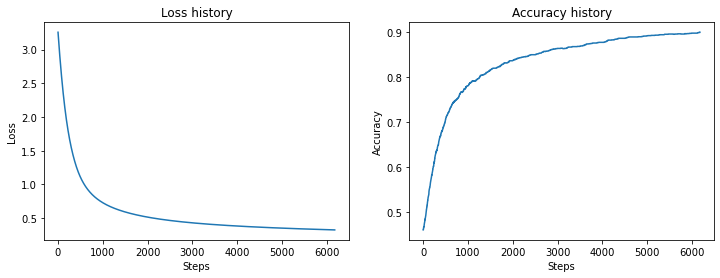

In [59]:
# 각 숫자에 대해 이진 분류 모델 학습 및 가중치 저장
weights = []

for i in range(10):
    print(f"Training model for number {i}")
    train_X, train_y = make_sample(idx = i)
    train_X = np.insert(train_X, 0, 1, axis=1)
    w = train(train_X, train_y)
    weights.append(w)

In [60]:
# 주어진 이미지의 숫자를 예측하는 함수
def predict_number(image, weights):
    test_X = image.astype('float') / 255
    test_X = test_X.reshape(-1)
    test_X = np.insert(test_X, 0, 1)
    
    predictions = []
    for w in weights:
        pred = 1 / (1 + np.exp(-test_X.dot(w)))
        predictions.append(pred[0])
    
    return np.argmax(predictions)

In [61]:
# eval
test_X = test_raw_img.astype('float')/255    
test_X = test_X.reshape(len(test_X.squeeze()), -1)
test_X = np.insert(test_X, 0, 1, axis=1) # + bias
print('shape of test_X : ', test_X.shape)
print('shape of test_label : ', test_label.shape)

shape of test_X :  (10000, 785)
shape of test_label :  (10000,)


In [62]:
# make prediction using argmax
max_preds = []

for test_img in test_raw_img:
    pred = predict_number(test_img, weights)
    max_preds.append(pred)

max_pred = np.array(max_preds).reshape(-1)
acc = np.sum(np.where(test_label==max_pred, True, False))/len(test_X)
print('accuracy : ', acc)

accuracy :  0.7404


In [48]:
# confusion matrix of each class (0~9)
def confusion_matrix_multiclass(preds, labels, num_classes=10):
    cm = np.zeros((num_classes, num_classes), dtype=int)

    for i in range(len(preds)):
        cm[labels[i], preds[i]] += 1

    return cm

In [49]:
cm = confusion_matrix_multiclass(max_pred, test_label)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[836   0  20  16   0  23  44  11  23   7]
 [  0 961  42  29   1  42   7   8  37   8]
 [ 21  26 735  42  40   4  73  33  46  12]
 [ 58  29  25 735  14  66  14  24  32  13]
 [  8  48  15   6 701  11  38  51  23  81]
 [ 89  37   2  52  14 586  17  12  44  39]
 [ 65  53  53   0  29  49 670  26   9   4]
 [  9  29  34  19  24  19   8 795   4  87]
 [ 23  67  14  27  28  24  21  28 699  43]
 [ 23  33  25  12  86   7  19 106   9 689]]


In [50]:
# precision of each class
def precision_multiclass(cm):
    precisions = []

    for i in range(cm.shape[0]):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp

        precision = tp / (tp + fp)
        precisions.append(precision)

    return precisions

In [51]:
precisions = precision_multiclass(cm)
print("Precision for each class:\n", precisions)

Precision for each class:
 [0.7385159010600707, 0.7490257209664848, 0.7616580310880829, 0.7835820895522388, 0.7481323372465315, 0.7051744885679904, 0.7354555433589463, 0.726691042047532, 0.7548596112311015, 0.7009155645981688]


In [52]:
# macro & micro averaged precision
def micro_macro_averaged_precision(cm):
    # Micro-averaged precision
    total_tp = np.trace(cm)
    total_fp = np.sum(cm) - total_tp
    micro_averaged_precision = total_tp / (total_tp + total_fp)

    # Macro-averaged precision
    precisions = precision_multiclass(cm)
    macro_averaged_precision = np.mean(precisions)

    return micro_averaged_precision, macro_averaged_precision

micro_avg_precision, macro_avg_precision = micro_macro_averaged_precision(cm)
print("Micro-averaged precision:", micro_avg_precision)
print("Macro-averaged precision:", macro_avg_precision)

Micro-averaged precision: 0.7407
Macro-averaged precision: 0.7404010329717148
